## 1. Installation

In [1]:
%%capture
import os, re

if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
    # Do this only in Colab notebooks! Otherwise use pip install unsloth
    import torch; v = re.match(r"[0-9]{1,}\.[0-9]{1,}", str(torch.__version__)).group(0)
    xformers = "xformers==" + ("0.0.33.post1" if v=="2.9" else "0.0.32.post2" if v=="2.8" else "0.0.29.post3")
    !pip install --no-deps bitsandbytes accelerate {xformers} peft trl triton cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf "datasets==4.3.0" "huggingface_hub>=0.34.0" hf_transfer
    !pip install --no-deps unsloth
!pip install transformers==4.56.2
!pip install --no-deps trl==0.22.2
!pip install jiwer einops addict easydict
!pip uninstall -y tensorflow protobuf
!pip install -q tensorflow protobuf 

## 2. Environment Setup (Colab / Kaggle)

In [2]:
# Mount Google Drive only for Colab
IS_KAGGLE = "KAGGLE_KERNEL_RUN_TYPE" in os.environ

if not IS_KAGGLE:
    print("\n📁 Mounting Google Drive...")
    from google.colab import drive
    drive.mount('/content/drive')
    print("✅ Google Drive mounted!")
else:
    print("\n📁 Using Kaggle environment settings")
    print("✅ Kaggle input/output paths will be used")


📁 Using Kaggle environment settings
✅ Kaggle input/output paths will be used


## 3. Choose Model to Evaluate

Select which model to evaluate:
- **Baseline**: Pretrained DeepSeek OCR (before finetuning)
- **Finetuned**: LoRA finetuned model

In [3]:
# ⚠️ SELECT MODEL TO EVALUATE
# Set to 'baseline' or 'finetuned'
MODEL_TYPE = 'finetuned'  # Change this to 'baseline' to evaluate pretrained model

print(f"\n🎯 Selected model: {MODEL_TYPE.upper()}")


🎯 Selected model: FINETUNED


In [4]:
from unsloth import FastVisionModel
import torch
from transformers import AutoModel
from huggingface_hub import snapshot_download

os.environ["UNSLOTH_WARN_UNINITIALIZED"] = '0'

# Download baseline model
snapshot_download("unsloth/DeepSeek-OCR", local_dir="deepseek_ocr")
MODEL_PATH = "./deepseek_ocr"
LORA_PATH = None
    
if MODEL_TYPE != 'baseline':  # finetuned
    print("\n📦 Loading finetuned model...")
    # Setup model path based on environment
    if not IS_KAGGLE:
        # ⚠️ UPDATE THIS PATH TO YOUR FINETUNED MODEL ON GOOGLE DRIVE
        LORA_PATH = '/content/drive/MyDrive/deepseek_ocr_lora'
        print(f"📦 Colab: Loading adapter from: {LORA_PATH}")
    else:
        # ⚠️ UPDATE 'your-model-folder' to match your Kaggle input
        LORA_PATH = '/kaggle/input/deepseek-ocr-vi/gguf/default/1/deepseek_ocr_lora'  # Change this to your model path
        print(f"📦 Kaggle: Loading adapter from: {LORA_PATH}")
else:
    print("\n📦 Loading baseline (pretrained) model...")


# Load model
model, tokenizer = FastVisionModel.from_pretrained(
    model_name=MODEL_PATH,
    load_in_4bit=False,
    auto_model=AutoModel,
    trust_remote_code=True,
    unsloth_force_compile=True,
    use_gradient_checkpointing="unsloth",
)

if LORA_PATH:
    model.load_adapter(LORA_PATH)

FastVisionModel.for_inference(model)

print(f"✅ Model loaded successfully!")
print(f"✓ Evaluating: {MODEL_TYPE.upper()} model")

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


.gitattributes: 0.00B [00:00, ?B/s]

README-checkpoint.md: 0.00B [00:00, ?B/s]

LICENSE: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

assets/fig1.png:   0%|          | 0.00/396k [00:00<?, ?B/s]

assets/show1.jpg:   0%|          | 0.00/117k [00:00<?, ?B/s]

assets/show2.jpg:   0%|          | 0.00/216k [00:00<?, ?B/s]

assets/show3.jpg:   0%|          | 0.00/247k [00:00<?, ?B/s]

assets/show4.jpg:   0%|          | 0.00/269k [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

configuration_deepseek_v2.py: 0.00B [00:00, ?B/s]

conversation.py: 0.00B [00:00, ?B/s]

deepencoder.py: 0.00B [00:00, ?B/s]

model-00001-of-000001.safetensors:   0%|          | 0.00/6.67G [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

modeling_deepseekocr.py: 0.00B [00:00, ?B/s]

modeling_deepseekv2.py: 0.00B [00:00, ?B/s]

processor_config.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/801 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.



📦 Loading finetuned model...
📦 Kaggle: Loading adapter from: /kaggle/input/deepseek-ocr-vi/gguf/default/1/deepseek_ocr_lora
Unsloth: WARNING `trust_remote_code` is True.
Are you certain you want to do remote code execution?
==((====))==  Unsloth 2025.12.7: Fast Deepseekocr patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 2. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.4.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.32.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


Unsloth: QLoRA and full finetuning all not selected. Switching to 16bit LoRA.


Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at ./deepseek_ocr and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model loaded successfully!
✓ Evaluating: FINETUNED model


## 4. Download and Extract Test Dataset

**Colab:** Update `ZIP_PATH` to your Google Drive location

**Kaggle:** Add dataset to notebook, it will be available at `/kaggle/input/`

In [5]:
import zipfile
import json
from PIL import Image
from tqdm import tqdm

# Setup paths based on environment
if not IS_KAGGLE:
    # ⚠️ UPDATE THIS PATH TO YOUR ZIP FILE ON GOOGLE DRIVE
    ZIP_PATH = '/content/drive/MyDrive/UIT_HWDB_word.zip'
    EXTRACT_DIR = '/content/UIT_HWDB_word'
    
    print(f"📦 Colab: Extracting dataset from: {ZIP_PATH}")
    print(f"📂 Extracting to: {EXTRACT_DIR}")
    
    # Extract zip file
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall('/content/')
    
    print(f"✅ Extraction complete!")
    
else:
    # Kaggle settings
    # ⚠️ UPDATE 'your-dataset-name' to match your Kaggle dataset
    KAGGLE_INPUT = '/kaggle/input/uit-hwdb-word/UIT_HWDB_word'  # Change this to your dataset name
    
    # Check if zip file exists in Kaggle input
    if os.path.exists(KAGGLE_INPUT):
        zip_files = [f for f in os.listdir(KAGGLE_INPUT) if f.endswith('.zip')]
        
        if zip_files:
            # Extract from zip
            ZIP_PATH = os.path.join(KAGGLE_INPUT, zip_files[0])
            EXTRACT_DIR = '/kaggle/working/UIT_HWDB_word'
            
            print(f"📦 Kaggle: Extracting dataset from: {ZIP_PATH}")
            print(f"📂 Extracting to: {EXTRACT_DIR}")
            
            with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
                zip_ref.extractall('/kaggle/working/')
            
            print(f"✅ Extraction complete!")
        else:
            # Assume dataset is already extracted in Kaggle input
            EXTRACT_DIR = KAGGLE_INPUT
            print(f"📂 Kaggle: Using dataset from: {EXTRACT_DIR}")
    else:
        # Fallback to local path
        EXTRACT_DIR = '../data/UIT_HWDB_word'
        print(f"📂 Local: Using dataset from: {EXTRACT_DIR}")

# Set test directory
TEST_DIR = os.path.join(EXTRACT_DIR, 'test_data')

print(f"\n✓ Test directory: {TEST_DIR}")
print(f"✓ Test exists: {os.path.exists(TEST_DIR)}")

📂 Kaggle: Using dataset from: /kaggle/input/uit-hwdb-word/UIT_HWDB_word

✓ Test directory: /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test_data
✓ Test exists: True


## 5. Load Test Dataset

In [6]:
def load_test_dataset(base_dir):
    """
    Load test dataset with image paths and ground truth labels.
    Returns list of tuples: (image_path, ground_truth_text)
    """
    test_samples = []
    folders = sorted(
        [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))],
        key=lambda x: int(x)
    )

    for folder in tqdm(folders, desc=f"Loading {os.path.basename(base_dir)}"):
        label_path = os.path.join(base_dir, folder, 'label.json')
        if not os.path.exists(label_path):
            continue

        # Load labels
        with open(label_path, 'r', encoding='utf-8') as f:
            labels = json.load(f)

        # Process each image
        for img_name, label in labels.items():
            img_path = os.path.join(base_dir, folder, img_name)
            if not os.path.exists(img_path):
                continue

            test_samples.append({
                'image_path': img_path,
                'ground_truth': label.strip()
            })

    return test_samples

# Load test dataset
print("\n📥 Loading test data...")
test_dataset = load_test_dataset(TEST_DIR)
print(f"✅ Loaded {len(test_dataset):,} test samples")


📥 Loading test data...


Loading test_data: 100%|██████████| 6/6 [00:09<00:00,  1.61s/it]

✅ Loaded 2,881 test samples


## 6. Define CER Metric

Character Error Rate (CER) measures the edit distance between predicted and ground truth text at character level.

In [7]:
from jiwer import cer

def calculate_cer(predictions, references):
    """
    Calculate Character Error Rate (CER) for a list of predictions.
    
    Args:
        predictions: List of predicted texts
        references: List of ground truth texts
    
    Returns:
        float: Average CER score (0-1, lower is better)
    """
    return cer(references, predictions)

# Test the metric
test_pred = "xin chào"
test_ref = "xin chao"
print(f"Example CER: {calculate_cer([test_pred], [test_ref]):.4f}")
print(f"Perfect match CER: {calculate_cer(['test'], ['test']):.4f}")

Example CER: 0.1250
Perfect match CER: 0.0000


## 7. Run Inference on Test Set

This will run inference on all test samples. You can limit the number for faster testing.

In [8]:
import tempfile
from tqdm import tqdm

def run_inference(model, tokenizer, test_dataset, max_samples=None):
    """
    Run inference on test dataset.
    
    Args:
        model: Loaded model
        tokenizer: Model tokenizer
        test_dataset: List of test samples
        max_samples: Maximum number of samples to evaluate (None = all)
    
    Returns:
        predictions: List of predicted texts
        ground_truths: List of ground truth texts
    """
    predictions = []
    ground_truths = []
    
    # Limit samples if specified
    samples_to_process = test_dataset[:max_samples] if max_samples else test_dataset
    
    prompt = "<image>\nFree OCR. "
    
    for sample in tqdm(samples_to_process, desc="Running inference"):
        try:
            # Run inference
            result = model.infer(
                tokenizer,
                prompt=prompt,
                image_file=sample['image_path'],
                output_path='./output',
                base_size=384,
                image_size=384,
                crop_mode=False,
                save_results=False,
                test_compress=False,
                eval_mode=True
            )
            
            predictions.append(result.strip())
            ground_truths.append(sample['ground_truth'])
            
        except Exception as e:
            print(f"\n⚠️ Error processing {sample['image_path']}: {e}")
            # Add empty prediction to maintain alignment
            predictions.append("")
            ground_truths.append(sample['ground_truth'])
    
    return predictions, ground_truths

# Run inference on test set
print("\n🔄 Running inference on test set...")
predictions, ground_truths = run_inference(model, tokenizer, test_dataset)

print(f"\n✅ Completed inference on {len(predictions):,} samples")


🔄 Running inference on test set...


Running inference:   0%|          | 0/2881 [00:00<?, ?it/s]

directly resize


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Running inference:   0%|          | 1/2881 [00:08<6:35:15,  8.23s/it]

directly resize


Running inference:   0%|          | 2/2881 [00:09<3:14:39,  4.06s/it]

directly resize


Running inference:   0%|          | 3/2881 [00:10<2:06:11,  2.63s/it]

directly resize


Running inference:   0%|          | 4/2881 [00:11<1:34:07,  1.96s/it]

directly resize


Running inference:   0%|          | 5/2881 [00:12<1:16:51,  1.60s/it]

directly resize


Running inference:   0%|          | 6/2881 [00:13<1:06:14,  1.38s/it]

directly resize


Running inference:   0%|          | 7/2881 [00:14<59:20,  1.24s/it]  

directly resize


Running inference:   0%|          | 8/2881 [00:15<55:04,  1.15s/it]

directly resize


Running inference:   0%|          | 9/2881 [00:16<52:17,  1.09s/it]

directly resize


Running inference:   0%|          | 10/2881 [00:16<49:57,  1.04s/it]

directly resize


Running inference:   0%|          | 11/2881 [00:17<48:33,  1.02s/it]

directly resize


Running inference:   0%|          | 12/2881 [00:18<47:19,  1.01it/s]

directly resize


Running inference:   0%|          | 13/2881 [00:19<47:03,  1.02it/s]

directly resize


Running inference:   0%|          | 14/2881 [00:20<46:30,  1.03it/s]

directly resize


Running inference:   1%|          | 15/2881 [00:21<46:12,  1.03it/s]

directly resize


Running inference:   1%|          | 16/2881 [00:22<47:11,  1.01it/s]

directly resize


Running inference:   1%|          | 17/2881 [00:23<45:10,  1.06it/s]

directly resize


Running inference:   1%|          | 18/2881 [00:24<45:05,  1.06it/s]

directly resize


Running inference:   1%|          | 19/2881 [00:25<44:58,  1.06it/s]

directly resize


Running inference:   1%|          | 20/2881 [00:26<45:05,  1.06it/s]

directly resize


Running inference:   1%|          | 21/2881 [00:27<46:11,  1.03it/s]

directly resize


Running inference:   1%|          | 22/2881 [00:28<46:57,  1.01it/s]

directly resize


Running inference:   1%|          | 23/2881 [00:29<46:32,  1.02it/s]

directly resize


Running inference:   1%|          | 24/2881 [00:30<46:20,  1.03it/s]

directly resize


Running inference:   1%|          | 25/2881 [00:31<45:54,  1.04it/s]

directly resize


Running inference:   1%|          | 26/2881 [00:32<45:44,  1.04it/s]

directly resize


Running inference:   1%|          | 27/2881 [00:33<45:30,  1.05it/s]

directly resize


Running inference:   1%|          | 28/2881 [00:34<45:15,  1.05it/s]

directly resize


Running inference:   1%|          | 29/2881 [00:35<46:04,  1.03it/s]

directly resize


Running inference:   1%|          | 30/2881 [00:36<44:35,  1.07it/s]

directly resize


Running inference:   1%|          | 31/2881 [00:36<43:34,  1.09it/s]

directly resize


Running inference:   1%|          | 32/2881 [00:37<43:57,  1.08it/s]

directly resize


Running inference:   1%|          | 33/2881 [00:38<45:27,  1.04it/s]

directly resize


Running inference:   1%|          | 34/2881 [00:39<45:26,  1.04it/s]

directly resize


Running inference:   1%|          | 35/2881 [00:40<45:17,  1.05it/s]

directly resize


Running inference:   1%|          | 36/2881 [00:41<45:36,  1.04it/s]

directly resize


Running inference:   1%|▏         | 37/2881 [00:42<46:33,  1.02it/s]

directly resize


Running inference:   1%|▏         | 38/2881 [00:43<45:58,  1.03it/s]

directly resize


Running inference:   1%|▏         | 39/2881 [00:44<45:36,  1.04it/s]

directly resize


Running inference:   1%|▏         | 40/2881 [00:45<45:07,  1.05it/s]

directly resize


Running inference:   1%|▏         | 41/2881 [00:46<45:58,  1.03it/s]

directly resize


Running inference:   1%|▏         | 42/2881 [00:47<45:42,  1.04it/s]

directly resize


Running inference:   1%|▏         | 43/2881 [00:48<45:23,  1.04it/s]

directly resize


Running inference:   2%|▏         | 44/2881 [00:49<45:12,  1.05it/s]

directly resize


Running inference:   2%|▏         | 45/2881 [00:50<44:47,  1.06it/s]

directly resize


Running inference:   2%|▏         | 46/2881 [00:51<43:33,  1.08it/s]

directly resize


Running inference:   2%|▏         | 47/2881 [00:52<44:42,  1.06it/s]

directly resize


Running inference:   2%|▏         | 48/2881 [00:53<44:39,  1.06it/s]

directly resize


Running inference:   2%|▏         | 49/2881 [00:54<43:31,  1.08it/s]

directly resize


Running inference:   2%|▏         | 50/2881 [00:54<41:36,  1.13it/s]

directly resize


Running inference:   2%|▏         | 51/2881 [00:55<43:46,  1.08it/s]

directly resize


Running inference:   2%|▏         | 52/2881 [00:56<44:13,  1.07it/s]

directly resize


Running inference:   2%|▏         | 53/2881 [00:57<44:21,  1.06it/s]

directly resize


Running inference:   2%|▏         | 54/2881 [00:58<43:33,  1.08it/s]

directly resize


Running inference:   2%|▏         | 55/2881 [00:59<43:48,  1.08it/s]

directly resize


Running inference:   2%|▏         | 56/2881 [01:00<44:05,  1.07it/s]

directly resize


Running inference:   2%|▏         | 57/2881 [01:01<44:24,  1.06it/s]

directly resize


Running inference:   2%|▏         | 58/2881 [01:02<43:45,  1.08it/s]

directly resize


Running inference:   2%|▏         | 59/2881 [01:03<43:54,  1.07it/s]

directly resize


Running inference:   2%|▏         | 60/2881 [01:04<43:59,  1.07it/s]

directly resize


Running inference:   2%|▏         | 61/2881 [01:05<42:54,  1.10it/s]

directly resize


Running inference:   2%|▏         | 62/2881 [01:06<44:32,  1.05it/s]

directly resize


Running inference:   2%|▏         | 63/2881 [01:07<44:35,  1.05it/s]

directly resize


Running inference:   2%|▏         | 64/2881 [01:08<43:14,  1.09it/s]

directly resize


Running inference:   2%|▏         | 65/2881 [01:09<43:36,  1.08it/s]

directly resize


Running inference:   2%|▏         | 66/2881 [01:10<45:00,  1.04it/s]

directly resize


Running inference:   2%|▏         | 67/2881 [01:10<44:34,  1.05it/s]

directly resize


Running inference:   2%|▏         | 68/2881 [01:11<43:43,  1.07it/s]

directly resize


Running inference:   2%|▏         | 69/2881 [01:12<41:46,  1.12it/s]

directly resize


Running inference:   2%|▏         | 70/2881 [01:13<42:36,  1.10it/s]

directly resize


Running inference:   2%|▏         | 71/2881 [01:14<43:05,  1.09it/s]

directly resize


Running inference:   2%|▏         | 72/2881 [01:15<43:29,  1.08it/s]

directly resize


Running inference:   3%|▎         | 73/2881 [01:16<43:34,  1.07it/s]

directly resize


Running inference:   3%|▎         | 74/2881 [01:17<44:50,  1.04it/s]

directly resize


Running inference:   3%|▎         | 75/2881 [01:18<44:42,  1.05it/s]

directly resize


Running inference:   3%|▎         | 76/2881 [01:19<44:26,  1.05it/s]

directly resize


Running inference:   3%|▎         | 77/2881 [01:20<44:58,  1.04it/s]

directly resize


Running inference:   3%|▎         | 78/2881 [01:21<44:45,  1.04it/s]

directly resize


Running inference:   3%|▎         | 79/2881 [01:22<45:09,  1.03it/s]

directly resize


Running inference:   3%|▎         | 80/2881 [01:23<44:54,  1.04it/s]

directly resize


Running inference:   3%|▎         | 81/2881 [01:24<44:54,  1.04it/s]

directly resize


Running inference:   3%|▎         | 82/2881 [01:25<43:38,  1.07it/s]

directly resize


Running inference:   3%|▎         | 83/2881 [01:26<43:46,  1.07it/s]

directly resize


Running inference:   3%|▎         | 84/2881 [01:26<43:41,  1.07it/s]

directly resize


Running inference:   3%|▎         | 85/2881 [01:27<41:50,  1.11it/s]

directly resize


Running inference:   3%|▎         | 86/2881 [01:28<42:41,  1.09it/s]

directly resize


Running inference:   3%|▎         | 87/2881 [01:29<43:10,  1.08it/s]

directly resize


Running inference:   3%|▎         | 88/2881 [01:30<43:29,  1.07it/s]

directly resize


Running inference:   3%|▎         | 89/2881 [01:31<42:41,  1.09it/s]

directly resize


Running inference:   3%|▎         | 90/2881 [01:32<44:39,  1.04it/s]

directly resize


Running inference:   3%|▎         | 91/2881 [01:33<43:28,  1.07it/s]

directly resize


Running inference:   3%|▎         | 92/2881 [01:34<43:25,  1.07it/s]

directly resize


Running inference:   3%|▎         | 93/2881 [01:35<42:37,  1.09it/s]

directly resize


Running inference:   3%|▎         | 94/2881 [01:36<42:52,  1.08it/s]

directly resize


Running inference:   3%|▎         | 95/2881 [01:37<44:23,  1.05it/s]

directly resize


Running inference:   3%|▎         | 96/2881 [01:38<45:13,  1.03it/s]

directly resize


Running inference:   3%|▎         | 97/2881 [01:39<43:41,  1.06it/s]

directly resize


Running inference:   3%|▎         | 98/2881 [01:40<43:46,  1.06it/s]

directly resize


Running inference:   3%|▎         | 99/2881 [01:40<43:44,  1.06it/s]

directly resize


Running inference:   3%|▎         | 100/2881 [01:41<44:02,  1.05it/s]

directly resize


Running inference:   4%|▎         | 101/2881 [01:42<41:49,  1.11it/s]

directly resize


Running inference:   4%|▎         | 102/2881 [01:43<42:34,  1.09it/s]

directly resize


Running inference:   4%|▎         | 103/2881 [01:44<44:02,  1.05it/s]

directly resize


Running inference:   4%|▎         | 104/2881 [01:45<42:57,  1.08it/s]

directly resize


Running inference:   4%|▎         | 105/2881 [01:46<43:30,  1.06it/s]

directly resize


Running inference:   4%|▎         | 106/2881 [01:47<42:31,  1.09it/s]

directly resize


Running inference:   4%|▎         | 107/2881 [01:48<42:51,  1.08it/s]

directly resize


Running inference:   4%|▎         | 108/2881 [01:49<42:05,  1.10it/s]

directly resize


Running inference:   4%|▍         | 109/2881 [01:50<43:59,  1.05it/s]

directly resize


Running inference:   4%|▍         | 110/2881 [01:51<42:39,  1.08it/s]

directly resize


Running inference:   4%|▍         | 111/2881 [01:52<43:43,  1.06it/s]

directly resize


Running inference:   4%|▍         | 112/2881 [01:53<42:38,  1.08it/s]

directly resize


Running inference:   4%|▍         | 113/2881 [01:54<43:53,  1.05it/s]

directly resize


Running inference:   4%|▍         | 114/2881 [01:55<44:06,  1.05it/s]

directly resize


Running inference:   4%|▍         | 115/2881 [01:55<43:58,  1.05it/s]

directly resize


Running inference:   4%|▍         | 116/2881 [01:56<41:54,  1.10it/s]

directly resize


Running inference:   4%|▍         | 117/2881 [01:57<42:30,  1.08it/s]

directly resize


Running inference:   4%|▍         | 118/2881 [01:58<42:41,  1.08it/s]

directly resize


Running inference:   4%|▍         | 119/2881 [01:59<42:59,  1.07it/s]

directly resize


Running inference:   4%|▍         | 120/2881 [02:00<44:17,  1.04it/s]

directly resize


Running inference:   4%|▍         | 121/2881 [02:01<42:48,  1.07it/s]

directly resize


Running inference:   4%|▍         | 122/2881 [02:02<42:20,  1.09it/s]

directly resize


Running inference:   4%|▍         | 123/2881 [02:03<43:47,  1.05it/s]

directly resize


Running inference:   4%|▍         | 124/2881 [02:04<43:29,  1.06it/s]

directly resize


Running inference:   4%|▍         | 125/2881 [02:05<41:19,  1.11it/s]

directly resize


Running inference:   4%|▍         | 126/2881 [02:05<39:44,  1.16it/s]

directly resize


Running inference:   4%|▍         | 127/2881 [02:06<42:00,  1.09it/s]

directly resize


Running inference:   4%|▍         | 128/2881 [02:07<43:40,  1.05it/s]

directly resize


Running inference:   4%|▍         | 129/2881 [02:08<42:29,  1.08it/s]

directly resize


Running inference:   5%|▍         | 130/2881 [02:09<41:34,  1.10it/s]

directly resize


Running inference:   5%|▍         | 131/2881 [02:10<39:53,  1.15it/s]

directly resize


Running inference:   5%|▍         | 132/2881 [02:11<42:08,  1.09it/s]

directly resize


Running inference:   5%|▍         | 133/2881 [02:12<44:07,  1.04it/s]

directly resize


Running inference:   5%|▍         | 134/2881 [02:13<43:52,  1.04it/s]

directly resize


Running inference:   5%|▍         | 135/2881 [02:14<42:46,  1.07it/s]

directly resize


Running inference:   5%|▍         | 136/2881 [02:15<43:27,  1.05it/s]

directly resize


Running inference:   5%|▍         | 137/2881 [02:16<43:28,  1.05it/s]

directly resize


Running inference:   5%|▍         | 138/2881 [02:17<43:40,  1.05it/s]

directly resize


Running inference:   5%|▍         | 139/2881 [02:18<42:28,  1.08it/s]

directly resize


Running inference:   5%|▍         | 140/2881 [02:19<43:36,  1.05it/s]

directly resize


Running inference:   5%|▍         | 141/2881 [02:20<42:30,  1.07it/s]

directly resize


Running inference:   5%|▍         | 142/2881 [02:21<42:43,  1.07it/s]

directly resize


Running inference:   5%|▍         | 143/2881 [02:21<43:02,  1.06it/s]

directly resize


Running inference:   5%|▍         | 144/2881 [02:22<43:08,  1.06it/s]

directly resize


Running inference:   5%|▌         | 145/2881 [02:23<42:57,  1.06it/s]

directly resize


Running inference:   5%|▌         | 146/2881 [02:24<42:59,  1.06it/s]

directly resize


Running inference:   5%|▌         | 147/2881 [02:25<41:56,  1.09it/s]

directly resize


Running inference:   5%|▌         | 148/2881 [02:26<42:12,  1.08it/s]

directly resize


Running inference:   5%|▌         | 149/2881 [02:27<41:19,  1.10it/s]

directly resize


Running inference:   5%|▌         | 150/2881 [02:28<42:52,  1.06it/s]

directly resize


Running inference:   5%|▌         | 151/2881 [02:29<44:03,  1.03it/s]

directly resize


Running inference:   5%|▌         | 152/2881 [02:30<43:44,  1.04it/s]

directly resize


Running inference:   5%|▌         | 153/2881 [02:31<43:30,  1.04it/s]

directly resize


Running inference:   5%|▌         | 154/2881 [02:32<43:48,  1.04it/s]

directly resize


Running inference:   5%|▌         | 155/2881 [02:33<42:32,  1.07it/s]

directly resize


Running inference:   5%|▌         | 156/2881 [02:34<42:40,  1.06it/s]

directly resize


Running inference:   5%|▌         | 157/2881 [02:35<42:46,  1.06it/s]

directly resize


Running inference:   5%|▌         | 158/2881 [02:36<41:47,  1.09it/s]

directly resize


Running inference:   6%|▌         | 159/2881 [02:37<42:00,  1.08it/s]

directly resize


Running inference:   6%|▌         | 160/2881 [02:37<41:07,  1.10it/s]

directly resize


Running inference:   6%|▌         | 161/2881 [02:38<40:36,  1.12it/s]

directly resize


Running inference:   6%|▌         | 162/2881 [02:39<42:19,  1.07it/s]

directly resize


Running inference:   6%|▌         | 163/2881 [02:40<41:24,  1.09it/s]

directly resize


Running inference:   6%|▌         | 164/2881 [02:41<41:42,  1.09it/s]

directly resize


Running inference:   6%|▌         | 165/2881 [02:42<43:19,  1.04it/s]

directly resize


Running inference:   6%|▌         | 166/2881 [02:43<43:06,  1.05it/s]

directly resize


Running inference:   6%|▌         | 167/2881 [02:44<44:09,  1.02it/s]

directly resize


Running inference:   6%|▌         | 168/2881 [02:45<43:51,  1.03it/s]

directly resize


Running inference:   6%|▌         | 169/2881 [02:46<42:19,  1.07it/s]

directly resize


Running inference:   6%|▌         | 170/2881 [02:47<42:10,  1.07it/s]

directly resize


Running inference:   6%|▌         | 171/2881 [02:48<40:04,  1.13it/s]

directly resize


Running inference:   6%|▌         | 172/2881 [02:49<41:28,  1.09it/s]

directly resize


Running inference:   6%|▌         | 173/2881 [02:50<41:48,  1.08it/s]

directly resize


Running inference:   6%|▌         | 174/2881 [02:50<40:57,  1.10it/s]

directly resize


Running inference:   6%|▌         | 175/2881 [02:51<40:53,  1.10it/s]

directly resize


Running inference:   6%|▌         | 176/2881 [02:52<41:38,  1.08it/s]

directly resize


Running inference:   6%|▌         | 177/2881 [02:53<41:56,  1.07it/s]

directly resize


Running inference:   6%|▌         | 178/2881 [02:54<42:20,  1.06it/s]

directly resize


Running inference:   6%|▌         | 179/2881 [02:55<41:12,  1.09it/s]

directly resize


Running inference:   6%|▌         | 180/2881 [02:56<40:33,  1.11it/s]

directly resize


Running inference:   6%|▋         | 181/2881 [02:57<38:57,  1.16it/s]

directly resize


Running inference:   6%|▋         | 182/2881 [02:58<39:54,  1.13it/s]

directly resize


Running inference:   6%|▋         | 183/2881 [02:59<40:34,  1.11it/s]

directly resize


Running inference:   6%|▋         | 184/2881 [02:59<38:58,  1.15it/s]

directly resize


Running inference:   6%|▋         | 185/2881 [03:00<38:50,  1.16it/s]

directly resize


Running inference:   6%|▋         | 186/2881 [03:01<40:05,  1.12it/s]

directly resize


Running inference:   6%|▋         | 187/2881 [03:02<42:17,  1.06it/s]

directly resize


Running inference:   7%|▋         | 188/2881 [03:03<42:13,  1.06it/s]

directly resize


Running inference:   7%|▋         | 189/2881 [03:04<42:06,  1.07it/s]

directly resize


Running inference:   7%|▋         | 190/2881 [03:05<42:10,  1.06it/s]

directly resize


Running inference:   7%|▋         | 191/2881 [03:06<42:04,  1.07it/s]

directly resize


Running inference:   7%|▋         | 192/2881 [03:07<40:57,  1.09it/s]

directly resize


Running inference:   7%|▋         | 193/2881 [03:08<42:31,  1.05it/s]

directly resize


Running inference:   7%|▋         | 194/2881 [03:09<42:28,  1.05it/s]

directly resize


Running inference:   7%|▋         | 195/2881 [03:10<42:16,  1.06it/s]

directly resize


Running inference:   7%|▋         | 196/2881 [03:11<41:04,  1.09it/s]

directly resize


Running inference:   7%|▋         | 197/2881 [03:11<40:53,  1.09it/s]

directly resize


Running inference:   7%|▋         | 198/2881 [03:12<40:08,  1.11it/s]

directly resize


Running inference:   7%|▋         | 199/2881 [03:13<41:38,  1.07it/s]

directly resize


Running inference:   7%|▋         | 200/2881 [03:14<43:11,  1.03it/s]

directly resize


Running inference:   7%|▋         | 201/2881 [03:15<41:58,  1.06it/s]

directly resize


Running inference:   7%|▋         | 202/2881 [03:16<41:59,  1.06it/s]

directly resize


Running inference:   7%|▋         | 203/2881 [03:17<42:04,  1.06it/s]

directly resize


Running inference:   7%|▋         | 204/2881 [03:18<42:15,  1.06it/s]

directly resize


Running inference:   7%|▋         | 205/2881 [03:19<42:31,  1.05it/s]

directly resize


Running inference:   7%|▋         | 206/2881 [03:20<43:38,  1.02it/s]

directly resize


Running inference:   7%|▋         | 207/2881 [03:21<43:17,  1.03it/s]

directly resize


Running inference:   7%|▋         | 208/2881 [03:22<43:15,  1.03it/s]

directly resize


Running inference:   7%|▋         | 209/2881 [03:23<43:02,  1.03it/s]

directly resize


Running inference:   7%|▋         | 210/2881 [03:24<42:45,  1.04it/s]

directly resize


Running inference:   7%|▋         | 211/2881 [03:25<42:40,  1.04it/s]

directly resize


Running inference:   7%|▋         | 212/2881 [03:26<41:15,  1.08it/s]

directly resize


Running inference:   7%|▋         | 213/2881 [03:27<41:33,  1.07it/s]

directly resize


Running inference:   7%|▋         | 214/2881 [03:28<41:42,  1.07it/s]

directly resize


Running inference:   7%|▋         | 215/2881 [03:29<41:53,  1.06it/s]

directly resize


Running inference:   7%|▋         | 216/2881 [03:29<40:49,  1.09it/s]

directly resize


Running inference:   8%|▊         | 217/2881 [03:30<41:05,  1.08it/s]

directly resize


Running inference:   8%|▊         | 218/2881 [03:31<42:40,  1.04it/s]

directly resize


Running inference:   8%|▊         | 219/2881 [03:32<41:20,  1.07it/s]

directly resize


Running inference:   8%|▊         | 220/2881 [03:33<41:18,  1.07it/s]

directly resize


Running inference:   8%|▊         | 221/2881 [03:34<42:33,  1.04it/s]

directly resize


Running inference:   8%|▊         | 222/2881 [03:35<42:26,  1.04it/s]

directly resize


Running inference:   8%|▊         | 223/2881 [03:36<42:12,  1.05it/s]

directly resize


Running inference:   8%|▊         | 224/2881 [03:37<44:02,  1.01it/s]

directly resize


Running inference:   8%|▊         | 225/2881 [03:38<43:13,  1.02it/s]

directly resize


Running inference:   8%|▊         | 226/2881 [03:39<42:44,  1.04it/s]

directly resize


Running inference:   8%|▊         | 227/2881 [03:40<41:24,  1.07it/s]

directly resize


Running inference:   8%|▊         | 228/2881 [03:41<41:21,  1.07it/s]

directly resize


Running inference:   8%|▊         | 229/2881 [03:42<41:47,  1.06it/s]

directly resize


Running inference:   8%|▊         | 230/2881 [03:43<41:38,  1.06it/s]

directly resize


Running inference:   8%|▊         | 231/2881 [03:44<41:36,  1.06it/s]

directly resize


Running inference:   8%|▊         | 232/2881 [03:45<40:28,  1.09it/s]

directly resize


Running inference:   8%|▊         | 233/2881 [03:46<41:37,  1.06it/s]

directly resize


Running inference:   8%|▊         | 234/2881 [03:47<41:28,  1.06it/s]

directly resize


Running inference:   8%|▊         | 235/2881 [03:48<41:20,  1.07it/s]

directly resize


Running inference:   8%|▊         | 236/2881 [03:48<40:05,  1.10it/s]

directly resize


Running inference:   8%|▊         | 237/2881 [03:49<40:23,  1.09it/s]

directly resize


Running inference:   8%|▊         | 238/2881 [03:50<40:42,  1.08it/s]

directly resize


Running inference:   8%|▊         | 239/2881 [03:51<41:06,  1.07it/s]

directly resize


Running inference:   8%|▊         | 240/2881 [03:52<40:36,  1.08it/s]

directly resize


Running inference:   8%|▊         | 241/2881 [03:53<39:51,  1.10it/s]

directly resize


Running inference:   8%|▊         | 242/2881 [03:54<40:20,  1.09it/s]

directly resize


Running inference:   8%|▊         | 243/2881 [03:55<39:41,  1.11it/s]

directly resize


Running inference:   8%|▊         | 244/2881 [03:56<41:15,  1.07it/s]

directly resize


Running inference:   9%|▊         | 245/2881 [03:57<42:16,  1.04it/s]

directly resize


Running inference:   9%|▊         | 246/2881 [03:58<41:01,  1.07it/s]

directly resize


Running inference:   9%|▊         | 247/2881 [03:59<39:55,  1.10it/s]

directly resize


Running inference:   9%|▊         | 248/2881 [03:59<40:22,  1.09it/s]

directly resize


Running inference:   9%|▊         | 249/2881 [04:00<40:40,  1.08it/s]

directly resize


Running inference:   9%|▊         | 250/2881 [04:01<41:25,  1.06it/s]

directly resize


Running inference:   9%|▊         | 251/2881 [04:02<42:22,  1.03it/s]

directly resize


Running inference:   9%|▊         | 252/2881 [04:03<42:04,  1.04it/s]

directly resize


Running inference:   9%|▉         | 253/2881 [04:04<41:45,  1.05it/s]

directly resize


Running inference:   9%|▉         | 254/2881 [04:05<41:33,  1.05it/s]

directly resize


Running inference:   9%|▉         | 255/2881 [04:06<40:28,  1.08it/s]

directly resize


Running inference:   9%|▉         | 256/2881 [04:07<39:35,  1.10it/s]

directly resize


Running inference:   9%|▉         | 257/2881 [04:08<39:56,  1.10it/s]

directly resize


Running inference:   9%|▉         | 258/2881 [04:09<41:25,  1.06it/s]

directly resize


Running inference:   9%|▉         | 259/2881 [04:10<42:23,  1.03it/s]

directly resize


Running inference:   9%|▉         | 260/2881 [04:11<42:02,  1.04it/s]

directly resize


Running inference:   9%|▉         | 261/2881 [04:12<42:07,  1.04it/s]

directly resize


Running inference:   9%|▉         | 262/2881 [04:13<40:52,  1.07it/s]

directly resize


Running inference:   9%|▉         | 263/2881 [04:14<41:04,  1.06it/s]

directly resize


Running inference:   9%|▉         | 264/2881 [04:15<41:06,  1.06it/s]

directly resize


Running inference:   9%|▉         | 265/2881 [04:16<41:02,  1.06it/s]

directly resize


Running inference:   9%|▉         | 266/2881 [04:17<40:59,  1.06it/s]

directly resize


Running inference:   9%|▉         | 267/2881 [04:17<38:49,  1.12it/s]

directly resize


Running inference:   9%|▉         | 268/2881 [04:18<39:18,  1.11it/s]

directly resize


Running inference:   9%|▉         | 269/2881 [04:19<40:49,  1.07it/s]

directly resize


Running inference:   9%|▉         | 270/2881 [04:20<40:48,  1.07it/s]

directly resize


Running inference:   9%|▉         | 271/2881 [04:21<40:04,  1.09it/s]

directly resize


Running inference:   9%|▉         | 272/2881 [04:22<40:49,  1.07it/s]

directly resize


Running inference:   9%|▉         | 273/2881 [04:23<40:54,  1.06it/s]

directly resize


Running inference:  10%|▉         | 274/2881 [04:24<39:50,  1.09it/s]

directly resize


Running inference:  10%|▉         | 275/2881 [04:25<40:21,  1.08it/s]

directly resize


Running inference:  10%|▉         | 276/2881 [04:26<39:30,  1.10it/s]

directly resize


Running inference:  10%|▉         | 277/2881 [04:27<39:47,  1.09it/s]

directly resize


Running inference:  10%|▉         | 278/2881 [04:28<40:16,  1.08it/s]

directly resize


Running inference:  10%|▉         | 279/2881 [04:29<40:36,  1.07it/s]

directly resize


Running inference:  10%|▉         | 280/2881 [04:29<39:35,  1.09it/s]

directly resize


Running inference:  10%|▉         | 281/2881 [04:30<38:39,  1.12it/s]

directly resize


Running inference:  10%|▉         | 282/2881 [04:31<39:17,  1.10it/s]

directly resize


Running inference:  10%|▉         | 283/2881 [04:32<39:00,  1.11it/s]

directly resize


Running inference:  10%|▉         | 284/2881 [04:33<37:20,  1.16it/s]

directly resize


Running inference:  10%|▉         | 285/2881 [04:34<38:18,  1.13it/s]

directly resize


Running inference:  10%|▉         | 286/2881 [04:35<38:01,  1.14it/s]

directly resize


Running inference:  10%|▉         | 287/2881 [04:36<39:04,  1.11it/s]

directly resize


Running inference:  10%|▉         | 288/2881 [04:36<38:46,  1.11it/s]

directly resize


Running inference:  10%|█         | 289/2881 [04:37<38:19,  1.13it/s]

directly resize


Running inference:  10%|█         | 290/2881 [04:38<38:59,  1.11it/s]

directly resize


Running inference:  10%|█         | 291/2881 [04:39<38:17,  1.13it/s]

directly resize


Running inference:  10%|█         | 292/2881 [04:40<37:55,  1.14it/s]

directly resize


Running inference:  10%|█         | 293/2881 [04:41<38:26,  1.12it/s]

directly resize


Running inference:  10%|█         | 294/2881 [04:42<38:26,  1.12it/s]

directly resize


Running inference:  10%|█         | 295/2881 [04:43<38:58,  1.11it/s]

directly resize


Running inference:  10%|█         | 296/2881 [04:44<39:35,  1.09it/s]

directly resize


Running inference:  10%|█         | 297/2881 [04:45<39:59,  1.08it/s]

directly resize


Running inference:  10%|█         | 298/2881 [04:45<38:05,  1.13it/s]

directly resize


Running inference:  10%|█         | 299/2881 [04:46<38:49,  1.11it/s]

directly resize


Running inference:  10%|█         | 300/2881 [04:47<39:14,  1.10it/s]

directly resize


Running inference:  10%|█         | 301/2881 [04:48<40:34,  1.06it/s]

directly resize


Running inference:  10%|█         | 302/2881 [04:49<40:27,  1.06it/s]

directly resize


Running inference:  11%|█         | 303/2881 [04:50<40:24,  1.06it/s]

directly resize


Running inference:  11%|█         | 304/2881 [04:51<38:18,  1.12it/s]

directly resize


Running inference:  11%|█         | 305/2881 [04:52<38:41,  1.11it/s]

directly resize


Running inference:  11%|█         | 306/2881 [04:53<39:06,  1.10it/s]

directly resize


Running inference:  11%|█         | 307/2881 [04:54<38:25,  1.12it/s]

directly resize


Running inference:  11%|█         | 308/2881 [04:55<38:04,  1.13it/s]

directly resize


Running inference:  11%|█         | 309/2881 [04:56<38:46,  1.11it/s]

directly resize


Running inference:  11%|█         | 310/2881 [04:56<39:15,  1.09it/s]

directly resize


Running inference:  11%|█         | 311/2881 [04:57<39:22,  1.09it/s]

directly resize


Running inference:  11%|█         | 312/2881 [04:58<40:50,  1.05it/s]

directly resize


Running inference:  11%|█         | 313/2881 [04:59<41:38,  1.03it/s]

directly resize


Running inference:  11%|█         | 314/2881 [05:00<40:25,  1.06it/s]

directly resize


Running inference:  11%|█         | 315/2881 [05:01<40:48,  1.05it/s]

directly resize


Running inference:  11%|█         | 316/2881 [05:02<40:35,  1.05it/s]

directly resize


Running inference:  11%|█         | 317/2881 [05:03<39:15,  1.09it/s]

directly resize


Running inference:  11%|█         | 318/2881 [05:04<38:28,  1.11it/s]

directly resize


Running inference:  11%|█         | 319/2881 [05:05<39:04,  1.09it/s]

directly resize


Running inference:  11%|█         | 320/2881 [05:06<38:21,  1.11it/s]

directly resize


Running inference:  11%|█         | 321/2881 [05:07<36:56,  1.16it/s]

directly resize


Running inference:  11%|█         | 322/2881 [05:07<37:54,  1.13it/s]

directly resize


Running inference:  11%|█         | 323/2881 [05:08<38:43,  1.10it/s]

directly resize


Running inference:  11%|█         | 324/2881 [05:09<38:51,  1.10it/s]

directly resize


Running inference:  11%|█▏        | 325/2881 [05:10<39:11,  1.09it/s]

directly resize


Running inference:  11%|█▏        | 326/2881 [05:11<40:42,  1.05it/s]

directly resize


Running inference:  11%|█▏        | 327/2881 [05:12<41:19,  1.03it/s]

directly resize


Running inference:  11%|█▏        | 328/2881 [05:13<39:44,  1.07it/s]

directly resize


Running inference:  11%|█▏        | 329/2881 [05:14<38:47,  1.10it/s]

directly resize


Running inference:  11%|█▏        | 330/2881 [05:15<39:03,  1.09it/s]

directly resize


Running inference:  11%|█▏        | 331/2881 [05:16<39:13,  1.08it/s]

directly resize


Running inference:  12%|█▏        | 332/2881 [05:17<39:27,  1.08it/s]

directly resize


Running inference:  12%|█▏        | 333/2881 [05:18<38:37,  1.10it/s]

directly resize


Running inference:  12%|█▏        | 334/2881 [05:19<39:03,  1.09it/s]

directly resize


Running inference:  12%|█▏        | 335/2881 [05:20<40:10,  1.06it/s]

directly resize


Running inference:  12%|█▏        | 336/2881 [05:20<38:04,  1.11it/s]

directly resize


Running inference:  12%|█▏        | 337/2881 [05:21<38:58,  1.09it/s]

directly resize


Running inference:  12%|█▏        | 338/2881 [05:22<37:16,  1.14it/s]

directly resize


Running inference:  12%|█▏        | 339/2881 [05:23<37:58,  1.12it/s]

directly resize


Running inference:  12%|█▏        | 340/2881 [05:24<38:32,  1.10it/s]

directly resize


Running inference:  12%|█▏        | 341/2881 [05:25<38:45,  1.09it/s]

directly resize


Running inference:  12%|█▏        | 342/2881 [05:26<38:10,  1.11it/s]

directly resize


Running inference:  12%|█▏        | 343/2881 [05:27<38:42,  1.09it/s]

directly resize


Running inference:  12%|█▏        | 344/2881 [05:28<39:49,  1.06it/s]

directly resize


Running inference:  12%|█▏        | 345/2881 [05:29<38:31,  1.10it/s]

directly resize


Running inference:  12%|█▏        | 346/2881 [05:30<38:01,  1.11it/s]

directly resize


Running inference:  12%|█▏        | 347/2881 [05:31<38:49,  1.09it/s]

directly resize


Running inference:  12%|█▏        | 348/2881 [05:31<39:25,  1.07it/s]

directly resize


Running inference:  12%|█▏        | 349/2881 [05:32<39:15,  1.07it/s]

directly resize


Running inference:  12%|█▏        | 350/2881 [05:33<39:27,  1.07it/s]

directly resize


Running inference:  12%|█▏        | 351/2881 [05:34<39:24,  1.07it/s]

directly resize


Running inference:  12%|█▏        | 352/2881 [05:35<39:18,  1.07it/s]

directly resize


Running inference:  12%|█▏        | 353/2881 [05:36<38:32,  1.09it/s]

directly resize


Running inference:  12%|█▏        | 354/2881 [05:37<39:50,  1.06it/s]

directly resize


Running inference:  12%|█▏        | 355/2881 [05:38<38:56,  1.08it/s]

directly resize


Running inference:  12%|█▏        | 356/2881 [05:39<39:14,  1.07it/s]

directly resize


Running inference:  12%|█▏        | 357/2881 [05:40<39:21,  1.07it/s]

directly resize


Running inference:  12%|█▏        | 358/2881 [05:41<39:18,  1.07it/s]

directly resize


Running inference:  12%|█▏        | 359/2881 [05:42<39:43,  1.06it/s]

directly resize


Running inference:  12%|█▏        | 360/2881 [05:43<38:30,  1.09it/s]

directly resize


Running inference:  13%|█▎        | 361/2881 [05:44<38:49,  1.08it/s]

directly resize


Running inference:  13%|█▎        | 362/2881 [05:45<39:10,  1.07it/s]

directly resize


Running inference:  13%|█▎        | 363/2881 [05:45<39:09,  1.07it/s]

directly resize


Running inference:  13%|█▎        | 364/2881 [05:46<38:17,  1.10it/s]

directly resize


Running inference:  13%|█▎        | 365/2881 [05:47<38:28,  1.09it/s]

directly resize


Running inference:  13%|█▎        | 366/2881 [05:48<38:37,  1.09it/s]

directly resize


Running inference:  13%|█▎        | 367/2881 [05:49<37:39,  1.11it/s]

directly resize


Running inference:  13%|█▎        | 368/2881 [05:50<38:23,  1.09it/s]

directly resize


Running inference:  13%|█▎        | 369/2881 [05:51<38:28,  1.09it/s]

directly resize


Running inference:  13%|█▎        | 370/2881 [05:52<39:10,  1.07it/s]

directly resize


Running inference:  13%|█▎        | 371/2881 [05:53<39:16,  1.06it/s]

directly resize


Running inference:  13%|█▎        | 372/2881 [05:54<39:05,  1.07it/s]

directly resize


Running inference:  13%|█▎        | 373/2881 [05:55<39:01,  1.07it/s]

directly resize


Running inference:  13%|█▎        | 374/2881 [05:55<37:04,  1.13it/s]

directly resize


Running inference:  13%|█▎        | 375/2881 [05:56<36:39,  1.14it/s]

directly resize


Running inference:  13%|█▎        | 376/2881 [05:57<36:18,  1.15it/s]

directly resize


Running inference:  13%|█▎        | 377/2881 [05:58<38:18,  1.09it/s]

directly resize


Running inference:  13%|█▎        | 378/2881 [05:59<38:26,  1.08it/s]

directly resize


Running inference:  13%|█▎        | 379/2881 [06:00<38:51,  1.07it/s]

directly resize


Running inference:  13%|█▎        | 380/2881 [06:01<39:02,  1.07it/s]

directly resize


Running inference:  13%|█▎        | 381/2881 [06:02<39:17,  1.06it/s]

directly resize


Running inference:  13%|█▎        | 382/2881 [06:03<39:21,  1.06it/s]

directly resize


Running inference:  13%|█▎        | 383/2881 [06:04<39:32,  1.05it/s]

directly resize


Running inference:  13%|█▎        | 384/2881 [06:05<39:33,  1.05it/s]

directly resize


Running inference:  13%|█▎        | 385/2881 [06:06<39:21,  1.06it/s]

directly resize


Running inference:  13%|█▎        | 386/2881 [06:07<39:28,  1.05it/s]

directly resize


Running inference:  13%|█▎        | 387/2881 [06:08<39:14,  1.06it/s]

directly resize


Running inference:  13%|█▎        | 388/2881 [06:09<39:08,  1.06it/s]

directly resize


Running inference:  14%|█▎        | 389/2881 [06:10<40:03,  1.04it/s]

directly resize


Running inference:  14%|█▎        | 390/2881 [06:11<39:44,  1.04it/s]

directly resize


Running inference:  14%|█▎        | 391/2881 [06:12<39:51,  1.04it/s]

directly resize


Running inference:  14%|█▎        | 392/2881 [06:12<39:39,  1.05it/s]

directly resize


Running inference:  14%|█▎        | 393/2881 [06:13<39:23,  1.05it/s]

directly resize


Running inference:  14%|█▎        | 394/2881 [06:14<38:20,  1.08it/s]

directly resize


Running inference:  14%|█▎        | 395/2881 [06:15<38:28,  1.08it/s]

directly resize


Running inference:  14%|█▎        | 396/2881 [06:16<38:30,  1.08it/s]

directly resize


Running inference:  14%|█▍        | 397/2881 [06:17<37:39,  1.10it/s]

directly resize


Running inference:  14%|█▍        | 398/2881 [06:18<40:55,  1.01it/s]

directly resize


Running inference:  14%|█▍        | 399/2881 [06:19<39:20,  1.05it/s]

directly resize


Running inference:  14%|█▍        | 400/2881 [06:20<39:20,  1.05it/s]

directly resize


Running inference:  14%|█▍        | 401/2881 [06:21<39:08,  1.06it/s]

directly resize


Running inference:  14%|█▍        | 402/2881 [06:22<39:25,  1.05it/s]

directly resize


Running inference:  14%|█▍        | 403/2881 [06:23<38:13,  1.08it/s]

directly resize


Running inference:  14%|█▍        | 404/2881 [06:24<38:20,  1.08it/s]

directly resize


Running inference:  14%|█▍        | 405/2881 [06:25<38:33,  1.07it/s]

directly resize


Running inference:  14%|█▍        | 406/2881 [06:26<37:36,  1.10it/s]

directly resize


Running inference:  14%|█▍        | 407/2881 [06:26<37:38,  1.10it/s]

directly resize


Running inference:  14%|█▍        | 408/2881 [06:27<35:54,  1.15it/s]

directly resize


Running inference:  14%|█▍        | 409/2881 [06:28<37:51,  1.09it/s]

directly resize


Running inference:  14%|█▍        | 410/2881 [06:29<38:10,  1.08it/s]

directly resize


Running inference:  14%|█▍        | 411/2881 [06:30<36:21,  1.13it/s]

directly resize


Running inference:  14%|█▍        | 412/2881 [06:31<35:59,  1.14it/s]

directly resize


Running inference:  14%|█▍        | 413/2881 [06:32<36:04,  1.14it/s]

directly resize


Running inference:  14%|█▍        | 414/2881 [06:33<35:51,  1.15it/s]

directly resize


Running inference:  14%|█▍        | 415/2881 [06:33<36:35,  1.12it/s]

directly resize


Running inference:  14%|█▍        | 416/2881 [06:35<38:10,  1.08it/s]

directly resize


Running inference:  14%|█▍        | 417/2881 [06:35<38:25,  1.07it/s]

directly resize


Running inference:  15%|█▍        | 418/2881 [06:36<38:42,  1.06it/s]

directly resize


Running inference:  15%|█▍        | 419/2881 [06:37<37:39,  1.09it/s]

directly resize


Running inference:  15%|█▍        | 420/2881 [06:38<39:18,  1.04it/s]

directly resize


Running inference:  15%|█▍        | 421/2881 [06:39<38:24,  1.07it/s]

directly resize


Running inference:  15%|█▍        | 422/2881 [06:40<38:32,  1.06it/s]

directly resize


Running inference:  15%|█▍        | 423/2881 [06:41<37:37,  1.09it/s]

directly resize


Running inference:  15%|█▍        | 424/2881 [06:42<38:23,  1.07it/s]

directly resize


Running inference:  15%|█▍        | 425/2881 [06:43<39:22,  1.04it/s]

directly resize


Running inference:  15%|█▍        | 426/2881 [06:44<40:31,  1.01it/s]

directly resize


Running inference:  15%|█▍        | 427/2881 [06:45<39:56,  1.02it/s]

directly resize


Running inference:  15%|█▍        | 428/2881 [06:46<40:21,  1.01it/s]

directly resize


Running inference:  15%|█▍        | 429/2881 [06:47<38:43,  1.06it/s]

directly resize


Running inference:  15%|█▍        | 430/2881 [06:48<39:43,  1.03it/s]

directly resize


Running inference:  15%|█▍        | 431/2881 [06:49<38:20,  1.06it/s]

directly resize


Running inference:  15%|█▍        | 432/2881 [06:50<39:08,  1.04it/s]

directly resize


Running inference:  15%|█▌        | 433/2881 [06:51<38:08,  1.07it/s]

directly resize


Running inference:  15%|█▌        | 434/2881 [06:52<38:38,  1.06it/s]

directly resize


Running inference:  15%|█▌        | 435/2881 [06:52<36:55,  1.10it/s]

directly resize


Running inference:  15%|█▌        | 436/2881 [06:53<37:12,  1.10it/s]

directly resize


Running inference:  15%|█▌        | 437/2881 [06:54<37:46,  1.08it/s]

directly resize


Running inference:  15%|█▌        | 438/2881 [06:55<37:59,  1.07it/s]

directly resize


Running inference:  15%|█▌        | 439/2881 [06:56<38:11,  1.07it/s]

directly resize


Running inference:  15%|█▌        | 440/2881 [06:57<38:11,  1.07it/s]

directly resize


Running inference:  15%|█▌        | 441/2881 [06:58<37:53,  1.07it/s]

directly resize


Running inference:  15%|█▌        | 442/2881 [06:59<36:49,  1.10it/s]

directly resize


Running inference:  15%|█▌        | 443/2881 [07:00<37:11,  1.09it/s]

directly resize


Running inference:  15%|█▌        | 444/2881 [07:01<38:23,  1.06it/s]

directly resize


Running inference:  15%|█▌        | 445/2881 [07:02<37:59,  1.07it/s]

directly resize


Running inference:  15%|█▌        | 446/2881 [07:03<37:02,  1.10it/s]

directly resize


Running inference:  16%|█▌        | 447/2881 [07:04<37:28,  1.08it/s]

directly resize


Running inference:  16%|█▌        | 448/2881 [07:05<37:43,  1.07it/s]

directly resize


Running inference:  16%|█▌        | 449/2881 [07:05<36:06,  1.12it/s]

directly resize


Running inference:  16%|█▌        | 450/2881 [07:06<35:52,  1.13it/s]

directly resize


Running inference:  16%|█▌        | 451/2881 [07:07<34:32,  1.17it/s]

directly resize


Running inference:  16%|█▌        | 452/2881 [07:08<35:40,  1.13it/s]

directly resize


Running inference:  16%|█▌        | 453/2881 [07:09<36:23,  1.11it/s]

directly resize


Running inference:  16%|█▌        | 454/2881 [07:10<37:47,  1.07it/s]

directly resize


Running inference:  16%|█▌        | 455/2881 [07:11<38:44,  1.04it/s]

directly resize


Running inference:  16%|█▌        | 456/2881 [07:12<38:50,  1.04it/s]

directly resize


Running inference:  16%|█▌        | 457/2881 [07:13<39:34,  1.02it/s]

directly resize


Running inference:  16%|█▌        | 458/2881 [07:14<38:59,  1.04it/s]

directly resize


Running inference:  16%|█▌        | 459/2881 [07:15<38:39,  1.04it/s]

directly resize


Running inference:  16%|█▌        | 460/2881 [07:16<38:24,  1.05it/s]

directly resize


Running inference:  16%|█▌        | 461/2881 [07:17<39:14,  1.03it/s]

directly resize


Running inference:  16%|█▌        | 462/2881 [07:18<38:03,  1.06it/s]

directly resize


Running inference:  16%|█▌        | 463/2881 [07:19<38:16,  1.05it/s]

directly resize


Running inference:  16%|█▌        | 464/2881 [07:19<37:12,  1.08it/s]

directly resize


Running inference:  16%|█▌        | 465/2881 [07:20<37:24,  1.08it/s]

directly resize


Running inference:  16%|█▌        | 466/2881 [07:21<37:01,  1.09it/s]

directly resize


Running inference:  16%|█▌        | 467/2881 [07:22<37:15,  1.08it/s]

directly resize


Running inference:  16%|█▌        | 468/2881 [07:23<36:23,  1.10it/s]

directly resize


Running inference:  16%|█▋        | 469/2881 [07:24<36:40,  1.10it/s]

directly resize


Running inference:  16%|█▋        | 470/2881 [07:25<36:03,  1.11it/s]

directly resize


Running inference:  16%|█▋        | 471/2881 [07:26<35:30,  1.13it/s]

directly resize


Running inference:  16%|█▋        | 472/2881 [07:27<37:11,  1.08it/s]

directly resize


Running inference:  16%|█▋        | 473/2881 [07:28<37:28,  1.07it/s]

directly resize


Running inference:  16%|█▋        | 474/2881 [07:29<37:38,  1.07it/s]

directly resize


Running inference:  16%|█▋        | 475/2881 [07:30<36:46,  1.09it/s]

directly resize


Running inference:  17%|█▋        | 476/2881 [07:30<36:06,  1.11it/s]

directly resize


Running inference:  17%|█▋        | 477/2881 [07:31<35:57,  1.11it/s]

directly resize


Running inference:  17%|█▋        | 478/2881 [07:32<34:47,  1.15it/s]

directly resize


Running inference:  17%|█▋        | 479/2881 [07:33<35:25,  1.13it/s]

directly resize


Running inference:  17%|█▋        | 480/2881 [07:34<35:03,  1.14it/s]

directly resize


Running inference:  17%|█▋        | 481/2881 [07:35<36:52,  1.08it/s]

directly resize


Running inference:  17%|█▋        | 482/2881 [07:36<38:06,  1.05it/s]

directly resize


Running inference:  17%|█▋        | 483/2881 [07:37<36:01,  1.11it/s]

directly resize


Running inference:  17%|█▋        | 484/2881 [07:38<36:17,  1.10it/s]

directly resize


Running inference:  17%|█▋        | 485/2881 [07:39<36:04,  1.11it/s]

directly resize


Running inference:  17%|█▋        | 486/2881 [07:39<35:29,  1.12it/s]

directly resize


Running inference:  17%|█▋        | 487/2881 [07:40<35:11,  1.13it/s]

directly resize


Running inference:  17%|█▋        | 488/2881 [07:41<35:48,  1.11it/s]

directly resize


Running inference:  17%|█▋        | 489/2881 [07:42<37:49,  1.05it/s]

directly resize


Running inference:  17%|█▋        | 490/2881 [07:43<36:48,  1.08it/s]

directly resize


Running inference:  17%|█▋        | 491/2881 [07:44<35:04,  1.14it/s]

directly resize


Running inference:  17%|█▋        | 492/2881 [07:45<35:50,  1.11it/s]

directly resize


Running inference:  17%|█▋        | 493/2881 [07:46<35:08,  1.13it/s]

directly resize


Running inference:  17%|█▋        | 494/2881 [07:46<33:59,  1.17it/s]

directly resize


Running inference:  17%|█▋        | 495/2881 [07:47<33:56,  1.17it/s]

directly resize


Running inference:  17%|█▋        | 496/2881 [07:48<33:05,  1.20it/s]

directly resize


Running inference:  17%|█▋        | 497/2881 [07:49<34:13,  1.16it/s]

directly resize


Running inference:  17%|█▋        | 498/2881 [07:50<35:08,  1.13it/s]

directly resize


Running inference:  17%|█▋        | 499/2881 [07:51<34:44,  1.14it/s]

directly resize


Running inference:  17%|█▋        | 500/2881 [07:52<34:51,  1.14it/s]

directly resize


Running inference:  17%|█▋        | 501/2881 [07:53<33:51,  1.17it/s]

directly resize


Running inference:  17%|█▋        | 502/2881 [07:53<34:46,  1.14it/s]

directly resize


Running inference:  17%|█▋        | 503/2881 [07:54<36:28,  1.09it/s]

directly resize


Running inference:  17%|█▋        | 504/2881 [07:55<35:47,  1.11it/s]

directly resize


Running inference:  18%|█▊        | 505/2881 [07:56<36:07,  1.10it/s]

directly resize


Running inference:  18%|█▊        | 506/2881 [07:57<35:28,  1.12it/s]

directly resize


Running inference:  18%|█▊        | 507/2881 [07:58<33:58,  1.16it/s]

directly resize


Running inference:  18%|█▊        | 508/2881 [07:59<34:54,  1.13it/s]

directly resize


Running inference:  18%|█▊        | 509/2881 [08:00<35:30,  1.11it/s]

directly resize


Running inference:  18%|█▊        | 510/2881 [08:01<35:11,  1.12it/s]

directly resize


Running inference:  18%|█▊        | 511/2881 [08:02<36:21,  1.09it/s]

directly resize


Running inference:  18%|█▊        | 512/2881 [08:03<37:33,  1.05it/s]

directly resize


Running inference:  18%|█▊        | 513/2881 [08:04<37:31,  1.05it/s]

directly resize


Running inference:  18%|█▊        | 514/2881 [08:04<36:24,  1.08it/s]

directly resize


Running inference:  18%|█▊        | 515/2881 [08:05<35:47,  1.10it/s]

directly resize


Running inference:  18%|█▊        | 516/2881 [08:06<36:02,  1.09it/s]

directly resize


Running inference:  18%|█▊        | 517/2881 [08:07<34:16,  1.15it/s]

directly resize


Running inference:  18%|█▊        | 518/2881 [08:08<34:01,  1.16it/s]

directly resize


Running inference:  18%|█▊        | 519/2881 [08:09<33:57,  1.16it/s]

directly resize


Running inference:  18%|█▊        | 520/2881 [08:10<33:46,  1.17it/s]

directly resize


Running inference:  18%|█▊        | 521/2881 [08:10<33:45,  1.17it/s]

directly resize


Running inference:  18%|█▊        | 522/2881 [08:11<34:02,  1.16it/s]

directly resize


Running inference:  18%|█▊        | 523/2881 [08:12<34:43,  1.13it/s]

directly resize


Running inference:  18%|█▊        | 524/2881 [08:13<35:29,  1.11it/s]

directly resize


Running inference:  18%|█▊        | 525/2881 [08:14<35:44,  1.10it/s]

directly resize


Running inference:  18%|█▊        | 526/2881 [08:15<37:04,  1.06it/s]

directly resize


Running inference:  18%|█▊        | 527/2881 [08:16<36:04,  1.09it/s]

directly resize


Running inference:  18%|█▊        | 528/2881 [08:17<36:24,  1.08it/s]

directly resize


Running inference:  18%|█▊        | 529/2881 [08:18<37:33,  1.04it/s]

directly resize


Running inference:  18%|█▊        | 530/2881 [08:19<38:06,  1.03it/s]

directly resize


Running inference:  18%|█▊        | 531/2881 [08:20<37:46,  1.04it/s]

directly resize


Running inference:  18%|█▊        | 532/2881 [08:21<35:22,  1.11it/s]

directly resize


Running inference:  19%|█▊        | 533/2881 [08:21<34:05,  1.15it/s]

directly resize


Running inference:  19%|█▊        | 534/2881 [08:22<33:55,  1.15it/s]

directly resize


Running inference:  19%|█▊        | 535/2881 [08:23<32:48,  1.19it/s]

directly resize


Running inference:  19%|█▊        | 536/2881 [08:24<33:58,  1.15it/s]

directly resize


Running inference:  19%|█▊        | 537/2881 [08:25<34:43,  1.13it/s]

directly resize


Running inference:  19%|█▊        | 538/2881 [08:26<34:17,  1.14it/s]

directly resize


Running inference:  19%|█▊        | 539/2881 [08:27<33:04,  1.18it/s]

directly resize


Running inference:  19%|█▊        | 540/2881 [08:27<33:20,  1.17it/s]

directly resize


Running inference:  19%|█▉        | 541/2881 [08:28<34:19,  1.14it/s]

directly resize


Running inference:  19%|█▉        | 542/2881 [08:29<35:00,  1.11it/s]

directly resize


Running inference:  19%|█▉        | 543/2881 [08:30<35:34,  1.10it/s]

directly resize


Running inference:  19%|█▉        | 544/2881 [08:31<34:58,  1.11it/s]

directly resize


Running inference:  19%|█▉        | 545/2881 [08:32<35:48,  1.09it/s]

directly resize


Running inference:  19%|█▉        | 546/2881 [08:33<35:03,  1.11it/s]

directly resize


Running inference:  19%|█▉        | 547/2881 [08:34<34:29,  1.13it/s]

directly resize


Running inference:  19%|█▉        | 548/2881 [08:35<34:07,  1.14it/s]

directly resize


Running inference:  19%|█▉        | 549/2881 [08:36<34:59,  1.11it/s]

directly resize


Running inference:  19%|█▉        | 550/2881 [08:37<35:23,  1.10it/s]

directly resize


Running inference:  19%|█▉        | 551/2881 [08:37<34:45,  1.12it/s]

directly resize


Running inference:  19%|█▉        | 552/2881 [08:38<35:10,  1.10it/s]

directly resize


Running inference:  19%|█▉        | 553/2881 [08:39<35:40,  1.09it/s]

directly resize


Running inference:  19%|█▉        | 554/2881 [08:40<35:53,  1.08it/s]

directly resize


Running inference:  19%|█▉        | 555/2881 [08:41<36:29,  1.06it/s]

directly resize


Running inference:  19%|█▉        | 556/2881 [08:42<37:18,  1.04it/s]

directly resize


Running inference:  19%|█▉        | 557/2881 [08:43<37:01,  1.05it/s]

directly resize


Running inference:  19%|█▉        | 558/2881 [08:44<36:46,  1.05it/s]

directly resize


Running inference:  19%|█▉        | 559/2881 [08:45<36:42,  1.05it/s]

directly resize


Running inference:  19%|█▉        | 560/2881 [08:46<36:27,  1.06it/s]

directly resize


Running inference:  19%|█▉        | 561/2881 [08:47<35:36,  1.09it/s]

directly resize


Running inference:  20%|█▉        | 562/2881 [08:48<34:50,  1.11it/s]

directly resize


Running inference:  20%|█▉        | 563/2881 [08:49<35:17,  1.09it/s]

directly resize


Running inference:  20%|█▉        | 564/2881 [08:50<35:33,  1.09it/s]

directly resize


Running inference:  20%|█▉        | 565/2881 [08:51<36:52,  1.05it/s]

directly resize


Running inference:  20%|█▉        | 566/2881 [08:52<37:55,  1.02it/s]

directly resize


Running inference:  20%|█▉        | 567/2881 [08:53<37:54,  1.02it/s]

directly resize


Running inference:  20%|█▉        | 568/2881 [08:54<37:13,  1.04it/s]

directly resize


Running inference:  20%|█▉        | 569/2881 [08:54<34:57,  1.10it/s]

directly resize


Running inference:  20%|█▉        | 570/2881 [08:55<35:12,  1.09it/s]

directly resize


Running inference:  20%|█▉        | 571/2881 [08:56<33:36,  1.15it/s]

directly resize


Running inference:  20%|█▉        | 572/2881 [08:57<33:12,  1.16it/s]

directly resize


Running inference:  20%|█▉        | 573/2881 [08:58<33:02,  1.16it/s]

directly resize


Running inference:  20%|█▉        | 574/2881 [08:59<33:14,  1.16it/s]

directly resize


Running inference:  20%|█▉        | 575/2881 [09:00<33:19,  1.15it/s]

directly resize


Running inference:  20%|█▉        | 576/2881 [09:00<34:11,  1.12it/s]

directly resize


Running inference:  20%|██        | 577/2881 [09:01<35:04,  1.09it/s]

directly resize


Running inference:  20%|██        | 578/2881 [09:02<35:19,  1.09it/s]

directly resize


Running inference:  20%|██        | 579/2881 [09:03<35:29,  1.08it/s]

directly resize


Running inference:  20%|██        | 580/2881 [09:04<34:37,  1.11it/s]

directly resize


Running inference:  20%|██        | 581/2881 [09:05<35:04,  1.09it/s]

directly resize


Running inference:  20%|██        | 582/2881 [09:06<35:25,  1.08it/s]

directly resize


Running inference:  20%|██        | 583/2881 [09:07<34:46,  1.10it/s]

directly resize


Running inference:  20%|██        | 584/2881 [09:08<35:05,  1.09it/s]

directly resize


Running inference:  20%|██        | 585/2881 [09:09<35:24,  1.08it/s]

directly resize


Running inference:  20%|██        | 586/2881 [09:10<34:41,  1.10it/s]

directly resize


Running inference:  20%|██        | 587/2881 [09:11<34:58,  1.09it/s]

directly resize


Running inference:  20%|██        | 588/2881 [09:12<35:30,  1.08it/s]

directly resize


Running inference:  20%|██        | 589/2881 [09:12<34:46,  1.10it/s]

directly resize


Running inference:  20%|██        | 590/2881 [09:13<36:05,  1.06it/s]

directly resize


Running inference:  21%|██        | 591/2881 [09:14<35:10,  1.09it/s]

directly resize


Running inference:  21%|██        | 592/2881 [09:15<35:11,  1.08it/s]

directly resize


Running inference:  21%|██        | 593/2881 [09:16<35:20,  1.08it/s]

directly resize


Running inference:  21%|██        | 594/2881 [09:17<34:30,  1.10it/s]

directly resize


Running inference:  21%|██        | 595/2881 [09:18<34:55,  1.09it/s]

directly resize


Running inference:  21%|██        | 596/2881 [09:19<35:11,  1.08it/s]

directly resize


Running inference:  21%|██        | 597/2881 [09:20<34:32,  1.10it/s]

directly resize


Running inference:  21%|██        | 598/2881 [09:21<34:50,  1.09it/s]

directly resize


Running inference:  21%|██        | 599/2881 [09:22<33:35,  1.13it/s]

directly resize


Running inference:  21%|██        | 600/2881 [09:22<33:22,  1.14it/s]

directly resize


Running inference:  21%|██        | 601/2881 [09:23<34:11,  1.11it/s]

directly resize


Running inference:  21%|██        | 602/2881 [09:24<33:43,  1.13it/s]

directly resize


Running inference:  21%|██        | 603/2881 [09:25<35:11,  1.08it/s]

directly resize


Running inference:  21%|██        | 604/2881 [09:26<35:18,  1.07it/s]

directly resize


Running inference:  21%|██        | 605/2881 [09:27<33:35,  1.13it/s]

directly resize


Running inference:  21%|██        | 606/2881 [09:28<34:16,  1.11it/s]

directly resize


Running inference:  21%|██        | 607/2881 [09:29<34:34,  1.10it/s]

directly resize


Running inference:  21%|██        | 608/2881 [09:30<34:47,  1.09it/s]

directly resize


Running inference:  21%|██        | 609/2881 [09:31<34:06,  1.11it/s]

directly resize


Running inference:  21%|██        | 610/2881 [09:32<35:52,  1.06it/s]

directly resize


Running inference:  21%|██        | 611/2881 [09:33<35:40,  1.06it/s]

directly resize


Running inference:  21%|██        | 612/2881 [09:34<35:29,  1.07it/s]

directly resize


Running inference:  21%|██▏       | 613/2881 [09:34<34:36,  1.09it/s]

directly resize


Running inference:  21%|██▏       | 614/2881 [09:35<33:52,  1.12it/s]

directly resize


Running inference:  21%|██▏       | 615/2881 [09:36<33:28,  1.13it/s]

directly resize


Running inference:  21%|██▏       | 616/2881 [09:37<34:09,  1.11it/s]

directly resize


Running inference:  21%|██▏       | 617/2881 [09:38<34:24,  1.10it/s]

directly resize


Running inference:  21%|██▏       | 618/2881 [09:39<34:47,  1.08it/s]

directly resize


Running inference:  21%|██▏       | 619/2881 [09:40<35:06,  1.07it/s]

directly resize


Running inference:  22%|██▏       | 620/2881 [09:41<35:07,  1.07it/s]

directly resize


Running inference:  22%|██▏       | 621/2881 [09:42<34:28,  1.09it/s]

directly resize


Running inference:  22%|██▏       | 622/2881 [09:43<35:37,  1.06it/s]

directly resize


Running inference:  22%|██▏       | 623/2881 [09:44<34:34,  1.09it/s]

directly resize


Running inference:  22%|██▏       | 624/2881 [09:44<33:50,  1.11it/s]

directly resize


Running inference:  22%|██▏       | 625/2881 [09:45<33:24,  1.13it/s]

directly resize


Running inference:  22%|██▏       | 626/2881 [09:46<32:59,  1.14it/s]

directly resize


Running inference:  22%|██▏       | 627/2881 [09:47<32:45,  1.15it/s]

directly resize


Running inference:  22%|██▏       | 628/2881 [09:48<33:24,  1.12it/s]

directly resize


Running inference:  22%|██▏       | 629/2881 [09:49<33:50,  1.11it/s]

directly resize


Running inference:  22%|██▏       | 630/2881 [09:50<35:16,  1.06it/s]

directly resize


Running inference:  22%|██▏       | 631/2881 [09:51<34:24,  1.09it/s]

directly resize


Running inference:  22%|██▏       | 632/2881 [09:52<33:57,  1.10it/s]

directly resize


Running inference:  22%|██▏       | 633/2881 [09:53<33:38,  1.11it/s]

directly resize


Running inference:  22%|██▏       | 634/2881 [09:53<33:23,  1.12it/s]

directly resize


Running inference:  22%|██▏       | 635/2881 [09:54<33:50,  1.11it/s]

directly resize


Running inference:  22%|██▏       | 636/2881 [09:55<32:26,  1.15it/s]

directly resize


Running inference:  22%|██▏       | 637/2881 [09:56<32:32,  1.15it/s]

directly resize


Running inference:  22%|██▏       | 638/2881 [09:57<33:26,  1.12it/s]

directly resize


Running inference:  22%|██▏       | 639/2881 [09:58<33:03,  1.13it/s]

directly resize


Running inference:  22%|██▏       | 640/2881 [09:59<32:58,  1.13it/s]

directly resize


Running inference:  22%|██▏       | 641/2881 [10:00<33:30,  1.11it/s]

directly resize


Running inference:  22%|██▏       | 642/2881 [10:00<32:17,  1.16it/s]

directly resize


Running inference:  22%|██▏       | 643/2881 [10:01<31:50,  1.17it/s]

directly resize


Running inference:  22%|██▏       | 644/2881 [10:02<31:52,  1.17it/s]

directly resize


Running inference:  22%|██▏       | 645/2881 [10:03<32:46,  1.14it/s]

directly resize


Running inference:  22%|██▏       | 646/2881 [10:04<33:18,  1.12it/s]

directly resize


Running inference:  22%|██▏       | 647/2881 [10:05<32:48,  1.13it/s]

directly resize


Running inference:  22%|██▏       | 648/2881 [10:06<33:20,  1.12it/s]

directly resize


Running inference:  23%|██▎       | 649/2881 [10:07<33:57,  1.10it/s]

directly resize


Running inference:  23%|██▎       | 650/2881 [10:08<33:15,  1.12it/s]

directly resize


Running inference:  23%|██▎       | 651/2881 [10:08<33:44,  1.10it/s]

directly resize


Running inference:  23%|██▎       | 652/2881 [10:09<33:06,  1.12it/s]

directly resize


Running inference:  23%|██▎       | 653/2881 [10:10<33:37,  1.10it/s]

directly resize


Running inference:  23%|██▎       | 654/2881 [10:11<34:12,  1.08it/s]

directly resize


Running inference:  23%|██▎       | 655/2881 [10:12<34:28,  1.08it/s]

directly resize


Running inference:  23%|██▎       | 656/2881 [10:13<34:35,  1.07it/s]

directly resize


Running inference:  23%|██▎       | 657/2881 [10:14<33:48,  1.10it/s]

directly resize


Running inference:  23%|██▎       | 658/2881 [10:15<33:58,  1.09it/s]

directly resize


Running inference:  23%|██▎       | 659/2881 [10:16<34:13,  1.08it/s]

directly resize


Running inference:  23%|██▎       | 660/2881 [10:17<32:32,  1.14it/s]

directly resize


Running inference:  23%|██▎       | 661/2881 [10:17<31:25,  1.18it/s]

directly resize


Running inference:  23%|██▎       | 662/2881 [10:18<32:31,  1.14it/s]

directly resize


Running inference:  23%|██▎       | 663/2881 [10:19<32:19,  1.14it/s]

directly resize


Running inference:  23%|██▎       | 664/2881 [10:20<33:20,  1.11it/s]

directly resize


Running inference:  23%|██▎       | 665/2881 [10:21<32:42,  1.13it/s]

directly resize


Running inference:  23%|██▎       | 666/2881 [10:22<32:34,  1.13it/s]

directly resize


Running inference:  23%|██▎       | 667/2881 [10:23<32:18,  1.14it/s]

directly resize


Running inference:  23%|██▎       | 668/2881 [10:24<32:54,  1.12it/s]

directly resize


Running inference:  23%|██▎       | 669/2881 [10:25<33:25,  1.10it/s]

directly resize


Running inference:  23%|██▎       | 670/2881 [10:25<32:44,  1.13it/s]

directly resize


Running inference:  23%|██▎       | 671/2881 [10:26<33:25,  1.10it/s]

directly resize


Running inference:  23%|██▎       | 672/2881 [10:27<32:52,  1.12it/s]

directly resize


Running inference:  23%|██▎       | 673/2881 [10:28<33:23,  1.10it/s]

directly resize


Running inference:  23%|██▎       | 674/2881 [10:29<33:44,  1.09it/s]

directly resize


Running inference:  23%|██▎       | 675/2881 [10:30<34:02,  1.08it/s]

directly resize


Running inference:  23%|██▎       | 676/2881 [10:31<34:05,  1.08it/s]

directly resize


Running inference:  23%|██▎       | 677/2881 [10:32<35:16,  1.04it/s]

directly resize


Running inference:  24%|██▎       | 678/2881 [10:33<35:50,  1.02it/s]

directly resize


Running inference:  24%|██▎       | 679/2881 [10:34<35:13,  1.04it/s]

directly resize


Running inference:  24%|██▎       | 680/2881 [10:35<34:10,  1.07it/s]

directly resize


Running inference:  24%|██▎       | 681/2881 [10:36<34:18,  1.07it/s]

directly resize


Running inference:  24%|██▎       | 682/2881 [10:37<34:22,  1.07it/s]

directly resize


Running inference:  24%|██▎       | 683/2881 [10:38<34:18,  1.07it/s]

directly resize


Running inference:  24%|██▎       | 684/2881 [10:39<33:18,  1.10it/s]

directly resize


Running inference:  24%|██▍       | 685/2881 [10:39<32:42,  1.12it/s]

directly resize


Running inference:  24%|██▍       | 686/2881 [10:40<32:15,  1.13it/s]

directly resize


Running inference:  24%|██▍       | 687/2881 [10:41<32:06,  1.14it/s]

directly resize


Running inference:  24%|██▍       | 688/2881 [10:42<32:15,  1.13it/s]

directly resize


Running inference:  24%|██▍       | 689/2881 [10:43<31:59,  1.14it/s]

directly resize


Running inference:  24%|██▍       | 690/2881 [10:44<31:54,  1.14it/s]

directly resize


Running inference:  24%|██▍       | 691/2881 [10:45<32:35,  1.12it/s]

directly resize


Running inference:  24%|██▍       | 692/2881 [10:46<32:58,  1.11it/s]

directly resize


Running inference:  24%|██▍       | 693/2881 [10:47<33:28,  1.09it/s]

directly resize


Running inference:  24%|██▍       | 694/2881 [10:48<33:44,  1.08it/s]

directly resize


Running inference:  24%|██▍       | 695/2881 [10:48<33:42,  1.08it/s]

directly resize


Running inference:  24%|██▍       | 696/2881 [10:49<32:50,  1.11it/s]

directly resize


Running inference:  24%|██▍       | 697/2881 [10:50<33:07,  1.10it/s]

directly resize


Running inference:  24%|██▍       | 698/2881 [10:51<32:34,  1.12it/s]

directly resize


Running inference:  24%|██▍       | 699/2881 [10:52<32:28,  1.12it/s]

directly resize


Running inference:  24%|██▍       | 700/2881 [10:53<32:28,  1.12it/s]

directly resize


Running inference:  24%|██▍       | 701/2881 [10:54<33:35,  1.08it/s]

directly resize


Running inference:  24%|██▍       | 702/2881 [10:55<33:43,  1.08it/s]

directly resize


Running inference:  24%|██▍       | 703/2881 [10:56<34:43,  1.05it/s]

directly resize


Running inference:  24%|██▍       | 704/2881 [10:57<34:31,  1.05it/s]

directly resize


Running inference:  24%|██▍       | 705/2881 [10:58<34:21,  1.06it/s]

directly resize


Running inference:  25%|██▍       | 706/2881 [10:59<34:11,  1.06it/s]

directly resize


Running inference:  25%|██▍       | 707/2881 [11:00<33:13,  1.09it/s]

directly resize


Running inference:  25%|██▍       | 708/2881 [11:00<32:42,  1.11it/s]

directly resize


Running inference:  25%|██▍       | 709/2881 [11:01<33:28,  1.08it/s]

directly resize


Running inference:  25%|██▍       | 710/2881 [11:02<34:23,  1.05it/s]

directly resize


Running inference:  25%|██▍       | 711/2881 [11:03<34:21,  1.05it/s]

directly resize


Running inference:  25%|██▍       | 712/2881 [11:04<34:00,  1.06it/s]

directly resize


Running inference:  25%|██▍       | 713/2881 [11:05<34:00,  1.06it/s]

directly resize


Running inference:  25%|██▍       | 714/2881 [11:06<33:47,  1.07it/s]

directly resize


Running inference:  25%|██▍       | 715/2881 [11:07<33:53,  1.07it/s]

directly resize


Running inference:  25%|██▍       | 716/2881 [11:08<33:04,  1.09it/s]

directly resize


Running inference:  25%|██▍       | 717/2881 [11:09<33:28,  1.08it/s]

directly resize


Running inference:  25%|██▍       | 718/2881 [11:10<33:29,  1.08it/s]

directly resize


Running inference:  25%|██▍       | 719/2881 [11:11<32:39,  1.10it/s]

directly resize


Running inference:  25%|██▍       | 720/2881 [11:12<32:31,  1.11it/s]

directly resize


Running inference:  25%|██▌       | 721/2881 [11:12<32:50,  1.10it/s]

directly resize


Running inference:  25%|██▌       | 722/2881 [11:13<33:07,  1.09it/s]

directly resize


Running inference:  25%|██▌       | 723/2881 [11:14<33:16,  1.08it/s]

directly resize


Running inference:  25%|██▌       | 724/2881 [11:15<33:23,  1.08it/s]

directly resize


Running inference:  25%|██▌       | 725/2881 [11:16<32:36,  1.10it/s]

directly resize


Running inference:  25%|██▌       | 726/2881 [11:17<33:47,  1.06it/s]

directly resize


Running inference:  25%|██▌       | 727/2881 [11:18<33:37,  1.07it/s]

directly resize


Running inference:  25%|██▌       | 728/2881 [11:19<32:48,  1.09it/s]

directly resize


Running inference:  25%|██▌       | 729/2881 [11:20<34:16,  1.05it/s]

directly resize


Running inference:  25%|██▌       | 730/2881 [11:21<34:24,  1.04it/s]

directly resize


Running inference:  25%|██▌       | 731/2881 [11:22<33:40,  1.06it/s]

directly resize


Running inference:  25%|██▌       | 732/2881 [11:23<33:42,  1.06it/s]

directly resize


Running inference:  25%|██▌       | 733/2881 [11:24<34:30,  1.04it/s]

directly resize


Running inference:  25%|██▌       | 734/2881 [11:25<34:15,  1.04it/s]

directly resize


Running inference:  26%|██▌       | 735/2881 [11:26<33:17,  1.07it/s]

directly resize


Running inference:  26%|██▌       | 736/2881 [11:27<32:39,  1.09it/s]

directly resize


Running inference:  26%|██▌       | 737/2881 [11:27<31:58,  1.12it/s]

directly resize


Running inference:  26%|██▌       | 738/2881 [11:28<31:33,  1.13it/s]

directly resize


Running inference:  26%|██▌       | 739/2881 [11:29<32:06,  1.11it/s]

directly resize


Running inference:  26%|██▌       | 740/2881 [11:30<31:42,  1.13it/s]

directly resize


Running inference:  26%|██▌       | 741/2881 [11:31<33:08,  1.08it/s]

directly resize


Running inference:  26%|██▌       | 742/2881 [11:32<32:33,  1.10it/s]

directly resize


Running inference:  26%|██▌       | 743/2881 [11:33<31:58,  1.11it/s]

directly resize


Running inference:  26%|██▌       | 744/2881 [11:34<31:27,  1.13it/s]

directly resize


Running inference:  26%|██▌       | 745/2881 [11:35<33:00,  1.08it/s]

directly resize


Running inference:  26%|██▌       | 746/2881 [11:36<32:54,  1.08it/s]

directly resize


Running inference:  26%|██▌       | 747/2881 [11:37<33:58,  1.05it/s]

directly resize


Running inference:  26%|██▌       | 748/2881 [11:38<33:40,  1.06it/s]

directly resize


Running inference:  26%|██▌       | 749/2881 [11:38<31:50,  1.12it/s]

directly resize


Running inference:  26%|██▌       | 750/2881 [11:39<31:37,  1.12it/s]

directly resize


Running inference:  26%|██▌       | 751/2881 [11:40<30:32,  1.16it/s]

directly resize


Running inference:  26%|██▌       | 752/2881 [11:41<31:30,  1.13it/s]

directly resize


Running inference:  26%|██▌       | 753/2881 [11:42<33:18,  1.06it/s]

directly resize


Running inference:  26%|██▌       | 754/2881 [11:43<32:31,  1.09it/s]

directly resize


Running inference:  26%|██▌       | 755/2881 [11:44<32:57,  1.08it/s]

directly resize


Running inference:  26%|██▌       | 756/2881 [11:45<32:58,  1.07it/s]

directly resize


Running inference:  26%|██▋       | 757/2881 [11:46<33:01,  1.07it/s]

directly resize


Running inference:  26%|██▋       | 758/2881 [11:47<33:03,  1.07it/s]

directly resize


Running inference:  26%|██▋       | 759/2881 [11:48<33:34,  1.05it/s]

directly resize


Running inference:  26%|██▋       | 760/2881 [11:49<33:40,  1.05it/s]

directly resize


Running inference:  26%|██▋       | 761/2881 [11:50<34:05,  1.04it/s]

directly resize


Running inference:  26%|██▋       | 762/2881 [11:51<33:51,  1.04it/s]

directly resize


Running inference:  26%|██▋       | 763/2881 [11:51<33:55,  1.04it/s]

directly resize


Running inference:  27%|██▋       | 764/2881 [11:52<33:45,  1.05it/s]

directly resize


Running inference:  27%|██▋       | 765/2881 [11:53<33:23,  1.06it/s]

directly resize


Running inference:  27%|██▋       | 766/2881 [11:54<33:24,  1.06it/s]

directly resize


Running inference:  27%|██▋       | 767/2881 [11:55<34:13,  1.03it/s]

directly resize


Running inference:  27%|██▋       | 768/2881 [11:56<33:46,  1.04it/s]

directly resize


Running inference:  27%|██▋       | 769/2881 [11:57<32:44,  1.08it/s]

directly resize


Running inference:  27%|██▋       | 770/2881 [11:58<32:47,  1.07it/s]

directly resize


Running inference:  27%|██▋       | 771/2881 [11:59<32:05,  1.10it/s]

directly resize


Running inference:  27%|██▋       | 772/2881 [12:00<32:19,  1.09it/s]

directly resize


Running inference:  27%|██▋       | 773/2881 [12:01<32:32,  1.08it/s]

directly resize


Running inference:  27%|██▋       | 774/2881 [12:02<33:09,  1.06it/s]

directly resize


Running inference:  27%|██▋       | 775/2881 [12:03<32:09,  1.09it/s]

directly resize


Running inference:  27%|██▋       | 776/2881 [12:04<31:38,  1.11it/s]

directly resize


Running inference:  27%|██▋       | 777/2881 [12:04<32:01,  1.10it/s]

directly resize


Running inference:  27%|██▋       | 778/2881 [12:05<31:29,  1.11it/s]

directly resize


Running inference:  27%|██▋       | 779/2881 [12:06<31:51,  1.10it/s]

directly resize


Running inference:  27%|██▋       | 780/2881 [12:07<31:59,  1.09it/s]

directly resize


Running inference:  27%|██▋       | 781/2881 [12:08<32:12,  1.09it/s]

directly resize


Running inference:  27%|██▋       | 782/2881 [12:09<31:38,  1.11it/s]

directly resize


Running inference:  27%|██▋       | 783/2881 [12:10<31:55,  1.10it/s]

directly resize


Running inference:  27%|██▋       | 784/2881 [12:11<32:07,  1.09it/s]

directly resize


Running inference:  27%|██▋       | 785/2881 [12:12<32:42,  1.07it/s]

directly resize


Running inference:  27%|██▋       | 786/2881 [12:13<33:36,  1.04it/s]

directly resize


Running inference:  27%|██▋       | 787/2881 [12:14<33:19,  1.05it/s]

directly resize


Running inference:  27%|██▋       | 788/2881 [12:15<33:12,  1.05it/s]

directly resize


Running inference:  27%|██▋       | 789/2881 [12:16<32:53,  1.06it/s]

directly resize


Running inference:  27%|██▋       | 790/2881 [12:16<32:00,  1.09it/s]

directly resize


Running inference:  27%|██▋       | 791/2881 [12:17<32:10,  1.08it/s]

directly resize


Running inference:  27%|██▋       | 792/2881 [12:18<31:33,  1.10it/s]

directly resize


Running inference:  28%|██▊       | 793/2881 [12:19<31:05,  1.12it/s]

directly resize


Running inference:  28%|██▊       | 794/2881 [12:20<31:34,  1.10it/s]

directly resize


Running inference:  28%|██▊       | 795/2881 [12:21<31:59,  1.09it/s]

directly resize


Running inference:  28%|██▊       | 796/2881 [12:22<32:18,  1.08it/s]

directly resize


Running inference:  28%|██▊       | 797/2881 [12:23<32:16,  1.08it/s]

directly resize


Running inference:  28%|██▊       | 798/2881 [12:24<31:33,  1.10it/s]

directly resize


Running inference:  28%|██▊       | 799/2881 [12:25<31:48,  1.09it/s]

directly resize


Running inference:  28%|██▊       | 800/2881 [12:26<31:59,  1.08it/s]

directly resize


Running inference:  28%|██▊       | 801/2881 [12:27<31:16,  1.11it/s]

directly resize


Running inference:  28%|██▊       | 802/2881 [12:27<30:41,  1.13it/s]

directly resize


Running inference:  28%|██▊       | 803/2881 [12:28<32:01,  1.08it/s]

directly resize


Running inference:  28%|██▊       | 804/2881 [12:29<32:53,  1.05it/s]

directly resize


Running inference:  28%|██▊       | 805/2881 [12:30<32:44,  1.06it/s]

directly resize


Running inference:  28%|██▊       | 806/2881 [12:31<32:53,  1.05it/s]

directly resize


Running inference:  28%|██▊       | 807/2881 [12:32<32:43,  1.06it/s]

directly resize


Running inference:  28%|██▊       | 808/2881 [12:33<33:29,  1.03it/s]

directly resize


Running inference:  28%|██▊       | 809/2881 [12:34<32:21,  1.07it/s]

directly resize


Running inference:  28%|██▊       | 810/2881 [12:35<31:28,  1.10it/s]

directly resize


Running inference:  28%|██▊       | 811/2881 [12:36<31:50,  1.08it/s]

directly resize


Running inference:  28%|██▊       | 812/2881 [12:37<31:16,  1.10it/s]

directly resize


Running inference:  28%|██▊       | 813/2881 [12:38<31:35,  1.09it/s]

directly resize


Running inference:  28%|██▊       | 814/2881 [12:38<30:03,  1.15it/s]

directly resize


Running inference:  28%|██▊       | 815/2881 [12:39<29:10,  1.18it/s]

directly resize


Running inference:  28%|██▊       | 816/2881 [12:40<29:10,  1.18it/s]

directly resize


Running inference:  28%|██▊       | 817/2881 [12:41<30:02,  1.14it/s]

directly resize


Running inference:  28%|██▊       | 818/2881 [12:42<31:05,  1.11it/s]

directly resize


Running inference:  28%|██▊       | 819/2881 [12:43<31:21,  1.10it/s]

directly resize


Running inference:  28%|██▊       | 820/2881 [12:44<30:49,  1.11it/s]

directly resize


Running inference:  28%|██▊       | 821/2881 [12:45<30:25,  1.13it/s]

directly resize


Running inference:  29%|██▊       | 822/2881 [12:46<30:08,  1.14it/s]

directly resize


Running inference:  29%|██▊       | 823/2881 [12:47<31:31,  1.09it/s]

directly resize


Running inference:  29%|██▊       | 824/2881 [12:48<31:43,  1.08it/s]

directly resize


Running inference:  29%|██▊       | 825/2881 [12:48<31:45,  1.08it/s]

directly resize


Running inference:  29%|██▊       | 826/2881 [12:49<31:48,  1.08it/s]

directly resize


Running inference:  29%|██▊       | 827/2881 [12:50<31:58,  1.07it/s]

directly resize


Running inference:  29%|██▊       | 828/2881 [12:51<30:26,  1.12it/s]

directly resize


Running inference:  29%|██▉       | 829/2881 [12:52<31:24,  1.09it/s]

directly resize


Running inference:  29%|██▉       | 830/2881 [12:53<31:03,  1.10it/s]

directly resize


Running inference:  29%|██▉       | 831/2881 [12:54<30:37,  1.12it/s]

directly resize


Running inference:  29%|██▉       | 832/2881 [12:55<31:47,  1.07it/s]

directly resize


Running inference:  29%|██▉       | 833/2881 [12:56<30:59,  1.10it/s]

directly resize


Running inference:  29%|██▉       | 834/2881 [12:57<30:34,  1.12it/s]

directly resize


Running inference:  29%|██▉       | 835/2881 [12:57<30:13,  1.13it/s]

directly resize


Running inference:  29%|██▉       | 836/2881 [12:58<30:03,  1.13it/s]

directly resize


Running inference:  29%|██▉       | 837/2881 [12:59<31:23,  1.09it/s]

directly resize


Running inference:  29%|██▉       | 838/2881 [13:00<30:56,  1.10it/s]

directly resize


Running inference:  29%|██▉       | 839/2881 [13:01<31:31,  1.08it/s]

directly resize


Running inference:  29%|██▉       | 840/2881 [13:02<32:02,  1.06it/s]

directly resize


Running inference:  29%|██▉       | 841/2881 [13:03<31:55,  1.06it/s]

directly resize


Running inference:  29%|██▉       | 842/2881 [13:04<32:00,  1.06it/s]

directly resize


Running inference:  29%|██▉       | 843/2881 [13:05<32:03,  1.06it/s]

directly resize


Running inference:  29%|██▉       | 844/2881 [13:06<32:01,  1.06it/s]

directly resize


Running inference:  29%|██▉       | 845/2881 [13:07<31:49,  1.07it/s]

directly resize


Running inference:  29%|██▉       | 846/2881 [13:08<31:42,  1.07it/s]

directly resize


Running inference:  29%|██▉       | 847/2881 [13:09<31:40,  1.07it/s]

directly resize


Running inference:  29%|██▉       | 848/2881 [13:10<31:36,  1.07it/s]

directly resize


Running inference:  29%|██▉       | 849/2881 [13:10<30:45,  1.10it/s]

directly resize


Running inference:  30%|██▉       | 850/2881 [13:11<30:35,  1.11it/s]

directly resize


Running inference:  30%|██▉       | 851/2881 [13:12<30:13,  1.12it/s]

directly resize


Running inference:  30%|██▉       | 852/2881 [13:13<29:55,  1.13it/s]

directly resize


Running inference:  30%|██▉       | 853/2881 [13:14<30:31,  1.11it/s]

directly resize


Running inference:  30%|██▉       | 854/2881 [13:15<31:46,  1.06it/s]

directly resize


Running inference:  30%|██▉       | 855/2881 [13:16<30:51,  1.09it/s]

directly resize


Running inference:  30%|██▉       | 856/2881 [13:17<31:05,  1.09it/s]

directly resize


Running inference:  30%|██▉       | 857/2881 [13:18<31:27,  1.07it/s]

directly resize


Running inference:  30%|██▉       | 858/2881 [13:19<31:32,  1.07it/s]

directly resize


Running inference:  30%|██▉       | 859/2881 [13:20<31:37,  1.07it/s]

directly resize


Running inference:  30%|██▉       | 860/2881 [13:21<31:24,  1.07it/s]

directly resize


Running inference:  30%|██▉       | 861/2881 [13:22<31:41,  1.06it/s]

directly resize


Running inference:  30%|██▉       | 862/2881 [13:23<31:34,  1.07it/s]

directly resize


Running inference:  30%|██▉       | 863/2881 [13:23<31:28,  1.07it/s]

directly resize


Running inference:  30%|██▉       | 864/2881 [13:24<31:29,  1.07it/s]

directly resize


Running inference:  30%|███       | 865/2881 [13:25<32:18,  1.04it/s]

directly resize


Running inference:  30%|███       | 866/2881 [13:26<32:03,  1.05it/s]

directly resize


Running inference:  30%|███       | 867/2881 [13:27<31:03,  1.08it/s]

directly resize


Running inference:  30%|███       | 868/2881 [13:28<31:58,  1.05it/s]

directly resize


Running inference:  30%|███       | 869/2881 [13:29<31:47,  1.05it/s]

directly resize


Running inference:  30%|███       | 870/2881 [13:30<30:01,  1.12it/s]

directly resize


Running inference:  30%|███       | 871/2881 [13:31<29:34,  1.13it/s]

directly resize


Running inference:  30%|███       | 872/2881 [13:32<29:39,  1.13it/s]

directly resize


Running inference:  30%|███       | 873/2881 [13:33<30:14,  1.11it/s]

directly resize


Running inference:  30%|███       | 874/2881 [13:33<29:36,  1.13it/s]

directly resize


Running inference:  30%|███       | 875/2881 [13:34<29:20,  1.14it/s]

directly resize


Running inference:  30%|███       | 876/2881 [13:35<29:51,  1.12it/s]

directly resize


Running inference:  30%|███       | 877/2881 [13:36<28:46,  1.16it/s]

directly resize


Running inference:  30%|███       | 878/2881 [13:37<28:38,  1.17it/s]

directly resize


Running inference:  31%|███       | 879/2881 [13:38<28:34,  1.17it/s]

directly resize


Running inference:  31%|███       | 880/2881 [13:39<28:33,  1.17it/s]

directly resize


Running inference:  31%|███       | 881/2881 [13:40<30:19,  1.10it/s]

directly resize


Running inference:  31%|███       | 882/2881 [13:41<30:34,  1.09it/s]

directly resize


Running inference:  31%|███       | 883/2881 [13:41<30:22,  1.10it/s]

directly resize


Running inference:  31%|███       | 884/2881 [13:42<29:50,  1.12it/s]

directly resize


Running inference:  31%|███       | 885/2881 [13:43<31:07,  1.07it/s]

directly resize


Running inference:  31%|███       | 886/2881 [13:44<30:29,  1.09it/s]

directly resize


Running inference:  31%|███       | 887/2881 [13:45<29:51,  1.11it/s]

directly resize


Running inference:  31%|███       | 888/2881 [13:46<30:15,  1.10it/s]

directly resize


Running inference:  31%|███       | 889/2881 [13:47<29:40,  1.12it/s]

directly resize


Running inference:  31%|███       | 890/2881 [13:48<29:26,  1.13it/s]

directly resize


Running inference:  31%|███       | 891/2881 [13:49<29:17,  1.13it/s]

directly resize


Running inference:  31%|███       | 892/2881 [13:50<29:55,  1.11it/s]

directly resize


Running inference:  31%|███       | 893/2881 [13:51<31:05,  1.07it/s]

directly resize


Running inference:  31%|███       | 894/2881 [13:52<31:23,  1.05it/s]

directly resize


Running inference:  31%|███       | 895/2881 [13:52<30:34,  1.08it/s]

directly resize


Running inference:  31%|███       | 896/2881 [13:53<30:55,  1.07it/s]

directly resize


Running inference:  31%|███       | 897/2881 [13:54<31:32,  1.05it/s]

directly resize


Running inference:  31%|███       | 898/2881 [13:55<30:28,  1.08it/s]

directly resize


Running inference:  31%|███       | 899/2881 [13:56<29:54,  1.10it/s]

directly resize


Running inference:  31%|███       | 900/2881 [13:57<30:16,  1.09it/s]

directly resize


Running inference:  31%|███▏      | 901/2881 [13:58<29:36,  1.11it/s]

directly resize


Running inference:  31%|███▏      | 902/2881 [13:59<30:50,  1.07it/s]

directly resize


Running inference:  31%|███▏      | 903/2881 [14:00<30:23,  1.08it/s]

directly resize


Running inference:  31%|███▏      | 904/2881 [14:01<30:26,  1.08it/s]

directly resize


Running inference:  31%|███▏      | 905/2881 [14:02<31:01,  1.06it/s]

directly resize


Running inference:  31%|███▏      | 906/2881 [14:03<31:28,  1.05it/s]

directly resize


Running inference:  31%|███▏      | 907/2881 [14:04<31:30,  1.04it/s]

directly resize


Running inference:  32%|███▏      | 908/2881 [14:05<30:30,  1.08it/s]

directly resize


Running inference:  32%|███▏      | 909/2881 [14:06<31:29,  1.04it/s]

directly resize


Running inference:  32%|███▏      | 910/2881 [14:06<30:32,  1.08it/s]

directly resize


Running inference:  32%|███▏      | 911/2881 [14:07<31:27,  1.04it/s]

directly resize


Running inference:  32%|███▏      | 912/2881 [14:08<31:09,  1.05it/s]

directly resize


Running inference:  32%|███▏      | 913/2881 [14:09<29:29,  1.11it/s]

directly resize


Running inference:  32%|███▏      | 914/2881 [14:10<29:51,  1.10it/s]

directly resize


Running inference:  32%|███▏      | 915/2881 [14:11<29:12,  1.12it/s]

directly resize


Running inference:  32%|███▏      | 916/2881 [14:12<30:49,  1.06it/s]

directly resize


Running inference:  32%|███▏      | 917/2881 [14:13<30:43,  1.07it/s]

directly resize


Running inference:  32%|███▏      | 918/2881 [14:14<29:58,  1.09it/s]

directly resize


Running inference:  32%|███▏      | 919/2881 [14:15<30:18,  1.08it/s]

directly resize


Running inference:  32%|███▏      | 920/2881 [14:16<29:54,  1.09it/s]

directly resize


Running inference:  32%|███▏      | 921/2881 [14:17<29:23,  1.11it/s]

directly resize


Running inference:  32%|███▏      | 922/2881 [14:17<28:56,  1.13it/s]

directly resize


Running inference:  32%|███▏      | 923/2881 [14:18<28:41,  1.14it/s]

directly resize


Running inference:  32%|███▏      | 924/2881 [14:19<30:07,  1.08it/s]

directly resize


Running inference:  32%|███▏      | 925/2881 [14:20<30:23,  1.07it/s]

directly resize


Running inference:  32%|███▏      | 926/2881 [14:21<30:33,  1.07it/s]

directly resize


Running inference:  32%|███▏      | 927/2881 [14:22<30:03,  1.08it/s]

directly resize


Running inference:  32%|███▏      | 928/2881 [14:23<30:32,  1.07it/s]

directly resize


Running inference:  32%|███▏      | 929/2881 [14:24<30:34,  1.06it/s]

directly resize


Running inference:  32%|███▏      | 930/2881 [14:25<29:46,  1.09it/s]

directly resize


Running inference:  32%|███▏      | 931/2881 [14:26<30:44,  1.06it/s]

directly resize


Running inference:  32%|███▏      | 932/2881 [14:27<29:59,  1.08it/s]

directly resize


Running inference:  32%|███▏      | 933/2881 [14:28<30:07,  1.08it/s]

directly resize


Running inference:  32%|███▏      | 934/2881 [14:29<30:14,  1.07it/s]

directly resize


Running inference:  32%|███▏      | 935/2881 [14:30<31:00,  1.05it/s]

directly resize


Running inference:  32%|███▏      | 936/2881 [14:30<30:11,  1.07it/s]

directly resize


Running inference:  33%|███▎      | 937/2881 [14:31<30:34,  1.06it/s]

directly resize


Running inference:  33%|███▎      | 938/2881 [14:32<31:18,  1.03it/s]

directly resize


Running inference:  33%|███▎      | 939/2881 [14:33<30:10,  1.07it/s]

directly resize


Running inference:  33%|███▎      | 940/2881 [14:34<30:57,  1.04it/s]

directly resize


Running inference:  33%|███▎      | 941/2881 [14:35<30:44,  1.05it/s]

directly resize


Running inference:  33%|███▎      | 942/2881 [14:36<31:27,  1.03it/s]

directly resize


Running inference:  33%|███▎      | 943/2881 [14:37<29:33,  1.09it/s]

directly resize


Running inference:  33%|███▎      | 944/2881 [14:38<29:42,  1.09it/s]

directly resize


Running inference:  33%|███▎      | 945/2881 [14:39<29:50,  1.08it/s]

directly resize


Running inference:  33%|███▎      | 946/2881 [14:40<30:02,  1.07it/s]

directly resize


Running inference:  33%|███▎      | 947/2881 [14:41<30:04,  1.07it/s]

directly resize


Running inference:  33%|███▎      | 948/2881 [14:42<29:34,  1.09it/s]

directly resize


Running inference:  33%|███▎      | 949/2881 [14:43<28:56,  1.11it/s]

directly resize


Running inference:  33%|███▎      | 950/2881 [14:44<29:14,  1.10it/s]

directly resize


Running inference:  33%|███▎      | 951/2881 [14:44<29:29,  1.09it/s]

directly resize


Running inference:  33%|███▎      | 952/2881 [14:45<29:44,  1.08it/s]

directly resize


Running inference:  33%|███▎      | 953/2881 [14:46<29:07,  1.10it/s]

directly resize


Running inference:  33%|███▎      | 954/2881 [14:47<29:20,  1.09it/s]

directly resize


Running inference:  33%|███▎      | 955/2881 [14:48<28:48,  1.11it/s]

directly resize


Running inference:  33%|███▎      | 956/2881 [14:49<28:28,  1.13it/s]

directly resize


Running inference:  33%|███▎      | 957/2881 [14:50<28:25,  1.13it/s]

directly resize


Running inference:  33%|███▎      | 958/2881 [14:51<28:50,  1.11it/s]

directly resize


Running inference:  33%|███▎      | 959/2881 [14:52<29:27,  1.09it/s]

directly resize


Running inference:  33%|███▎      | 960/2881 [14:53<29:36,  1.08it/s]

directly resize


Running inference:  33%|███▎      | 961/2881 [14:54<29:25,  1.09it/s]

directly resize


Running inference:  33%|███▎      | 962/2881 [14:54<29:36,  1.08it/s]

directly resize


Running inference:  33%|███▎      | 963/2881 [14:55<28:58,  1.10it/s]

directly resize


Running inference:  33%|███▎      | 964/2881 [14:56<28:26,  1.12it/s]

directly resize


Running inference:  33%|███▎      | 965/2881 [14:57<28:02,  1.14it/s]

directly resize


Running inference:  34%|███▎      | 966/2881 [14:58<28:33,  1.12it/s]

directly resize


Running inference:  34%|███▎      | 967/2881 [14:59<29:12,  1.09it/s]

directly resize


Running inference:  34%|███▎      | 968/2881 [15:00<29:32,  1.08it/s]

directly resize


Running inference:  34%|███▎      | 969/2881 [15:01<29:35,  1.08it/s]

directly resize


Running inference:  34%|███▎      | 970/2881 [15:02<29:58,  1.06it/s]

directly resize


Running inference:  34%|███▎      | 971/2881 [15:03<30:42,  1.04it/s]

directly resize


Running inference:  34%|███▎      | 972/2881 [15:04<28:45,  1.11it/s]

directly resize


Running inference:  34%|███▍      | 973/2881 [15:05<29:02,  1.10it/s]

directly resize


Running inference:  34%|███▍      | 974/2881 [15:05<29:20,  1.08it/s]

directly resize


Running inference:  34%|███▍      | 975/2881 [15:06<28:48,  1.10it/s]

directly resize


Running inference:  34%|███▍      | 976/2881 [15:07<28:21,  1.12it/s]

directly resize


Running inference:  34%|███▍      | 977/2881 [15:08<28:53,  1.10it/s]

directly resize


Running inference:  34%|███▍      | 978/2881 [15:09<29:50,  1.06it/s]

directly resize


Running inference:  34%|███▍      | 979/2881 [15:10<29:51,  1.06it/s]

directly resize


Running inference:  34%|███▍      | 980/2881 [15:11<29:49,  1.06it/s]

directly resize


Running inference:  34%|███▍      | 981/2881 [15:12<30:06,  1.05it/s]

directly resize


Running inference:  34%|███▍      | 982/2881 [15:13<29:14,  1.08it/s]

directly resize


Running inference:  34%|███▍      | 983/2881 [15:14<28:33,  1.11it/s]

directly resize


Running inference:  34%|███▍      | 984/2881 [15:15<28:56,  1.09it/s]

directly resize


Running inference:  34%|███▍      | 985/2881 [15:16<28:21,  1.11it/s]

directly resize


Running inference:  34%|███▍      | 986/2881 [15:16<28:41,  1.10it/s]

directly resize


Running inference:  34%|███▍      | 987/2881 [15:17<28:15,  1.12it/s]

directly resize


Running inference:  34%|███▍      | 988/2881 [15:18<28:00,  1.13it/s]

directly resize


Running inference:  34%|███▍      | 989/2881 [15:19<27:44,  1.14it/s]

directly resize


Running inference:  34%|███▍      | 990/2881 [15:20<28:16,  1.11it/s]

directly resize


Running inference:  34%|███▍      | 991/2881 [15:21<28:37,  1.10it/s]

directly resize


Running inference:  34%|███▍      | 992/2881 [15:22<29:11,  1.08it/s]

directly resize


Running inference:  34%|███▍      | 993/2881 [15:23<29:37,  1.06it/s]

directly resize


Running inference:  35%|███▍      | 994/2881 [15:24<29:02,  1.08it/s]

directly resize


Running inference:  35%|███▍      | 995/2881 [15:25<27:48,  1.13it/s]

directly resize


Running inference:  35%|███▍      | 996/2881 [15:25<28:15,  1.11it/s]

directly resize


Running inference:  35%|███▍      | 997/2881 [15:26<27:49,  1.13it/s]

directly resize


Running inference:  35%|███▍      | 998/2881 [15:27<27:34,  1.14it/s]

directly resize


Running inference:  35%|███▍      | 999/2881 [15:28<27:14,  1.15it/s]

directly resize


Running inference:  35%|███▍      | 1000/2881 [15:29<27:08,  1.15it/s]

directly resize


Running inference:  35%|███▍      | 1001/2881 [15:30<27:12,  1.15it/s]

directly resize


Running inference:  35%|███▍      | 1002/2881 [15:31<27:55,  1.12it/s]

directly resize


Running inference:  35%|███▍      | 1003/2881 [15:32<27:53,  1.12it/s]

directly resize


Running inference:  35%|███▍      | 1004/2881 [15:32<27:37,  1.13it/s]

directly resize


Running inference:  35%|███▍      | 1005/2881 [15:33<27:26,  1.14it/s]

directly resize


Running inference:  35%|███▍      | 1006/2881 [15:34<28:02,  1.11it/s]

directly resize


Running inference:  35%|███▍      | 1007/2881 [15:35<27:53,  1.12it/s]

directly resize


Running inference:  35%|███▍      | 1008/2881 [15:36<28:32,  1.09it/s]

directly resize


Running inference:  35%|███▌      | 1009/2881 [15:37<28:03,  1.11it/s]

directly resize


Running inference:  35%|███▌      | 1010/2881 [15:38<28:23,  1.10it/s]

directly resize


Running inference:  35%|███▌      | 1011/2881 [15:39<28:39,  1.09it/s]

directly resize


Running inference:  35%|███▌      | 1012/2881 [15:40<28:52,  1.08it/s]

directly resize


Running inference:  35%|███▌      | 1013/2881 [15:41<28:55,  1.08it/s]

directly resize


Running inference:  35%|███▌      | 1014/2881 [15:42<30:10,  1.03it/s]

directly resize


Running inference:  35%|███▌      | 1015/2881 [15:43<29:18,  1.06it/s]

directly resize


Running inference:  35%|███▌      | 1016/2881 [15:44<30:07,  1.03it/s]

directly resize


Running inference:  35%|███▌      | 1017/2881 [15:45<29:49,  1.04it/s]

directly resize


Running inference:  35%|███▌      | 1018/2881 [15:46<28:50,  1.08it/s]

directly resize


Running inference:  35%|███▌      | 1019/2881 [15:46<28:08,  1.10it/s]

directly resize


Running inference:  35%|███▌      | 1020/2881 [15:47<27:38,  1.12it/s]

directly resize


Running inference:  35%|███▌      | 1021/2881 [15:48<27:16,  1.14it/s]

directly resize


Running inference:  35%|███▌      | 1022/2881 [15:49<27:44,  1.12it/s]

directly resize


Running inference:  36%|███▌      | 1023/2881 [15:50<27:23,  1.13it/s]

directly resize


Running inference:  36%|███▌      | 1024/2881 [15:51<27:55,  1.11it/s]

directly resize


Running inference:  36%|███▌      | 1025/2881 [15:52<28:28,  1.09it/s]

directly resize


Running inference:  36%|███▌      | 1026/2881 [15:53<27:55,  1.11it/s]

directly resize


Running inference:  36%|███▌      | 1027/2881 [15:54<27:45,  1.11it/s]

directly resize


Running inference:  36%|███▌      | 1028/2881 [15:54<27:26,  1.13it/s]

directly resize


Running inference:  36%|███▌      | 1029/2881 [15:55<27:54,  1.11it/s]

directly resize


Running inference:  36%|███▌      | 1030/2881 [15:56<28:49,  1.07it/s]

directly resize


Running inference:  36%|███▌      | 1031/2881 [15:57<29:34,  1.04it/s]

directly resize


Running inference:  36%|███▌      | 1032/2881 [15:58<28:41,  1.07it/s]

directly resize


Running inference:  36%|███▌      | 1033/2881 [15:59<28:09,  1.09it/s]

directly resize


Running inference:  36%|███▌      | 1034/2881 [16:00<27:41,  1.11it/s]

directly resize


Running inference:  36%|███▌      | 1035/2881 [16:01<27:17,  1.13it/s]

directly resize


Running inference:  36%|███▌      | 1036/2881 [16:02<28:13,  1.09it/s]

directly resize


Running inference:  36%|███▌      | 1037/2881 [16:03<29:52,  1.03it/s]

directly resize


Running inference:  36%|███▌      | 1038/2881 [16:04<28:43,  1.07it/s]

directly resize


Running inference:  36%|███▌      | 1039/2881 [16:05<27:27,  1.12it/s]

directly resize


Running inference:  36%|███▌      | 1040/2881 [16:06<27:59,  1.10it/s]

directly resize


Running inference:  36%|███▌      | 1041/2881 [16:06<28:16,  1.08it/s]

directly resize


Running inference:  36%|███▌      | 1042/2881 [16:07<27:26,  1.12it/s]

directly resize


Running inference:  36%|███▌      | 1043/2881 [16:08<27:53,  1.10it/s]

directly resize


Running inference:  36%|███▌      | 1044/2881 [16:09<27:26,  1.12it/s]

directly resize


Running inference:  36%|███▋      | 1045/2881 [16:10<27:49,  1.10it/s]

directly resize


Running inference:  36%|███▋      | 1046/2881 [16:11<28:09,  1.09it/s]

directly resize


Running inference:  36%|███▋      | 1047/2881 [16:12<28:31,  1.07it/s]

directly resize


Running inference:  36%|███▋      | 1048/2881 [16:13<27:48,  1.10it/s]

directly resize


Running inference:  36%|███▋      | 1049/2881 [16:14<28:08,  1.08it/s]

directly resize


Running inference:  36%|███▋      | 1050/2881 [16:15<28:57,  1.05it/s]

directly resize


Running inference:  36%|███▋      | 1051/2881 [16:16<29:30,  1.03it/s]

directly resize


Running inference:  37%|███▋      | 1052/2881 [16:17<29:13,  1.04it/s]

directly resize


Running inference:  37%|███▋      | 1053/2881 [16:18<28:15,  1.08it/s]

directly resize


Running inference:  37%|███▋      | 1054/2881 [16:18<26:39,  1.14it/s]

directly resize


Running inference:  37%|███▋      | 1055/2881 [16:19<26:29,  1.15it/s]

directly resize


Running inference:  37%|███▋      | 1056/2881 [16:20<25:38,  1.19it/s]

directly resize


Running inference:  37%|███▋      | 1057/2881 [16:21<27:08,  1.12it/s]

directly resize


Running inference:  37%|███▋      | 1058/2881 [16:22<27:44,  1.10it/s]

directly resize


Running inference:  37%|███▋      | 1059/2881 [16:23<27:15,  1.11it/s]

directly resize


Running inference:  37%|███▋      | 1060/2881 [16:24<26:03,  1.16it/s]

directly resize


Running inference:  37%|███▋      | 1061/2881 [16:24<26:08,  1.16it/s]

directly resize


Running inference:  37%|███▋      | 1062/2881 [16:25<26:48,  1.13it/s]

directly resize


Running inference:  37%|███▋      | 1063/2881 [16:26<27:11,  1.11it/s]

directly resize


Running inference:  37%|███▋      | 1064/2881 [16:27<27:37,  1.10it/s]

directly resize


Running inference:  37%|███▋      | 1065/2881 [16:28<27:12,  1.11it/s]

directly resize


Running inference:  37%|███▋      | 1066/2881 [16:29<26:45,  1.13it/s]

directly resize


Running inference:  37%|███▋      | 1067/2881 [16:30<26:23,  1.15it/s]

directly resize


Running inference:  37%|███▋      | 1068/2881 [16:31<26:10,  1.15it/s]

directly resize


Running inference:  37%|███▋      | 1069/2881 [16:32<26:26,  1.14it/s]

directly resize


Running inference:  37%|███▋      | 1070/2881 [16:33<27:06,  1.11it/s]

directly resize


Running inference:  37%|███▋      | 1071/2881 [16:33<26:28,  1.14it/s]

directly resize


Running inference:  37%|███▋      | 1072/2881 [16:34<26:16,  1.15it/s]

directly resize


Running inference:  37%|███▋      | 1073/2881 [16:35<26:51,  1.12it/s]

directly resize


Running inference:  37%|███▋      | 1074/2881 [16:36<27:20,  1.10it/s]

directly resize


Running inference:  37%|███▋      | 1075/2881 [16:37<28:25,  1.06it/s]

directly resize


Running inference:  37%|███▋      | 1076/2881 [16:38<28:13,  1.07it/s]

directly resize


Running inference:  37%|███▋      | 1077/2881 [16:39<28:08,  1.07it/s]

directly resize


Running inference:  37%|███▋      | 1078/2881 [16:40<28:06,  1.07it/s]

directly resize


Running inference:  37%|███▋      | 1079/2881 [16:41<28:02,  1.07it/s]

directly resize


Running inference:  37%|███▋      | 1080/2881 [16:42<28:16,  1.06it/s]

directly resize


Running inference:  38%|███▊      | 1081/2881 [16:43<27:29,  1.09it/s]

directly resize


Running inference:  38%|███▊      | 1082/2881 [16:44<27:40,  1.08it/s]

directly resize


Running inference:  38%|███▊      | 1083/2881 [16:44<27:01,  1.11it/s]

directly resize


Running inference:  38%|███▊      | 1084/2881 [16:45<26:39,  1.12it/s]

directly resize


Running inference:  38%|███▊      | 1085/2881 [16:46<27:08,  1.10it/s]

directly resize


Running inference:  38%|███▊      | 1086/2881 [16:47<27:20,  1.09it/s]

directly resize


Running inference:  38%|███▊      | 1087/2881 [16:48<28:12,  1.06it/s]

directly resize


Running inference:  38%|███▊      | 1088/2881 [16:49<28:49,  1.04it/s]

directly resize


Running inference:  38%|███▊      | 1089/2881 [16:50<28:33,  1.05it/s]

directly resize


Running inference:  38%|███▊      | 1090/2881 [16:51<26:53,  1.11it/s]

directly resize


Running inference:  38%|███▊      | 1091/2881 [16:52<26:45,  1.11it/s]

directly resize


Running inference:  38%|███▊      | 1092/2881 [16:53<26:24,  1.13it/s]

directly resize


Running inference:  38%|███▊      | 1093/2881 [16:54<26:20,  1.13it/s]

directly resize


Running inference:  38%|███▊      | 1094/2881 [16:54<26:12,  1.14it/s]

directly resize


Running inference:  38%|███▊      | 1095/2881 [16:55<26:50,  1.11it/s]

directly resize


Running inference:  38%|███▊      | 1096/2881 [16:56<25:51,  1.15it/s]

directly resize


Running inference:  38%|███▊      | 1097/2881 [16:57<26:36,  1.12it/s]

directly resize


Running inference:  38%|███▊      | 1098/2881 [16:58<26:15,  1.13it/s]

directly resize


Running inference:  38%|███▊      | 1099/2881 [16:59<27:01,  1.10it/s]

directly resize


Running inference:  38%|███▊      | 1100/2881 [17:00<27:01,  1.10it/s]

directly resize


Running inference:  38%|███▊      | 1101/2881 [17:01<26:37,  1.11it/s]

directly resize


Running inference:  38%|███▊      | 1102/2881 [17:02<27:24,  1.08it/s]

directly resize


Running inference:  38%|███▊      | 1103/2881 [17:03<27:28,  1.08it/s]

directly resize


Running inference:  38%|███▊      | 1104/2881 [17:03<26:49,  1.10it/s]

directly resize


Running inference:  38%|███▊      | 1105/2881 [17:04<27:10,  1.09it/s]

directly resize


Running inference:  38%|███▊      | 1106/2881 [17:05<27:27,  1.08it/s]

directly resize


Running inference:  38%|███▊      | 1107/2881 [17:06<27:26,  1.08it/s]

directly resize


Running inference:  38%|███▊      | 1108/2881 [17:07<27:18,  1.08it/s]

directly resize


Running inference:  38%|███▊      | 1109/2881 [17:08<27:21,  1.08it/s]

directly resize


Running inference:  39%|███▊      | 1110/2881 [17:09<27:27,  1.07it/s]

directly resize


Running inference:  39%|███▊      | 1111/2881 [17:10<28:10,  1.05it/s]

directly resize


Running inference:  39%|███▊      | 1112/2881 [17:11<27:14,  1.08it/s]

directly resize


Running inference:  39%|███▊      | 1113/2881 [17:12<27:27,  1.07it/s]

directly resize


Running inference:  39%|███▊      | 1114/2881 [17:13<27:27,  1.07it/s]

directly resize


Running inference:  39%|███▊      | 1115/2881 [17:14<27:41,  1.06it/s]

directly resize


Running inference:  39%|███▊      | 1116/2881 [17:15<27:36,  1.07it/s]

directly resize


Running inference:  39%|███▉      | 1117/2881 [17:16<27:27,  1.07it/s]

directly resize


Running inference:  39%|███▉      | 1118/2881 [17:17<26:42,  1.10it/s]

directly resize


Running inference:  39%|███▉      | 1119/2881 [17:17<26:56,  1.09it/s]

directly resize


Running inference:  39%|███▉      | 1120/2881 [17:18<25:37,  1.15it/s]

directly resize


Running inference:  39%|███▉      | 1121/2881 [17:19<25:25,  1.15it/s]

directly resize


Running inference:  39%|███▉      | 1122/2881 [17:20<26:00,  1.13it/s]

directly resize


Running inference:  39%|███▉      | 1123/2881 [17:21<25:47,  1.14it/s]

directly resize


Running inference:  39%|███▉      | 1124/2881 [17:22<27:10,  1.08it/s]

directly resize


Running inference:  39%|███▉      | 1125/2881 [17:23<27:12,  1.08it/s]

directly resize


Running inference:  39%|███▉      | 1126/2881 [17:24<25:41,  1.14it/s]

directly resize


Running inference:  39%|███▉      | 1127/2881 [17:25<26:10,  1.12it/s]

directly resize


Running inference:  39%|███▉      | 1128/2881 [17:25<25:35,  1.14it/s]

directly resize


Running inference:  39%|███▉      | 1129/2881 [17:26<26:04,  1.12it/s]

directly resize


Running inference:  39%|███▉      | 1130/2881 [17:27<25:43,  1.13it/s]

directly resize


Running inference:  39%|███▉      | 1131/2881 [17:28<26:38,  1.09it/s]

directly resize


Running inference:  39%|███▉      | 1132/2881 [17:29<26:07,  1.12it/s]

directly resize


Running inference:  39%|███▉      | 1133/2881 [17:30<26:23,  1.10it/s]

directly resize


Running inference:  39%|███▉      | 1134/2881 [17:31<25:52,  1.13it/s]

directly resize


Running inference:  39%|███▉      | 1135/2881 [17:32<25:52,  1.12it/s]

directly resize


Running inference:  39%|███▉      | 1136/2881 [17:33<25:32,  1.14it/s]

directly resize


Running inference:  39%|███▉      | 1137/2881 [17:33<25:53,  1.12it/s]

directly resize


Running inference:  40%|███▉      | 1138/2881 [17:34<26:17,  1.10it/s]

directly resize


Running inference:  40%|███▉      | 1139/2881 [17:35<26:30,  1.10it/s]

directly resize


Running inference:  40%|███▉      | 1140/2881 [17:36<27:22,  1.06it/s]

directly resize


Running inference:  40%|███▉      | 1141/2881 [17:37<26:40,  1.09it/s]

directly resize


Running inference:  40%|███▉      | 1142/2881 [17:38<26:03,  1.11it/s]

directly resize


Running inference:  40%|███▉      | 1143/2881 [17:39<26:53,  1.08it/s]

directly resize


Running inference:  40%|███▉      | 1144/2881 [17:40<26:15,  1.10it/s]

directly resize


Running inference:  40%|███▉      | 1145/2881 [17:41<25:45,  1.12it/s]

directly resize


Running inference:  40%|███▉      | 1146/2881 [17:42<25:45,  1.12it/s]

directly resize


Running inference:  40%|███▉      | 1147/2881 [17:42<25:15,  1.14it/s]

directly resize


Running inference:  40%|███▉      | 1148/2881 [17:43<25:06,  1.15it/s]

directly resize


Running inference:  40%|███▉      | 1149/2881 [17:44<26:13,  1.10it/s]

directly resize


Running inference:  40%|███▉      | 1150/2881 [17:45<25:41,  1.12it/s]

directly resize


Running inference:  40%|███▉      | 1151/2881 [17:46<26:42,  1.08it/s]

directly resize


Running inference:  40%|███▉      | 1152/2881 [17:47<26:08,  1.10it/s]

directly resize


Running inference:  40%|████      | 1153/2881 [17:48<25:34,  1.13it/s]

directly resize


Running inference:  40%|████      | 1154/2881 [17:49<25:59,  1.11it/s]

directly resize


Running inference:  40%|████      | 1155/2881 [17:50<25:38,  1.12it/s]

directly resize


Running inference:  40%|████      | 1156/2881 [17:51<25:18,  1.14it/s]

directly resize


Running inference:  40%|████      | 1157/2881 [17:51<25:24,  1.13it/s]

directly resize


Running inference:  40%|████      | 1158/2881 [17:52<25:03,  1.15it/s]

directly resize


Running inference:  40%|████      | 1159/2881 [17:53<24:54,  1.15it/s]

directly resize


Running inference:  40%|████      | 1160/2881 [17:54<25:06,  1.14it/s]

directly resize


Running inference:  40%|████      | 1161/2881 [17:55<24:51,  1.15it/s]

directly resize


Running inference:  40%|████      | 1162/2881 [17:56<25:27,  1.13it/s]

directly resize


Running inference:  40%|████      | 1163/2881 [17:57<24:21,  1.18it/s]

directly resize


Running inference:  40%|████      | 1164/2881 [17:57<24:20,  1.18it/s]

directly resize


Running inference:  40%|████      | 1165/2881 [17:58<24:22,  1.17it/s]

directly resize


Running inference:  40%|████      | 1166/2881 [17:59<24:27,  1.17it/s]

directly resize


Running inference:  41%|████      | 1167/2881 [18:00<25:12,  1.13it/s]

directly resize


Running inference:  41%|████      | 1168/2881 [18:01<24:58,  1.14it/s]

directly resize


Running inference:  41%|████      | 1169/2881 [18:02<25:43,  1.11it/s]

directly resize


Running inference:  41%|████      | 1170/2881 [18:03<26:18,  1.08it/s]

directly resize


Running inference:  41%|████      | 1171/2881 [18:04<26:22,  1.08it/s]

directly resize


Running inference:  41%|████      | 1172/2881 [18:05<26:18,  1.08it/s]

directly resize


Running inference:  41%|████      | 1173/2881 [18:06<25:51,  1.10it/s]

directly resize


Running inference:  41%|████      | 1174/2881 [18:06<25:19,  1.12it/s]

directly resize


Running inference:  41%|████      | 1175/2881 [18:07<25:31,  1.11it/s]

directly resize


Running inference:  41%|████      | 1176/2881 [18:08<25:51,  1.10it/s]

directly resize


Running inference:  41%|████      | 1177/2881 [18:09<26:00,  1.09it/s]

directly resize


Running inference:  41%|████      | 1178/2881 [18:10<25:21,  1.12it/s]

directly resize


Running inference:  41%|████      | 1179/2881 [18:11<25:45,  1.10it/s]

directly resize


Running inference:  41%|████      | 1180/2881 [18:12<26:14,  1.08it/s]

directly resize


Running inference:  41%|████      | 1181/2881 [18:13<25:04,  1.13it/s]

directly resize


Running inference:  41%|████      | 1182/2881 [18:14<24:09,  1.17it/s]

directly resize


Running inference:  41%|████      | 1183/2881 [18:14<24:18,  1.16it/s]

directly resize


Running inference:  41%|████      | 1184/2881 [18:15<24:11,  1.17it/s]

directly resize


Running inference:  41%|████      | 1185/2881 [18:16<24:50,  1.14it/s]

directly resize


Running inference:  41%|████      | 1186/2881 [18:17<24:41,  1.14it/s]

directly resize


Running inference:  41%|████      | 1187/2881 [18:18<25:07,  1.12it/s]

directly resize


Running inference:  41%|████      | 1188/2881 [18:19<24:43,  1.14it/s]

directly resize


Running inference:  41%|████▏     | 1189/2881 [18:20<25:08,  1.12it/s]

directly resize


Running inference:  41%|████▏     | 1190/2881 [18:21<25:27,  1.11it/s]

directly resize


Running inference:  41%|████▏     | 1191/2881 [18:22<25:16,  1.11it/s]

directly resize


Running inference:  41%|████▏     | 1192/2881 [18:23<25:32,  1.10it/s]

directly resize


Running inference:  41%|████▏     | 1193/2881 [18:23<25:05,  1.12it/s]

directly resize


Running inference:  41%|████▏     | 1194/2881 [18:24<25:23,  1.11it/s]

directly resize


Running inference:  41%|████▏     | 1195/2881 [18:25<25:06,  1.12it/s]

directly resize


Running inference:  42%|████▏     | 1196/2881 [18:26<25:21,  1.11it/s]

directly resize


Running inference:  42%|████▏     | 1197/2881 [18:27<25:37,  1.10it/s]

directly resize


Running inference:  42%|████▏     | 1198/2881 [18:28<26:27,  1.06it/s]

directly resize


Running inference:  42%|████▏     | 1199/2881 [18:29<27:07,  1.03it/s]

directly resize


Running inference:  42%|████▏     | 1200/2881 [18:30<26:46,  1.05it/s]

directly resize


Running inference:  42%|████▏     | 1201/2881 [18:31<25:54,  1.08it/s]

directly resize


Running inference:  42%|████▏     | 1202/2881 [18:32<26:04,  1.07it/s]

directly resize


Running inference:  42%|████▏     | 1203/2881 [18:33<25:56,  1.08it/s]

directly resize


Running inference:  42%|████▏     | 1204/2881 [18:34<25:50,  1.08it/s]

directly resize


Running inference:  42%|████▏     | 1205/2881 [18:35<25:53,  1.08it/s]

directly resize


Running inference:  42%|████▏     | 1206/2881 [18:35<25:16,  1.10it/s]

directly resize


Running inference:  42%|████▏     | 1207/2881 [18:36<25:27,  1.10it/s]

directly resize


Running inference:  42%|████▏     | 1208/2881 [18:37<24:57,  1.12it/s]

directly resize


Running inference:  42%|████▏     | 1209/2881 [18:38<24:32,  1.14it/s]

directly resize


Running inference:  42%|████▏     | 1210/2881 [18:39<24:57,  1.12it/s]

directly resize


Running inference:  42%|████▏     | 1211/2881 [18:40<24:43,  1.13it/s]

directly resize


Running inference:  42%|████▏     | 1212/2881 [18:41<25:00,  1.11it/s]

directly resize


Running inference:  42%|████▏     | 1213/2881 [18:42<24:56,  1.11it/s]

directly resize


Running inference:  42%|████▏     | 1214/2881 [18:43<24:31,  1.13it/s]

directly resize


Running inference:  42%|████▏     | 1215/2881 [18:43<24:53,  1.12it/s]

directly resize


Running inference:  42%|████▏     | 1216/2881 [18:44<25:13,  1.10it/s]

directly resize


Running inference:  42%|████▏     | 1217/2881 [18:45<24:51,  1.12it/s]

directly resize


Running inference:  42%|████▏     | 1218/2881 [18:46<24:27,  1.13it/s]

directly resize


Running inference:  42%|████▏     | 1219/2881 [18:47<24:14,  1.14it/s]

directly resize


Running inference:  42%|████▏     | 1220/2881 [18:48<23:59,  1.15it/s]

directly resize


Running inference:  42%|████▏     | 1221/2881 [18:49<23:41,  1.17it/s]

directly resize


Running inference:  42%|████▏     | 1222/2881 [18:50<24:15,  1.14it/s]

directly resize


Running inference:  42%|████▏     | 1223/2881 [18:50<24:05,  1.15it/s]

directly resize


Running inference:  42%|████▏     | 1224/2881 [18:51<25:29,  1.08it/s]

directly resize


Running inference:  43%|████▎     | 1225/2881 [18:52<26:07,  1.06it/s]

directly resize


Running inference:  43%|████▎     | 1226/2881 [18:53<25:51,  1.07it/s]

directly resize


Running inference:  43%|████▎     | 1227/2881 [18:54<25:23,  1.09it/s]

directly resize


Running inference:  43%|████▎     | 1228/2881 [18:55<24:41,  1.12it/s]

directly resize


Running inference:  43%|████▎     | 1229/2881 [18:56<24:14,  1.14it/s]

directly resize


Running inference:  43%|████▎     | 1230/2881 [18:57<23:56,  1.15it/s]

directly resize


Running inference:  43%|████▎     | 1231/2881 [18:58<25:07,  1.09it/s]

directly resize


Running inference:  43%|████▎     | 1232/2881 [18:59<25:12,  1.09it/s]

directly resize


Running inference:  43%|████▎     | 1233/2881 [19:00<25:14,  1.09it/s]

directly resize


Running inference:  43%|████▎     | 1234/2881 [19:01<25:20,  1.08it/s]

directly resize


Running inference:  43%|████▎     | 1235/2881 [19:02<25:45,  1.07it/s]

directly resize


Running inference:  43%|████▎     | 1236/2881 [19:03<25:41,  1.07it/s]

directly resize


Running inference:  43%|████▎     | 1237/2881 [19:03<25:42,  1.07it/s]

directly resize


Running inference:  43%|████▎     | 1238/2881 [19:04<24:57,  1.10it/s]

directly resize


Running inference:  43%|████▎     | 1239/2881 [19:05<25:02,  1.09it/s]

directly resize


Running inference:  43%|████▎     | 1240/2881 [19:06<24:24,  1.12it/s]

directly resize


Running inference:  43%|████▎     | 1241/2881 [19:07<24:38,  1.11it/s]

directly resize


Running inference:  43%|████▎     | 1242/2881 [19:08<24:50,  1.10it/s]

directly resize


Running inference:  43%|████▎     | 1243/2881 [19:09<25:01,  1.09it/s]

directly resize


Running inference:  43%|████▎     | 1244/2881 [19:10<25:06,  1.09it/s]

directly resize


Running inference:  43%|████▎     | 1245/2881 [19:11<25:24,  1.07it/s]

directly resize


Running inference:  43%|████▎     | 1246/2881 [19:12<24:55,  1.09it/s]

directly resize


Running inference:  43%|████▎     | 1247/2881 [19:13<25:06,  1.08it/s]

directly resize


Running inference:  43%|████▎     | 1248/2881 [19:13<24:38,  1.10it/s]

directly resize


Running inference:  43%|████▎     | 1249/2881 [19:14<24:11,  1.12it/s]

directly resize


Running inference:  43%|████▎     | 1250/2881 [19:15<24:32,  1.11it/s]

directly resize


Running inference:  43%|████▎     | 1251/2881 [19:16<24:10,  1.12it/s]

directly resize


Running inference:  43%|████▎     | 1252/2881 [19:17<23:50,  1.14it/s]

directly resize


Running inference:  43%|████▎     | 1253/2881 [19:18<24:16,  1.12it/s]

directly resize


Running inference:  44%|████▎     | 1254/2881 [19:19<25:20,  1.07it/s]

directly resize


Running inference:  44%|████▎     | 1255/2881 [19:20<25:29,  1.06it/s]

directly resize


Running inference:  44%|████▎     | 1256/2881 [19:21<25:23,  1.07it/s]

directly resize


Running inference:  44%|████▎     | 1257/2881 [19:22<25:40,  1.05it/s]

directly resize


Running inference:  44%|████▎     | 1258/2881 [19:23<25:00,  1.08it/s]

directly resize


Running inference:  44%|████▎     | 1259/2881 [19:23<24:27,  1.11it/s]

directly resize


Running inference:  44%|████▎     | 1260/2881 [19:24<24:41,  1.09it/s]

directly resize


Running inference:  44%|████▍     | 1261/2881 [19:25<24:15,  1.11it/s]

directly resize


Running inference:  44%|████▍     | 1262/2881 [19:26<24:32,  1.10it/s]

directly resize


Running inference:  44%|████▍     | 1263/2881 [19:27<24:03,  1.12it/s]

directly resize


Running inference:  44%|████▍     | 1264/2881 [19:28<22:56,  1.17it/s]

directly resize


Running inference:  44%|████▍     | 1265/2881 [19:29<23:38,  1.14it/s]

directly resize


Running inference:  44%|████▍     | 1266/2881 [19:30<24:41,  1.09it/s]

directly resize


Running inference:  44%|████▍     | 1267/2881 [19:31<24:07,  1.11it/s]

directly resize


Running inference:  44%|████▍     | 1268/2881 [19:32<25:19,  1.06it/s]

directly resize


Running inference:  44%|████▍     | 1269/2881 [19:32<23:52,  1.13it/s]

directly resize


Running inference:  44%|████▍     | 1270/2881 [19:33<23:30,  1.14it/s]

directly resize


Running inference:  44%|████▍     | 1271/2881 [19:34<23:20,  1.15it/s]

directly resize


Running inference:  44%|████▍     | 1272/2881 [19:35<23:09,  1.16it/s]

directly resize


Running inference:  44%|████▍     | 1273/2881 [19:36<23:36,  1.14it/s]

directly resize


Running inference:  44%|████▍     | 1274/2881 [19:37<24:36,  1.09it/s]

directly resize


Running inference:  44%|████▍     | 1275/2881 [19:38<24:41,  1.08it/s]

directly resize


Running inference:  44%|████▍     | 1276/2881 [19:39<24:48,  1.08it/s]

directly resize


Running inference:  44%|████▍     | 1277/2881 [19:40<24:51,  1.08it/s]

directly resize


Running inference:  44%|████▍     | 1278/2881 [19:41<24:56,  1.07it/s]

directly resize


Running inference:  44%|████▍     | 1279/2881 [19:42<25:07,  1.06it/s]

directly resize


Running inference:  44%|████▍     | 1280/2881 [19:43<25:04,  1.06it/s]

directly resize


Running inference:  44%|████▍     | 1281/2881 [19:43<24:58,  1.07it/s]

directly resize


Running inference:  44%|████▍     | 1282/2881 [19:44<24:59,  1.07it/s]

directly resize


Running inference:  45%|████▍     | 1283/2881 [19:45<24:54,  1.07it/s]

directly resize


Running inference:  45%|████▍     | 1284/2881 [19:46<24:54,  1.07it/s]

directly resize


Running inference:  45%|████▍     | 1285/2881 [19:47<24:51,  1.07it/s]

directly resize


Running inference:  45%|████▍     | 1286/2881 [19:48<24:09,  1.10it/s]

directly resize


Running inference:  45%|████▍     | 1287/2881 [19:49<24:25,  1.09it/s]

directly resize


Running inference:  45%|████▍     | 1288/2881 [19:50<25:08,  1.06it/s]

directly resize


Running inference:  45%|████▍     | 1289/2881 [19:51<24:58,  1.06it/s]

directly resize


Running inference:  45%|████▍     | 1290/2881 [19:52<24:32,  1.08it/s]

directly resize


Running inference:  45%|████▍     | 1291/2881 [19:53<24:32,  1.08it/s]

directly resize


Running inference:  45%|████▍     | 1292/2881 [19:54<24:57,  1.06it/s]

directly resize


Running inference:  45%|████▍     | 1293/2881 [19:55<24:54,  1.06it/s]

directly resize


Running inference:  45%|████▍     | 1294/2881 [19:56<24:49,  1.07it/s]

directly resize


Running inference:  45%|████▍     | 1295/2881 [19:57<24:40,  1.07it/s]

directly resize


Running inference:  45%|████▍     | 1296/2881 [19:57<23:57,  1.10it/s]

directly resize


Running inference:  45%|████▌     | 1297/2881 [19:58<24:04,  1.10it/s]

directly resize


Running inference:  45%|████▌     | 1298/2881 [19:59<24:50,  1.06it/s]

directly resize


Running inference:  45%|████▌     | 1299/2881 [20:00<24:15,  1.09it/s]

directly resize


Running inference:  45%|████▌     | 1300/2881 [20:01<24:23,  1.08it/s]

directly resize


Running inference:  45%|████▌     | 1301/2881 [20:02<24:38,  1.07it/s]

directly resize


Running inference:  45%|████▌     | 1302/2881 [20:03<24:32,  1.07it/s]

directly resize


Running inference:  45%|████▌     | 1303/2881 [20:04<23:54,  1.10it/s]

directly resize


Running inference:  45%|████▌     | 1304/2881 [20:05<24:08,  1.09it/s]

directly resize


Running inference:  45%|████▌     | 1305/2881 [20:06<24:15,  1.08it/s]

directly resize


Running inference:  45%|████▌     | 1306/2881 [20:07<24:16,  1.08it/s]

directly resize


Running inference:  45%|████▌     | 1307/2881 [20:08<24:23,  1.08it/s]

directly resize


Running inference:  45%|████▌     | 1308/2881 [20:09<24:20,  1.08it/s]

directly resize


Running inference:  45%|████▌     | 1309/2881 [20:10<24:57,  1.05it/s]

directly resize


Running inference:  45%|████▌     | 1310/2881 [20:10<24:40,  1.06it/s]

directly resize


Running inference:  46%|████▌     | 1311/2881 [20:12<25:24,  1.03it/s]

directly resize


Running inference:  46%|████▌     | 1312/2881 [20:12<25:15,  1.04it/s]

directly resize


Running inference:  46%|████▌     | 1313/2881 [20:13<24:59,  1.05it/s]

directly resize


Running inference:  46%|████▌     | 1314/2881 [20:14<24:12,  1.08it/s]

directly resize


Running inference:  46%|████▌     | 1315/2881 [20:15<24:21,  1.07it/s]

directly resize


Running inference:  46%|████▌     | 1316/2881 [20:16<24:30,  1.06it/s]

directly resize


Running inference:  46%|████▌     | 1317/2881 [20:17<23:47,  1.10it/s]

directly resize


Running inference:  46%|████▌     | 1318/2881 [20:18<23:18,  1.12it/s]

directly resize


Running inference:  46%|████▌     | 1319/2881 [20:19<23:36,  1.10it/s]

directly resize


Running inference:  46%|████▌     | 1320/2881 [20:20<23:47,  1.09it/s]

directly resize


Running inference:  46%|████▌     | 1321/2881 [20:21<23:17,  1.12it/s]

directly resize


Running inference:  46%|████▌     | 1322/2881 [20:21<23:06,  1.12it/s]

directly resize


Running inference:  46%|████▌     | 1323/2881 [20:22<24:01,  1.08it/s]

directly resize


Running inference:  46%|████▌     | 1324/2881 [20:23<24:34,  1.06it/s]

directly resize


Running inference:  46%|████▌     | 1325/2881 [20:24<24:23,  1.06it/s]

directly resize


Running inference:  46%|████▌     | 1326/2881 [20:25<24:44,  1.05it/s]

directly resize


Running inference:  46%|████▌     | 1327/2881 [20:26<24:30,  1.06it/s]

directly resize


Running inference:  46%|████▌     | 1328/2881 [20:27<24:24,  1.06it/s]

directly resize


Running inference:  46%|████▌     | 1329/2881 [20:28<23:43,  1.09it/s]

directly resize


Running inference:  46%|████▌     | 1330/2881 [20:29<23:13,  1.11it/s]

directly resize


Running inference:  46%|████▌     | 1331/2881 [20:30<23:32,  1.10it/s]

directly resize


Running inference:  46%|████▌     | 1332/2881 [20:31<23:04,  1.12it/s]

directly resize


Running inference:  46%|████▋     | 1333/2881 [20:32<23:31,  1.10it/s]

directly resize


Running inference:  46%|████▋     | 1334/2881 [20:32<22:22,  1.15it/s]

directly resize


Running inference:  46%|████▋     | 1335/2881 [20:33<22:48,  1.13it/s]

directly resize


Running inference:  46%|████▋     | 1336/2881 [20:34<22:39,  1.14it/s]

directly resize


Running inference:  46%|████▋     | 1337/2881 [20:35<23:03,  1.12it/s]

directly resize


Running inference:  46%|████▋     | 1338/2881 [20:36<23:18,  1.10it/s]

directly resize


Running inference:  46%|████▋     | 1339/2881 [20:37<23:25,  1.10it/s]

directly resize


Running inference:  47%|████▋     | 1340/2881 [20:38<22:53,  1.12it/s]

directly resize


Running inference:  47%|████▋     | 1341/2881 [20:39<22:36,  1.14it/s]

directly resize


Running inference:  47%|████▋     | 1342/2881 [20:40<22:22,  1.15it/s]

directly resize


Running inference:  47%|████▋     | 1343/2881 [20:41<23:23,  1.10it/s]

directly resize


Running inference:  47%|████▋     | 1344/2881 [20:42<23:40,  1.08it/s]

directly resize


Running inference:  47%|████▋     | 1345/2881 [20:42<23:48,  1.08it/s]

directly resize


Running inference:  47%|████▋     | 1346/2881 [20:43<23:09,  1.10it/s]

directly resize


Running inference:  47%|████▋     | 1347/2881 [20:44<23:19,  1.10it/s]

directly resize


Running inference:  47%|████▋     | 1348/2881 [20:45<22:09,  1.15it/s]

directly resize


Running inference:  47%|████▋     | 1349/2881 [20:46<22:35,  1.13it/s]

directly resize


Running inference:  47%|████▋     | 1350/2881 [20:47<23:00,  1.11it/s]

directly resize


Running inference:  47%|████▋     | 1351/2881 [20:48<23:11,  1.10it/s]

directly resize


Running inference:  47%|████▋     | 1352/2881 [20:49<23:58,  1.06it/s]

directly resize


Running inference:  47%|████▋     | 1353/2881 [20:50<23:19,  1.09it/s]

directly resize


Running inference:  47%|████▋     | 1354/2881 [20:51<23:31,  1.08it/s]

directly resize


Running inference:  47%|████▋     | 1355/2881 [20:51<22:37,  1.12it/s]

directly resize


Running inference:  47%|████▋     | 1356/2881 [20:52<22:14,  1.14it/s]

directly resize


Running inference:  47%|████▋     | 1357/2881 [20:53<22:30,  1.13it/s]

directly resize


Running inference:  47%|████▋     | 1358/2881 [20:54<22:25,  1.13it/s]

directly resize


Running inference:  47%|████▋     | 1359/2881 [20:55<22:47,  1.11it/s]

directly resize


Running inference:  47%|████▋     | 1360/2881 [20:56<23:04,  1.10it/s]

directly resize


Running inference:  47%|████▋     | 1361/2881 [20:57<23:16,  1.09it/s]

directly resize


Running inference:  47%|████▋     | 1362/2881 [20:58<23:23,  1.08it/s]

directly resize


Running inference:  47%|████▋     | 1363/2881 [20:59<23:46,  1.06it/s]

directly resize


Running inference:  47%|████▋     | 1364/2881 [21:00<23:19,  1.08it/s]

directly resize


Running inference:  47%|████▋     | 1365/2881 [21:01<23:22,  1.08it/s]

directly resize


Running inference:  47%|████▋     | 1366/2881 [21:02<23:38,  1.07it/s]

directly resize


Running inference:  47%|████▋     | 1367/2881 [21:03<23:39,  1.07it/s]

directly resize


Running inference:  47%|████▋     | 1368/2881 [21:03<22:53,  1.10it/s]

directly resize


Running inference:  48%|████▊     | 1369/2881 [21:04<23:06,  1.09it/s]

directly resize


Running inference:  48%|████▊     | 1370/2881 [21:05<22:40,  1.11it/s]

directly resize


Running inference:  48%|████▊     | 1371/2881 [21:06<22:53,  1.10it/s]

directly resize


Running inference:  48%|████▊     | 1372/2881 [21:07<22:38,  1.11it/s]

directly resize


Running inference:  48%|████▊     | 1373/2881 [21:08<23:22,  1.07it/s]

directly resize


Running inference:  48%|████▊     | 1374/2881 [21:09<22:44,  1.10it/s]

directly resize


Running inference:  48%|████▊     | 1375/2881 [21:10<23:27,  1.07it/s]

directly resize


Running inference:  48%|████▊     | 1376/2881 [21:11<23:28,  1.07it/s]

directly resize


Running inference:  48%|████▊     | 1377/2881 [21:12<23:34,  1.06it/s]

directly resize


Running inference:  48%|████▊     | 1378/2881 [21:13<23:23,  1.07it/s]

directly resize


Running inference:  48%|████▊     | 1379/2881 [21:13<22:44,  1.10it/s]

directly resize


Running inference:  48%|████▊     | 1380/2881 [21:14<22:51,  1.09it/s]

directly resize


Running inference:  48%|████▊     | 1381/2881 [21:15<23:39,  1.06it/s]

directly resize


Running inference:  48%|████▊     | 1382/2881 [21:16<23:29,  1.06it/s]

directly resize


Running inference:  48%|████▊     | 1383/2881 [21:17<23:21,  1.07it/s]

directly resize


Running inference:  48%|████▊     | 1384/2881 [21:18<23:18,  1.07it/s]

directly resize


Running inference:  48%|████▊     | 1385/2881 [21:19<22:03,  1.13it/s]

directly resize


Running inference:  48%|████▊     | 1386/2881 [21:20<21:53,  1.14it/s]

directly resize


Running inference:  48%|████▊     | 1387/2881 [21:21<22:52,  1.09it/s]

directly resize


Running inference:  48%|████▊     | 1388/2881 [21:22<23:17,  1.07it/s]

directly resize


Running inference:  48%|████▊     | 1389/2881 [21:23<22:06,  1.12it/s]

directly resize


Running inference:  48%|████▊     | 1390/2881 [21:23<21:54,  1.13it/s]

directly resize


Running inference:  48%|████▊     | 1391/2881 [21:24<21:00,  1.18it/s]

directly resize


Running inference:  48%|████▊     | 1392/2881 [21:25<21:05,  1.18it/s]

directly resize


Running inference:  48%|████▊     | 1393/2881 [21:26<21:03,  1.18it/s]

directly resize


Running inference:  48%|████▊     | 1394/2881 [21:27<21:05,  1.17it/s]

directly resize


Running inference:  48%|████▊     | 1395/2881 [21:28<21:47,  1.14it/s]

directly resize


Running inference:  48%|████▊     | 1396/2881 [21:29<20:57,  1.18it/s]

directly resize


Running inference:  48%|████▊     | 1397/2881 [21:29<21:02,  1.18it/s]

directly resize


Running inference:  49%|████▊     | 1398/2881 [21:30<21:07,  1.17it/s]

directly resize


Running inference:  49%|████▊     | 1399/2881 [21:31<21:09,  1.17it/s]

directly resize


Running inference:  49%|████▊     | 1400/2881 [21:32<21:50,  1.13it/s]

directly resize


Running inference:  49%|████▊     | 1401/2881 [21:33<22:09,  1.11it/s]

directly resize


Running inference:  49%|████▊     | 1402/2881 [21:34<21:46,  1.13it/s]

directly resize


Running inference:  49%|████▊     | 1403/2881 [21:35<21:36,  1.14it/s]

directly resize


Running inference:  49%|████▊     | 1404/2881 [21:36<22:33,  1.09it/s]

directly resize


Running inference:  49%|████▉     | 1405/2881 [21:37<22:35,  1.09it/s]

directly resize


Running inference:  49%|████▉     | 1406/2881 [21:37<22:07,  1.11it/s]

directly resize


Running inference:  49%|████▉     | 1407/2881 [21:38<22:19,  1.10it/s]

directly resize


Running inference:  49%|████▉     | 1408/2881 [21:39<21:51,  1.12it/s]

directly resize


Running inference:  49%|████▉     | 1409/2881 [21:40<21:35,  1.14it/s]

directly resize


Running inference:  49%|████▉     | 1410/2881 [21:41<21:22,  1.15it/s]

directly resize


Running inference:  49%|████▉     | 1411/2881 [21:42<21:22,  1.15it/s]

directly resize


Running inference:  49%|████▉     | 1412/2881 [21:43<21:09,  1.16it/s]

directly resize


Running inference:  49%|████▉     | 1413/2881 [21:44<21:43,  1.13it/s]

directly resize


Running inference:  49%|████▉     | 1414/2881 [21:44<21:29,  1.14it/s]

directly resize


Running inference:  49%|████▉     | 1415/2881 [21:45<21:51,  1.12it/s]

directly resize


Running inference:  49%|████▉     | 1416/2881 [21:46<22:06,  1.10it/s]

directly resize


Running inference:  49%|████▉     | 1417/2881 [21:47<21:47,  1.12it/s]

directly resize


Running inference:  49%|████▉     | 1418/2881 [21:48<21:29,  1.13it/s]

directly resize


Running inference:  49%|████▉     | 1419/2881 [21:49<21:49,  1.12it/s]

directly resize


Running inference:  49%|████▉     | 1420/2881 [21:50<20:51,  1.17it/s]

directly resize


Running inference:  49%|████▉     | 1421/2881 [21:51<22:02,  1.10it/s]

directly resize


Running inference:  49%|████▉     | 1422/2881 [21:52<22:24,  1.08it/s]

directly resize


Running inference:  49%|████▉     | 1423/2881 [21:53<22:25,  1.08it/s]

directly resize


Running inference:  49%|████▉     | 1424/2881 [21:54<22:19,  1.09it/s]

directly resize


Running inference:  49%|████▉     | 1425/2881 [21:54<21:57,  1.11it/s]

directly resize


Running inference:  49%|████▉     | 1426/2881 [21:55<22:09,  1.09it/s]

directly resize


Running inference:  50%|████▉     | 1427/2881 [21:56<21:38,  1.12it/s]

directly resize


Running inference:  50%|████▉     | 1428/2881 [21:57<21:57,  1.10it/s]

directly resize


Running inference:  50%|████▉     | 1429/2881 [21:58<22:43,  1.06it/s]

directly resize


Running inference:  50%|████▉     | 1430/2881 [21:59<23:20,  1.04it/s]

directly resize


Running inference:  50%|████▉     | 1431/2881 [22:00<23:13,  1.04it/s]

directly resize


Running inference:  50%|████▉     | 1432/2881 [22:01<21:54,  1.10it/s]

directly resize


Running inference:  50%|████▉     | 1433/2881 [22:02<22:23,  1.08it/s]

directly resize


Running inference:  50%|████▉     | 1434/2881 [22:03<22:09,  1.09it/s]

directly resize


Running inference:  50%|████▉     | 1435/2881 [22:04<22:49,  1.06it/s]

directly resize


Running inference:  50%|████▉     | 1436/2881 [22:05<22:45,  1.06it/s]

directly resize


Running inference:  50%|████▉     | 1437/2881 [22:06<22:45,  1.06it/s]

directly resize


Running inference:  50%|████▉     | 1438/2881 [22:07<22:43,  1.06it/s]

directly resize


Running inference:  50%|████▉     | 1439/2881 [22:08<22:52,  1.05it/s]

directly resize


Running inference:  50%|████▉     | 1440/2881 [22:08<22:11,  1.08it/s]

directly resize


Running inference:  50%|█████     | 1441/2881 [22:09<21:44,  1.10it/s]

directly resize


Running inference:  50%|█████     | 1442/2881 [22:10<21:39,  1.11it/s]

directly resize


Running inference:  50%|█████     | 1443/2881 [22:11<22:41,  1.06it/s]

directly resize


Running inference:  50%|█████     | 1444/2881 [22:12<22:40,  1.06it/s]

directly resize


Running inference:  50%|█████     | 1445/2881 [22:13<22:02,  1.09it/s]

directly resize


Running inference:  50%|█████     | 1446/2881 [22:14<21:35,  1.11it/s]

directly resize


Running inference:  50%|█████     | 1447/2881 [22:15<21:51,  1.09it/s]

directly resize


Running inference:  50%|█████     | 1448/2881 [22:16<22:08,  1.08it/s]

directly resize


Running inference:  50%|█████     | 1449/2881 [22:17<21:33,  1.11it/s]

directly resize


Running inference:  50%|█████     | 1450/2881 [22:18<21:49,  1.09it/s]

directly resize


Running inference:  50%|█████     | 1451/2881 [22:19<21:55,  1.09it/s]

directly resize


Running inference:  50%|█████     | 1452/2881 [22:19<21:23,  1.11it/s]

directly resize


Running inference:  50%|█████     | 1453/2881 [22:20<21:39,  1.10it/s]

directly resize


Running inference:  50%|█████     | 1454/2881 [22:21<22:34,  1.05it/s]

directly resize


Running inference:  51%|█████     | 1455/2881 [22:22<21:53,  1.09it/s]

directly resize


Running inference:  51%|█████     | 1456/2881 [22:23<21:52,  1.09it/s]

directly resize


Running inference:  51%|█████     | 1457/2881 [22:24<21:54,  1.08it/s]

directly resize


Running inference:  51%|█████     | 1458/2881 [22:25<21:26,  1.11it/s]

directly resize


Running inference:  51%|█████     | 1459/2881 [22:26<22:11,  1.07it/s]

directly resize


Running inference:  51%|█████     | 1460/2881 [22:27<22:10,  1.07it/s]

directly resize


Running inference:  51%|█████     | 1461/2881 [22:28<22:54,  1.03it/s]

directly resize


Running inference:  51%|█████     | 1462/2881 [22:29<21:30,  1.10it/s]

directly resize


Running inference:  51%|█████     | 1463/2881 [22:30<21:43,  1.09it/s]

directly resize


Running inference:  51%|█████     | 1464/2881 [22:31<21:48,  1.08it/s]

directly resize


Running inference:  51%|█████     | 1465/2881 [22:32<22:15,  1.06it/s]

directly resize


Running inference:  51%|█████     | 1466/2881 [22:32<21:34,  1.09it/s]

directly resize


Running inference:  51%|█████     | 1467/2881 [22:33<21:38,  1.09it/s]

directly resize


Running inference:  51%|█████     | 1468/2881 [22:34<21:05,  1.12it/s]

directly resize


Running inference:  51%|█████     | 1469/2881 [22:35<21:15,  1.11it/s]

directly resize


Running inference:  51%|█████     | 1470/2881 [22:36<20:48,  1.13it/s]

directly resize


Running inference:  51%|█████     | 1471/2881 [22:37<21:06,  1.11it/s]

directly resize


Running inference:  51%|█████     | 1472/2881 [22:38<20:45,  1.13it/s]

directly resize


Running inference:  51%|█████     | 1473/2881 [22:39<20:58,  1.12it/s]

directly resize


Running inference:  51%|█████     | 1474/2881 [22:40<20:40,  1.13it/s]

directly resize


Running inference:  51%|█████     | 1475/2881 [22:40<20:31,  1.14it/s]

directly resize


Running inference:  51%|█████     | 1476/2881 [22:41<21:08,  1.11it/s]

directly resize


Running inference:  51%|█████▏    | 1477/2881 [22:42<21:19,  1.10it/s]

directly resize


Running inference:  51%|█████▏    | 1478/2881 [22:43<21:27,  1.09it/s]

directly resize


Running inference:  51%|█████▏    | 1479/2881 [22:44<21:31,  1.09it/s]

directly resize


Running inference:  51%|█████▏    | 1480/2881 [22:45<21:03,  1.11it/s]

directly resize


Running inference:  51%|█████▏    | 1481/2881 [22:46<20:43,  1.13it/s]

directly resize


Running inference:  51%|█████▏    | 1482/2881 [22:47<20:25,  1.14it/s]

directly resize


Running inference:  51%|█████▏    | 1483/2881 [22:48<20:15,  1.15it/s]

directly resize


Running inference:  52%|█████▏    | 1484/2881 [22:48<20:04,  1.16it/s]

directly resize


Running inference:  52%|█████▏    | 1485/2881 [22:49<20:00,  1.16it/s]

directly resize


Running inference:  52%|█████▏    | 1486/2881 [22:50<20:31,  1.13it/s]

directly resize


Running inference:  52%|█████▏    | 1487/2881 [22:51<20:51,  1.11it/s]

directly resize


Running inference:  52%|█████▏    | 1488/2881 [22:52<20:40,  1.12it/s]

directly resize


Running inference:  52%|█████▏    | 1489/2881 [22:53<20:54,  1.11it/s]

directly resize


Running inference:  52%|█████▏    | 1490/2881 [22:54<21:02,  1.10it/s]

directly resize


Running inference:  52%|█████▏    | 1491/2881 [22:55<21:58,  1.05it/s]

directly resize


Running inference:  52%|█████▏    | 1492/2881 [22:56<20:38,  1.12it/s]

directly resize


Running inference:  52%|█████▏    | 1493/2881 [22:57<20:56,  1.10it/s]

directly resize


Running inference:  52%|█████▏    | 1494/2881 [22:58<21:33,  1.07it/s]

directly resize


Running inference:  52%|█████▏    | 1495/2881 [22:58<21:01,  1.10it/s]

directly resize


Running inference:  52%|█████▏    | 1496/2881 [22:59<20:35,  1.12it/s]

directly resize


Running inference:  52%|█████▏    | 1497/2881 [23:00<20:50,  1.11it/s]

directly resize


Running inference:  52%|█████▏    | 1498/2881 [23:01<22:08,  1.04it/s]

directly resize


Running inference:  52%|█████▏    | 1499/2881 [23:02<21:20,  1.08it/s]

directly resize


Running inference:  52%|█████▏    | 1500/2881 [23:03<20:48,  1.11it/s]

directly resize


Running inference:  52%|█████▏    | 1501/2881 [23:04<20:59,  1.10it/s]

directly resize


Running inference:  52%|█████▏    | 1502/2881 [23:05<20:30,  1.12it/s]

directly resize


Running inference:  52%|█████▏    | 1503/2881 [23:06<20:11,  1.14it/s]

directly resize


Running inference:  52%|█████▏    | 1504/2881 [23:07<20:37,  1.11it/s]

directly resize


Running inference:  52%|█████▏    | 1505/2881 [23:07<20:14,  1.13it/s]

directly resize


Running inference:  52%|█████▏    | 1506/2881 [23:08<20:33,  1.11it/s]

directly resize


Running inference:  52%|█████▏    | 1507/2881 [23:09<20:14,  1.13it/s]

directly resize


Running inference:  52%|█████▏    | 1508/2881 [23:10<20:30,  1.12it/s]

directly resize


Running inference:  52%|█████▏    | 1509/2881 [23:11<20:09,  1.13it/s]

directly resize


Running inference:  52%|█████▏    | 1510/2881 [23:12<20:09,  1.13it/s]

directly resize


Running inference:  52%|█████▏    | 1511/2881 [23:13<20:25,  1.12it/s]

directly resize


Running inference:  52%|█████▏    | 1512/2881 [23:14<20:36,  1.11it/s]

directly resize


Running inference:  53%|█████▎    | 1513/2881 [23:15<20:45,  1.10it/s]

directly resize


Running inference:  53%|█████▎    | 1514/2881 [23:15<20:15,  1.12it/s]

directly resize


Running inference:  53%|█████▎    | 1515/2881 [23:16<19:32,  1.17it/s]

directly resize


Running inference:  53%|█████▎    | 1516/2881 [23:17<20:02,  1.13it/s]

directly resize


Running inference:  53%|█████▎    | 1517/2881 [23:18<19:54,  1.14it/s]

directly resize


Running inference:  53%|█████▎    | 1518/2881 [23:19<20:16,  1.12it/s]

directly resize


Running inference:  53%|█████▎    | 1519/2881 [23:20<20:01,  1.13it/s]

directly resize


Running inference:  53%|█████▎    | 1520/2881 [23:21<19:44,  1.15it/s]

directly resize


Running inference:  53%|█████▎    | 1521/2881 [23:22<19:50,  1.14it/s]

directly resize


Running inference:  53%|█████▎    | 1522/2881 [23:22<20:03,  1.13it/s]

directly resize


Running inference:  53%|█████▎    | 1523/2881 [23:23<19:36,  1.15it/s]

directly resize


Running inference:  53%|█████▎    | 1524/2881 [23:24<19:28,  1.16it/s]

directly resize


Running inference:  53%|█████▎    | 1525/2881 [23:25<19:20,  1.17it/s]

directly resize


Running inference:  53%|█████▎    | 1526/2881 [23:26<19:54,  1.13it/s]

directly resize


Running inference:  53%|█████▎    | 1527/2881 [23:27<19:53,  1.13it/s]

directly resize


Running inference:  53%|█████▎    | 1528/2881 [23:28<19:39,  1.15it/s]

directly resize


Running inference:  53%|█████▎    | 1529/2881 [23:29<19:57,  1.13it/s]

directly resize


Running inference:  53%|█████▎    | 1530/2881 [23:30<20:48,  1.08it/s]

directly resize


Running inference:  53%|█████▎    | 1531/2881 [23:30<20:24,  1.10it/s]

directly resize


Running inference:  53%|█████▎    | 1532/2881 [23:32<21:19,  1.05it/s]

directly resize


Running inference:  53%|█████▎    | 1533/2881 [23:32<21:14,  1.06it/s]

directly resize


Running inference:  53%|█████▎    | 1534/2881 [23:33<21:40,  1.04it/s]

directly resize


Running inference:  53%|█████▎    | 1535/2881 [23:34<21:26,  1.05it/s]

directly resize


Running inference:  53%|█████▎    | 1536/2881 [23:35<21:43,  1.03it/s]

directly resize


Running inference:  53%|█████▎    | 1537/2881 [23:36<21:26,  1.04it/s]

directly resize


Running inference:  53%|█████▎    | 1538/2881 [23:37<20:40,  1.08it/s]

directly resize


Running inference:  53%|█████▎    | 1539/2881 [23:38<20:10,  1.11it/s]

directly resize


Running inference:  53%|█████▎    | 1540/2881 [23:39<19:49,  1.13it/s]

directly resize


Running inference:  53%|█████▎    | 1541/2881 [23:40<20:03,  1.11it/s]

directly resize


Running inference:  54%|█████▎    | 1542/2881 [23:41<20:15,  1.10it/s]

directly resize


Running inference:  54%|█████▎    | 1543/2881 [23:42<19:59,  1.12it/s]

directly resize


Running inference:  54%|█████▎    | 1544/2881 [23:43<20:16,  1.10it/s]

directly resize


Running inference:  54%|█████▎    | 1545/2881 [23:43<20:19,  1.10it/s]

directly resize


Running inference:  54%|█████▎    | 1546/2881 [23:44<19:58,  1.11it/s]

directly resize


Running inference:  54%|█████▎    | 1547/2881 [23:45<19:40,  1.13it/s]

directly resize


Running inference:  54%|█████▎    | 1548/2881 [23:46<19:27,  1.14it/s]

directly resize


Running inference:  54%|█████▍    | 1549/2881 [23:47<19:14,  1.15it/s]

directly resize


Running inference:  54%|█████▍    | 1550/2881 [23:48<20:11,  1.10it/s]

directly resize


Running inference:  54%|█████▍    | 1551/2881 [23:49<21:12,  1.05it/s]

directly resize


Running inference:  54%|█████▍    | 1552/2881 [23:50<20:30,  1.08it/s]

directly resize


Running inference:  54%|█████▍    | 1553/2881 [23:51<20:31,  1.08it/s]

directly resize


Running inference:  54%|█████▍    | 1554/2881 [23:52<20:16,  1.09it/s]

directly resize


Running inference:  54%|█████▍    | 1555/2881 [23:53<20:16,  1.09it/s]

directly resize


Running inference:  54%|█████▍    | 1556/2881 [23:53<20:18,  1.09it/s]

directly resize


Running inference:  54%|█████▍    | 1557/2881 [23:55<21:38,  1.02it/s]

directly resize


Running inference:  54%|█████▍    | 1558/2881 [23:55<20:43,  1.06it/s]

directly resize


Running inference:  54%|█████▍    | 1559/2881 [23:56<19:44,  1.12it/s]

directly resize


Running inference:  54%|█████▍    | 1560/2881 [23:57<19:26,  1.13it/s]

directly resize


Running inference:  54%|█████▍    | 1561/2881 [23:58<19:40,  1.12it/s]

directly resize


Running inference:  54%|█████▍    | 1562/2881 [23:59<18:45,  1.17it/s]

directly resize


Running inference:  54%|█████▍    | 1563/2881 [24:00<19:46,  1.11it/s]

directly resize


Running inference:  54%|█████▍    | 1564/2881 [24:01<19:55,  1.10it/s]

directly resize


Running inference:  54%|█████▍    | 1565/2881 [24:02<20:20,  1.08it/s]

directly resize


Running inference:  54%|█████▍    | 1566/2881 [24:03<20:36,  1.06it/s]

directly resize


Running inference:  54%|█████▍    | 1567/2881 [24:04<20:33,  1.07it/s]

directly resize


Running inference:  54%|█████▍    | 1568/2881 [24:04<19:24,  1.13it/s]

directly resize


Running inference:  54%|█████▍    | 1569/2881 [24:05<19:42,  1.11it/s]

directly resize


Running inference:  54%|█████▍    | 1570/2881 [24:06<19:55,  1.10it/s]

directly resize


Running inference:  55%|█████▍    | 1571/2881 [24:07<20:00,  1.09it/s]

directly resize


Running inference:  55%|█████▍    | 1572/2881 [24:08<20:02,  1.09it/s]

directly resize


Running inference:  55%|█████▍    | 1573/2881 [24:09<20:06,  1.08it/s]

directly resize


Running inference:  55%|█████▍    | 1574/2881 [24:10<19:37,  1.11it/s]

directly resize


Running inference:  55%|█████▍    | 1575/2881 [24:11<19:11,  1.13it/s]

directly resize


Running inference:  55%|█████▍    | 1576/2881 [24:12<19:45,  1.10it/s]

directly resize


Running inference:  55%|█████▍    | 1577/2881 [24:13<19:56,  1.09it/s]

directly resize


Running inference:  55%|█████▍    | 1578/2881 [24:14<20:03,  1.08it/s]

directly resize


Running inference:  55%|█████▍    | 1579/2881 [24:15<20:42,  1.05it/s]

directly resize


Running inference:  55%|█████▍    | 1580/2881 [24:15<20:01,  1.08it/s]

directly resize


Running inference:  55%|█████▍    | 1581/2881 [24:16<20:04,  1.08it/s]

directly resize


Running inference:  55%|█████▍    | 1582/2881 [24:17<19:30,  1.11it/s]

directly resize


Running inference:  55%|█████▍    | 1583/2881 [24:18<19:12,  1.13it/s]

directly resize


Running inference:  55%|█████▍    | 1584/2881 [24:19<19:25,  1.11it/s]

directly resize


Running inference:  55%|█████▌    | 1585/2881 [24:20<19:39,  1.10it/s]

directly resize


Running inference:  55%|█████▌    | 1586/2881 [24:21<19:49,  1.09it/s]

directly resize


Running inference:  55%|█████▌    | 1587/2881 [24:22<20:03,  1.07it/s]

directly resize


Running inference:  55%|█████▌    | 1588/2881 [24:23<19:58,  1.08it/s]

directly resize


Running inference:  55%|█████▌    | 1589/2881 [24:24<20:00,  1.08it/s]

directly resize


Running inference:  55%|█████▌    | 1590/2881 [24:25<20:03,  1.07it/s]

directly resize


Running inference:  55%|█████▌    | 1591/2881 [24:25<19:25,  1.11it/s]

directly resize


Running inference:  55%|█████▌    | 1592/2881 [24:26<19:03,  1.13it/s]

directly resize


Running inference:  55%|█████▌    | 1593/2881 [24:27<19:15,  1.11it/s]

directly resize


Running inference:  55%|█████▌    | 1594/2881 [24:28<19:25,  1.10it/s]

directly resize


Running inference:  55%|█████▌    | 1595/2881 [24:29<18:34,  1.15it/s]

directly resize


Running inference:  55%|█████▌    | 1596/2881 [24:30<18:31,  1.16it/s]

directly resize


Running inference:  55%|█████▌    | 1597/2881 [24:31<18:30,  1.16it/s]

directly resize


Running inference:  55%|█████▌    | 1598/2881 [24:32<18:34,  1.15it/s]

directly resize


Running inference:  56%|█████▌    | 1599/2881 [24:32<17:57,  1.19it/s]

directly resize


Running inference:  56%|█████▌    | 1600/2881 [24:33<18:30,  1.15it/s]

directly resize


Running inference:  56%|█████▌    | 1601/2881 [24:34<18:55,  1.13it/s]

directly resize


Running inference:  56%|█████▌    | 1602/2881 [24:35<18:40,  1.14it/s]

directly resize


Running inference:  56%|█████▌    | 1603/2881 [24:36<18:59,  1.12it/s]

directly resize


Running inference:  56%|█████▌    | 1604/2881 [24:37<18:46,  1.13it/s]

directly resize


Running inference:  56%|█████▌    | 1605/2881 [24:38<19:01,  1.12it/s]

directly resize


Running inference:  56%|█████▌    | 1606/2881 [24:38<18:15,  1.16it/s]

directly resize


Running inference:  56%|█████▌    | 1607/2881 [24:39<18:17,  1.16it/s]

directly resize


Running inference:  56%|█████▌    | 1608/2881 [24:40<18:19,  1.16it/s]

directly resize


Running inference:  56%|█████▌    | 1609/2881 [24:41<17:40,  1.20it/s]

directly resize


Running inference:  56%|█████▌    | 1610/2881 [24:42<17:22,  1.22it/s]

directly resize


Running inference:  56%|█████▌    | 1611/2881 [24:43<18:01,  1.17it/s]

directly resize


Running inference:  56%|█████▌    | 1612/2881 [24:44<18:33,  1.14it/s]

directly resize


Running inference:  56%|█████▌    | 1613/2881 [24:45<18:47,  1.13it/s]

directly resize


Running inference:  56%|█████▌    | 1614/2881 [24:45<18:29,  1.14it/s]

directly resize


Running inference:  56%|█████▌    | 1615/2881 [24:46<18:51,  1.12it/s]

directly resize


Running inference:  56%|█████▌    | 1616/2881 [24:47<18:37,  1.13it/s]

directly resize


Running inference:  56%|█████▌    | 1617/2881 [24:48<19:25,  1.08it/s]

directly resize


Running inference:  56%|█████▌    | 1618/2881 [24:49<18:29,  1.14it/s]

directly resize


Running inference:  56%|█████▌    | 1619/2881 [24:50<17:45,  1.18it/s]

directly resize


Running inference:  56%|█████▌    | 1620/2881 [24:51<18:57,  1.11it/s]

directly resize


Running inference:  56%|█████▋    | 1621/2881 [24:52<19:55,  1.05it/s]

directly resize


Running inference:  56%|█████▋    | 1622/2881 [24:53<19:17,  1.09it/s]

directly resize


Running inference:  56%|█████▋    | 1623/2881 [24:54<19:19,  1.08it/s]

directly resize


Running inference:  56%|█████▋    | 1624/2881 [24:55<19:33,  1.07it/s]

directly resize


Running inference:  56%|█████▋    | 1625/2881 [24:56<19:32,  1.07it/s]

directly resize


Running inference:  56%|█████▋    | 1626/2881 [24:56<19:03,  1.10it/s]

directly resize


Running inference:  56%|█████▋    | 1627/2881 [24:57<19:07,  1.09it/s]

directly resize


Running inference:  57%|█████▋    | 1628/2881 [24:58<19:12,  1.09it/s]

directly resize


Running inference:  57%|█████▋    | 1629/2881 [24:59<19:21,  1.08it/s]

directly resize


Running inference:  57%|█████▋    | 1630/2881 [25:00<19:21,  1.08it/s]

directly resize


Running inference:  57%|█████▋    | 1631/2881 [25:01<18:22,  1.13it/s]

directly resize


Running inference:  57%|█████▋    | 1632/2881 [25:02<18:31,  1.12it/s]

directly resize


Running inference:  57%|█████▋    | 1633/2881 [25:03<17:42,  1.18it/s]

directly resize


Running inference:  57%|█████▋    | 1634/2881 [25:03<18:08,  1.15it/s]

directly resize


Running inference:  57%|█████▋    | 1635/2881 [25:04<18:58,  1.09it/s]

directly resize


Running inference:  57%|█████▋    | 1636/2881 [25:05<18:32,  1.12it/s]

directly resize


Running inference:  57%|█████▋    | 1637/2881 [25:06<18:49,  1.10it/s]

directly resize


Running inference:  57%|█████▋    | 1638/2881 [25:07<18:56,  1.09it/s]

directly resize


Running inference:  57%|█████▋    | 1639/2881 [25:08<19:02,  1.09it/s]

directly resize


Running inference:  57%|█████▋    | 1640/2881 [25:09<19:15,  1.07it/s]

directly resize


Running inference:  57%|█████▋    | 1641/2881 [25:10<18:22,  1.13it/s]

directly resize


Running inference:  57%|█████▋    | 1642/2881 [25:11<17:39,  1.17it/s]

directly resize


Running inference:  57%|█████▋    | 1643/2881 [25:12<18:19,  1.13it/s]

directly resize


Running inference:  57%|█████▋    | 1644/2881 [25:12<18:06,  1.14it/s]

directly resize


Running inference:  57%|█████▋    | 1645/2881 [25:13<17:54,  1.15it/s]

directly resize


Running inference:  57%|█████▋    | 1646/2881 [25:14<18:23,  1.12it/s]

directly resize


Running inference:  57%|█████▋    | 1647/2881 [25:15<17:42,  1.16it/s]

directly resize


Running inference:  57%|█████▋    | 1648/2881 [25:16<18:07,  1.13it/s]

directly resize


Running inference:  57%|█████▋    | 1649/2881 [25:17<18:24,  1.12it/s]

directly resize


Running inference:  57%|█████▋    | 1650/2881 [25:18<18:09,  1.13it/s]

directly resize


Running inference:  57%|█████▋    | 1651/2881 [25:19<18:29,  1.11it/s]

directly resize


Running inference:  57%|█████▋    | 1652/2881 [25:20<18:41,  1.10it/s]

directly resize


Running inference:  57%|█████▋    | 1653/2881 [25:21<18:48,  1.09it/s]

directly resize


Running inference:  57%|█████▋    | 1654/2881 [25:21<18:35,  1.10it/s]

directly resize


Running inference:  57%|█████▋    | 1655/2881 [25:22<18:55,  1.08it/s]

directly resize


Running inference:  57%|█████▋    | 1656/2881 [25:23<19:00,  1.07it/s]

directly resize


Running inference:  58%|█████▊    | 1657/2881 [25:24<18:32,  1.10it/s]

directly resize


Running inference:  58%|█████▊    | 1658/2881 [25:25<18:11,  1.12it/s]

directly resize


Running inference:  58%|█████▊    | 1659/2881 [25:26<19:00,  1.07it/s]

directly resize


Running inference:  58%|█████▊    | 1660/2881 [25:27<19:29,  1.04it/s]

directly resize


Running inference:  58%|█████▊    | 1661/2881 [25:28<18:18,  1.11it/s]

directly resize


Running inference:  58%|█████▊    | 1662/2881 [25:29<18:29,  1.10it/s]

directly resize


Running inference:  58%|█████▊    | 1663/2881 [25:30<18:42,  1.09it/s]

directly resize


Running inference:  58%|█████▊    | 1664/2881 [25:31<18:51,  1.08it/s]

directly resize


Running inference:  58%|█████▊    | 1665/2881 [25:32<19:04,  1.06it/s]

directly resize


Running inference:  58%|█████▊    | 1666/2881 [25:33<19:06,  1.06it/s]

directly resize


Running inference:  58%|█████▊    | 1667/2881 [25:34<19:30,  1.04it/s]

directly resize


Running inference:  58%|█████▊    | 1668/2881 [25:35<19:53,  1.02it/s]

directly resize


Running inference:  58%|█████▊    | 1669/2881 [25:36<19:34,  1.03it/s]

directly resize


Running inference:  58%|█████▊    | 1670/2881 [25:36<18:51,  1.07it/s]

directly resize


Running inference:  58%|█████▊    | 1671/2881 [25:38<19:17,  1.05it/s]

directly resize


Running inference:  58%|█████▊    | 1672/2881 [25:38<19:09,  1.05it/s]

directly resize


Running inference:  58%|█████▊    | 1673/2881 [25:39<19:00,  1.06it/s]

directly resize


Running inference:  58%|█████▊    | 1674/2881 [25:40<18:48,  1.07it/s]

directly resize


Running inference:  58%|█████▊    | 1675/2881 [25:41<18:13,  1.10it/s]

directly resize


Running inference:  58%|█████▊    | 1676/2881 [25:42<18:35,  1.08it/s]

directly resize


Running inference:  58%|█████▊    | 1677/2881 [25:43<18:13,  1.10it/s]

directly resize


Running inference:  58%|█████▊    | 1678/2881 [25:44<17:53,  1.12it/s]

directly resize


Running inference:  58%|█████▊    | 1679/2881 [25:45<17:42,  1.13it/s]

directly resize


Running inference:  58%|█████▊    | 1680/2881 [25:46<17:34,  1.14it/s]

directly resize


Running inference:  58%|█████▊    | 1681/2881 [25:46<17:47,  1.12it/s]

directly resize


Running inference:  58%|█████▊    | 1682/2881 [25:47<17:57,  1.11it/s]

directly resize


Running inference:  58%|█████▊    | 1683/2881 [25:48<18:47,  1.06it/s]

directly resize


Running inference:  58%|█████▊    | 1684/2881 [25:49<18:19,  1.09it/s]

directly resize


Running inference:  58%|█████▊    | 1685/2881 [25:50<17:35,  1.13it/s]

directly resize


Running inference:  59%|█████▊    | 1686/2881 [25:51<17:24,  1.14it/s]

directly resize


Running inference:  59%|█████▊    | 1687/2881 [25:52<18:28,  1.08it/s]

directly resize


Running inference:  59%|█████▊    | 1688/2881 [25:53<18:28,  1.08it/s]

directly resize


Running inference:  59%|█████▊    | 1689/2881 [25:54<18:26,  1.08it/s]

directly resize


Running inference:  59%|█████▊    | 1690/2881 [25:55<19:11,  1.03it/s]

directly resize


Running inference:  59%|█████▊    | 1691/2881 [25:56<18:57,  1.05it/s]

directly resize


Running inference:  59%|█████▊    | 1692/2881 [25:57<18:50,  1.05it/s]

directly resize


Running inference:  59%|█████▉    | 1693/2881 [25:58<18:20,  1.08it/s]

directly resize


Running inference:  59%|█████▉    | 1694/2881 [25:58<17:36,  1.12it/s]

directly resize


Running inference:  59%|█████▉    | 1695/2881 [25:59<17:56,  1.10it/s]

directly resize


Running inference:  59%|█████▉    | 1696/2881 [26:00<17:39,  1.12it/s]

directly resize


Running inference:  59%|█████▉    | 1697/2881 [26:01<17:27,  1.13it/s]

directly resize


Running inference:  59%|█████▉    | 1698/2881 [26:02<17:26,  1.13it/s]

directly resize


Running inference:  59%|█████▉    | 1699/2881 [26:03<17:13,  1.14it/s]

directly resize


Running inference:  59%|█████▉    | 1700/2881 [26:04<17:08,  1.15it/s]

directly resize


Running inference:  59%|█████▉    | 1701/2881 [26:05<18:01,  1.09it/s]

directly resize


Running inference:  59%|█████▉    | 1702/2881 [26:06<18:01,  1.09it/s]

directly resize


Running inference:  59%|█████▉    | 1703/2881 [26:07<17:35,  1.12it/s]

directly resize


Running inference:  59%|█████▉    | 1704/2881 [26:07<17:45,  1.10it/s]

directly resize


Running inference:  59%|█████▉    | 1705/2881 [26:08<17:57,  1.09it/s]

directly resize


Running inference:  59%|█████▉    | 1706/2881 [26:09<18:05,  1.08it/s]

directly resize


Running inference:  59%|█████▉    | 1707/2881 [26:10<17:48,  1.10it/s]

directly resize


Running inference:  59%|█████▉    | 1708/2881 [26:11<17:29,  1.12it/s]

directly resize


Running inference:  59%|█████▉    | 1709/2881 [26:12<18:00,  1.08it/s]

directly resize


Running inference:  59%|█████▉    | 1710/2881 [26:13<18:35,  1.05it/s]

directly resize


Running inference:  59%|█████▉    | 1711/2881 [26:14<18:32,  1.05it/s]

directly resize


Running inference:  59%|█████▉    | 1712/2881 [26:15<18:31,  1.05it/s]

directly resize


Running inference:  59%|█████▉    | 1713/2881 [26:16<18:22,  1.06it/s]

directly resize


Running inference:  59%|█████▉    | 1714/2881 [26:17<17:49,  1.09it/s]

directly resize


Running inference:  60%|█████▉    | 1715/2881 [26:18<17:29,  1.11it/s]

directly resize


Running inference:  60%|█████▉    | 1716/2881 [26:18<16:47,  1.16it/s]

directly resize


Running inference:  60%|█████▉    | 1717/2881 [26:19<16:38,  1.17it/s]

directly resize


Running inference:  60%|█████▉    | 1718/2881 [26:20<16:37,  1.17it/s]

directly resize


Running inference:  60%|█████▉    | 1719/2881 [26:21<17:07,  1.13it/s]

directly resize


Running inference:  60%|█████▉    | 1720/2881 [26:22<17:33,  1.10it/s]

directly resize


Running inference:  60%|█████▉    | 1721/2881 [26:23<17:41,  1.09it/s]

directly resize


Running inference:  60%|█████▉    | 1722/2881 [26:24<17:18,  1.12it/s]

directly resize


Running inference:  60%|█████▉    | 1723/2881 [26:25<17:07,  1.13it/s]

directly resize


Running inference:  60%|█████▉    | 1724/2881 [26:26<17:48,  1.08it/s]

directly resize


Running inference:  60%|█████▉    | 1725/2881 [26:27<18:17,  1.05it/s]

directly resize


Running inference:  60%|█████▉    | 1726/2881 [26:28<18:14,  1.06it/s]

directly resize


Running inference:  60%|█████▉    | 1727/2881 [26:29<18:13,  1.05it/s]

directly resize


Running inference:  60%|█████▉    | 1728/2881 [26:30<18:38,  1.03it/s]

directly resize


Running inference:  60%|██████    | 1729/2881 [26:30<18:03,  1.06it/s]

directly resize


Running inference:  60%|██████    | 1730/2881 [26:31<18:10,  1.06it/s]

directly resize


Running inference:  60%|██████    | 1731/2881 [26:32<17:40,  1.08it/s]

directly resize


Running inference:  60%|██████    | 1732/2881 [26:33<18:14,  1.05it/s]

directly resize


Running inference:  60%|██████    | 1733/2881 [26:34<17:06,  1.12it/s]

directly resize


Running inference:  60%|██████    | 1734/2881 [26:35<17:33,  1.09it/s]

directly resize


Running inference:  60%|██████    | 1735/2881 [26:36<18:07,  1.05it/s]

directly resize


Running inference:  60%|██████    | 1736/2881 [26:37<17:40,  1.08it/s]

directly resize


Running inference:  60%|██████    | 1737/2881 [26:38<17:15,  1.10it/s]

directly resize


Running inference:  60%|██████    | 1738/2881 [26:39<16:27,  1.16it/s]

directly resize


Running inference:  60%|██████    | 1739/2881 [26:40<17:16,  1.10it/s]

directly resize


Running inference:  60%|██████    | 1740/2881 [26:40<17:21,  1.10it/s]

directly resize


Running inference:  60%|██████    | 1741/2881 [26:42<18:08,  1.05it/s]

directly resize


Running inference:  60%|██████    | 1742/2881 [26:42<17:32,  1.08it/s]

directly resize


Running inference:  60%|██████    | 1743/2881 [26:43<17:13,  1.10it/s]

directly resize


Running inference:  61%|██████    | 1744/2881 [26:44<16:53,  1.12it/s]

directly resize


Running inference:  61%|██████    | 1745/2881 [26:45<16:43,  1.13it/s]

directly resize


Running inference:  61%|██████    | 1746/2881 [26:46<16:36,  1.14it/s]

directly resize


Running inference:  61%|██████    | 1747/2881 [26:47<16:32,  1.14it/s]

directly resize


Running inference:  61%|██████    | 1748/2881 [26:48<16:54,  1.12it/s]

directly resize


Running inference:  61%|██████    | 1749/2881 [26:49<17:33,  1.07it/s]

directly resize


Running inference:  61%|██████    | 1750/2881 [26:50<18:03,  1.04it/s]

directly resize


Running inference:  61%|██████    | 1751/2881 [26:51<17:32,  1.07it/s]

directly resize


Running inference:  61%|██████    | 1752/2881 [26:52<17:44,  1.06it/s]

directly resize


Running inference:  61%|██████    | 1753/2881 [26:52<17:40,  1.06it/s]

directly resize


Running inference:  61%|██████    | 1754/2881 [26:53<17:36,  1.07it/s]

directly resize


Running inference:  61%|██████    | 1755/2881 [26:54<17:35,  1.07it/s]

directly resize


Running inference:  61%|██████    | 1756/2881 [26:55<17:44,  1.06it/s]

directly resize


Running inference:  61%|██████    | 1757/2881 [26:56<17:42,  1.06it/s]

directly resize


Running inference:  61%|██████    | 1758/2881 [26:57<17:12,  1.09it/s]

directly resize


Running inference:  61%|██████    | 1759/2881 [26:58<17:10,  1.09it/s]

directly resize


Running inference:  61%|██████    | 1760/2881 [26:59<16:48,  1.11it/s]

directly resize


Running inference:  61%|██████    | 1761/2881 [27:00<17:29,  1.07it/s]

directly resize


Running inference:  61%|██████    | 1762/2881 [27:01<17:31,  1.06it/s]

directly resize


Running inference:  61%|██████    | 1763/2881 [27:02<16:47,  1.11it/s]

directly resize


Running inference:  61%|██████    | 1764/2881 [27:02<16:03,  1.16it/s]

directly resize


Running inference:  61%|██████▏   | 1765/2881 [27:03<16:00,  1.16it/s]

directly resize


Running inference:  61%|██████▏   | 1766/2881 [27:04<15:25,  1.20it/s]

directly resize


Running inference:  61%|██████▏   | 1767/2881 [27:05<15:32,  1.19it/s]

directly resize


Running inference:  61%|██████▏   | 1768/2881 [27:06<16:07,  1.15it/s]

directly resize


Running inference:  61%|██████▏   | 1769/2881 [27:07<16:30,  1.12it/s]

directly resize


Running inference:  61%|██████▏   | 1770/2881 [27:08<16:16,  1.14it/s]

directly resize


Running inference:  61%|██████▏   | 1771/2881 [27:09<16:35,  1.12it/s]

directly resize


Running inference:  62%|██████▏   | 1772/2881 [27:09<16:45,  1.10it/s]

directly resize


Running inference:  62%|██████▏   | 1773/2881 [27:11<17:25,  1.06it/s]

directly resize


Running inference:  62%|██████▏   | 1774/2881 [27:12<17:37,  1.05it/s]

directly resize


Running inference:  62%|██████▏   | 1775/2881 [27:12<17:01,  1.08it/s]

directly resize


Running inference:  62%|██████▏   | 1776/2881 [27:13<16:37,  1.11it/s]

directly resize


Running inference:  62%|██████▏   | 1777/2881 [27:14<16:18,  1.13it/s]

directly resize


Running inference:  62%|██████▏   | 1778/2881 [27:15<16:08,  1.14it/s]

directly resize


Running inference:  62%|██████▏   | 1779/2881 [27:16<15:58,  1.15it/s]

directly resize


Running inference:  62%|██████▏   | 1780/2881 [27:17<15:25,  1.19it/s]

directly resize


Running inference:  62%|██████▏   | 1781/2881 [27:17<15:59,  1.15it/s]

directly resize


Running inference:  62%|██████▏   | 1782/2881 [27:18<16:24,  1.12it/s]

directly resize


Running inference:  62%|██████▏   | 1783/2881 [27:19<16:15,  1.13it/s]

directly resize


Running inference:  62%|██████▏   | 1784/2881 [27:20<16:04,  1.14it/s]

directly resize


Running inference:  62%|██████▏   | 1785/2881 [27:21<16:39,  1.10it/s]

directly resize


Running inference:  62%|██████▏   | 1786/2881 [27:22<16:30,  1.11it/s]

directly resize


Running inference:  62%|██████▏   | 1787/2881 [27:23<16:13,  1.12it/s]

directly resize


Running inference:  62%|██████▏   | 1788/2881 [27:24<16:32,  1.10it/s]

directly resize


Running inference:  62%|██████▏   | 1789/2881 [27:25<16:42,  1.09it/s]

directly resize


Running inference:  62%|██████▏   | 1790/2881 [27:26<16:42,  1.09it/s]

directly resize


Running inference:  62%|██████▏   | 1791/2881 [27:27<16:57,  1.07it/s]

directly resize


Running inference:  62%|██████▏   | 1792/2881 [27:28<16:33,  1.10it/s]

directly resize


Running inference:  62%|██████▏   | 1793/2881 [27:28<16:16,  1.11it/s]

directly resize


Running inference:  62%|██████▏   | 1794/2881 [27:29<16:04,  1.13it/s]

directly resize


Running inference:  62%|██████▏   | 1795/2881 [27:30<16:26,  1.10it/s]

directly resize


Running inference:  62%|██████▏   | 1796/2881 [27:31<16:34,  1.09it/s]

directly resize


Running inference:  62%|██████▏   | 1797/2881 [27:32<16:23,  1.10it/s]

directly resize


Running inference:  62%|██████▏   | 1798/2881 [27:33<15:44,  1.15it/s]

directly resize


Running inference:  62%|██████▏   | 1799/2881 [27:34<15:38,  1.15it/s]

directly resize


Running inference:  62%|██████▏   | 1800/2881 [27:35<16:30,  1.09it/s]

directly resize


Running inference:  63%|██████▎   | 1801/2881 [27:36<16:12,  1.11it/s]

directly resize


Running inference:  63%|██████▎   | 1802/2881 [27:37<16:29,  1.09it/s]

directly resize


Running inference:  63%|██████▎   | 1803/2881 [27:37<16:38,  1.08it/s]

directly resize


Running inference:  63%|██████▎   | 1804/2881 [27:38<16:16,  1.10it/s]

directly resize


Running inference:  63%|██████▎   | 1805/2881 [27:39<16:25,  1.09it/s]

directly resize


Running inference:  63%|██████▎   | 1806/2881 [27:40<16:07,  1.11it/s]

directly resize


Running inference:  63%|██████▎   | 1807/2881 [27:41<16:22,  1.09it/s]

directly resize


Running inference:  63%|██████▎   | 1808/2881 [27:42<16:35,  1.08it/s]

directly resize


Running inference:  63%|██████▎   | 1809/2881 [27:43<16:08,  1.11it/s]

directly resize


Running inference:  63%|██████▎   | 1810/2881 [27:44<15:51,  1.13it/s]

directly resize


Running inference:  63%|██████▎   | 1811/2881 [27:45<15:46,  1.13it/s]

directly resize


Running inference:  63%|██████▎   | 1812/2881 [27:45<15:37,  1.14it/s]

directly resize


Running inference:  63%|██████▎   | 1813/2881 [27:46<15:27,  1.15it/s]

directly resize


Running inference:  63%|██████▎   | 1814/2881 [27:47<15:19,  1.16it/s]

directly resize


Running inference:  63%|██████▎   | 1815/2881 [27:48<15:15,  1.16it/s]

directly resize


Running inference:  63%|██████▎   | 1816/2881 [27:49<15:45,  1.13it/s]

directly resize


Running inference:  63%|██████▎   | 1817/2881 [27:50<16:01,  1.11it/s]

directly resize


Running inference:  63%|██████▎   | 1818/2881 [27:51<15:48,  1.12it/s]

directly resize


Running inference:  63%|██████▎   | 1819/2881 [27:52<16:01,  1.10it/s]

directly resize


Running inference:  63%|██████▎   | 1820/2881 [27:53<16:13,  1.09it/s]

directly resize


Running inference:  63%|██████▎   | 1821/2881 [27:54<16:20,  1.08it/s]

directly resize


Running inference:  63%|██████▎   | 1822/2881 [27:55<16:44,  1.05it/s]

directly resize


Running inference:  63%|██████▎   | 1823/2881 [27:56<16:45,  1.05it/s]

directly resize


Running inference:  63%|██████▎   | 1824/2881 [27:57<16:46,  1.05it/s]

directly resize


Running inference:  63%|██████▎   | 1825/2881 [27:58<17:07,  1.03it/s]

directly resize


Running inference:  63%|██████▎   | 1826/2881 [27:59<16:56,  1.04it/s]

directly resize


Running inference:  63%|██████▎   | 1827/2881 [28:00<17:11,  1.02it/s]

directly resize


Running inference:  63%|██████▎   | 1828/2881 [28:00<16:32,  1.06it/s]

directly resize


Running inference:  63%|██████▎   | 1829/2881 [28:01<16:47,  1.04it/s]

directly resize


Running inference:  64%|██████▎   | 1830/2881 [28:02<16:14,  1.08it/s]

directly resize


Running inference:  64%|██████▎   | 1831/2881 [28:03<16:41,  1.05it/s]

directly resize


Running inference:  64%|██████▎   | 1832/2881 [28:04<16:14,  1.08it/s]

directly resize


Running inference:  64%|██████▎   | 1833/2881 [28:05<15:59,  1.09it/s]

directly resize


Running inference:  64%|██████▎   | 1834/2881 [28:06<16:09,  1.08it/s]

directly resize


Running inference:  64%|██████▎   | 1835/2881 [28:07<16:14,  1.07it/s]

directly resize


Running inference:  64%|██████▎   | 1836/2881 [28:08<16:16,  1.07it/s]

directly resize


Running inference:  64%|██████▍   | 1837/2881 [28:09<15:30,  1.12it/s]

directly resize


Running inference:  64%|██████▍   | 1838/2881 [28:10<16:09,  1.08it/s]

directly resize


Running inference:  64%|██████▍   | 1839/2881 [28:11<15:45,  1.10it/s]

directly resize


Running inference:  64%|██████▍   | 1840/2881 [28:11<16:04,  1.08it/s]

directly resize


Running inference:  64%|██████▍   | 1841/2881 [28:12<15:39,  1.11it/s]

directly resize


Running inference:  64%|██████▍   | 1842/2881 [28:13<15:29,  1.12it/s]

directly resize


Running inference:  64%|██████▍   | 1843/2881 [28:14<15:43,  1.10it/s]

directly resize


Running inference:  64%|██████▍   | 1844/2881 [28:15<15:51,  1.09it/s]

directly resize


Running inference:  64%|██████▍   | 1845/2881 [28:16<15:57,  1.08it/s]

directly resize


Running inference:  64%|██████▍   | 1846/2881 [28:17<15:42,  1.10it/s]

directly resize


Running inference:  64%|██████▍   | 1847/2881 [28:18<15:27,  1.11it/s]

directly resize


Running inference:  64%|██████▍   | 1848/2881 [28:19<15:43,  1.09it/s]

directly resize


Running inference:  64%|██████▍   | 1849/2881 [28:20<16:17,  1.06it/s]

directly resize


Running inference:  64%|██████▍   | 1850/2881 [28:21<16:41,  1.03it/s]

directly resize


Running inference:  64%|██████▍   | 1851/2881 [28:22<16:47,  1.02it/s]

directly resize


Running inference:  64%|██████▍   | 1852/2881 [28:23<16:33,  1.04it/s]

directly resize


Running inference:  64%|██████▍   | 1853/2881 [28:23<15:32,  1.10it/s]

directly resize


Running inference:  64%|██████▍   | 1854/2881 [28:24<15:32,  1.10it/s]

directly resize


Running inference:  64%|██████▍   | 1855/2881 [28:25<15:12,  1.12it/s]

directly resize


Running inference:  64%|██████▍   | 1856/2881 [28:26<14:40,  1.16it/s]

directly resize


Running inference:  64%|██████▍   | 1857/2881 [28:27<15:04,  1.13it/s]

directly resize


Running inference:  64%|██████▍   | 1858/2881 [28:28<15:23,  1.11it/s]

directly resize


Running inference:  65%|██████▍   | 1859/2881 [28:29<15:37,  1.09it/s]

directly resize


Running inference:  65%|██████▍   | 1860/2881 [28:30<15:43,  1.08it/s]

directly resize


Running inference:  65%|██████▍   | 1861/2881 [28:31<16:12,  1.05it/s]

directly resize


Running inference:  65%|██████▍   | 1862/2881 [28:32<17:00,  1.00s/it]

directly resize


Running inference:  65%|██████▍   | 1863/2881 [28:33<15:50,  1.07it/s]

directly resize


Running inference:  65%|██████▍   | 1864/2881 [28:34<15:27,  1.10it/s]

directly resize


Running inference:  65%|██████▍   | 1865/2881 [28:34<15:04,  1.12it/s]

directly resize


Running inference:  65%|██████▍   | 1866/2881 [28:35<15:21,  1.10it/s]

directly resize


Running inference:  65%|██████▍   | 1867/2881 [28:36<15:03,  1.12it/s]

directly resize


Running inference:  65%|██████▍   | 1868/2881 [28:37<15:17,  1.10it/s]

directly resize


Running inference:  65%|██████▍   | 1869/2881 [28:38<14:59,  1.12it/s]

directly resize


Running inference:  65%|██████▍   | 1870/2881 [28:39<15:16,  1.10it/s]

directly resize


Running inference:  65%|██████▍   | 1871/2881 [28:40<15:03,  1.12it/s]

directly resize


Running inference:  65%|██████▍   | 1872/2881 [28:41<14:49,  1.13it/s]

directly resize


Running inference:  65%|██████▌   | 1873/2881 [28:41<14:25,  1.16it/s]

directly resize


Running inference:  65%|██████▌   | 1874/2881 [28:42<14:43,  1.14it/s]

directly resize


Running inference:  65%|██████▌   | 1875/2881 [28:43<15:04,  1.11it/s]

directly resize


Running inference:  65%|██████▌   | 1876/2881 [28:44<15:19,  1.09it/s]

directly resize


Running inference:  65%|██████▌   | 1877/2881 [28:45<15:03,  1.11it/s]

directly resize


Running inference:  65%|██████▌   | 1878/2881 [28:46<15:12,  1.10it/s]

directly resize


Running inference:  65%|██████▌   | 1879/2881 [28:47<14:55,  1.12it/s]

directly resize


Running inference:  65%|██████▌   | 1880/2881 [28:48<15:07,  1.10it/s]

directly resize


Running inference:  65%|██████▌   | 1881/2881 [28:49<15:23,  1.08it/s]

directly resize


Running inference:  65%|██████▌   | 1882/2881 [28:50<15:03,  1.11it/s]

directly resize


Running inference:  65%|██████▌   | 1883/2881 [28:51<14:51,  1.12it/s]

directly resize


Running inference:  65%|██████▌   | 1884/2881 [28:52<15:13,  1.09it/s]

directly resize


Running inference:  65%|██████▌   | 1885/2881 [28:52<15:23,  1.08it/s]

directly resize


Running inference:  65%|██████▌   | 1886/2881 [28:53<15:24,  1.08it/s]

directly resize


Running inference:  65%|██████▌   | 1887/2881 [28:54<15:00,  1.10it/s]

directly resize


Running inference:  66%|██████▌   | 1888/2881 [28:55<15:14,  1.09it/s]

directly resize


Running inference:  66%|██████▌   | 1889/2881 [28:56<15:39,  1.06it/s]

directly resize


Running inference:  66%|██████▌   | 1890/2881 [28:57<15:14,  1.08it/s]

directly resize


Running inference:  66%|██████▌   | 1891/2881 [28:58<15:23,  1.07it/s]

directly resize


Running inference:  66%|██████▌   | 1892/2881 [28:59<15:01,  1.10it/s]

directly resize


Running inference:  66%|██████▌   | 1893/2881 [29:00<14:48,  1.11it/s]

directly resize


Running inference:  66%|██████▌   | 1894/2881 [29:01<14:38,  1.12it/s]

directly resize


Running inference:  66%|██████▌   | 1895/2881 [29:02<15:02,  1.09it/s]

directly resize


Running inference:  66%|██████▌   | 1896/2881 [29:03<15:09,  1.08it/s]

directly resize


Running inference:  66%|██████▌   | 1897/2881 [29:03<14:47,  1.11it/s]

directly resize


Running inference:  66%|██████▌   | 1898/2881 [29:04<15:20,  1.07it/s]

directly resize


Running inference:  66%|██████▌   | 1899/2881 [29:05<15:02,  1.09it/s]

directly resize


Running inference:  66%|██████▌   | 1900/2881 [29:06<14:45,  1.11it/s]

directly resize


Running inference:  66%|██████▌   | 1901/2881 [29:07<14:33,  1.12it/s]

directly resize


Running inference:  66%|██████▌   | 1902/2881 [29:08<14:45,  1.11it/s]

directly resize


Running inference:  66%|██████▌   | 1903/2881 [29:09<14:52,  1.10it/s]

directly resize


Running inference:  66%|██████▌   | 1904/2881 [29:10<14:58,  1.09it/s]

directly resize


Running inference:  66%|██████▌   | 1905/2881 [29:11<15:03,  1.08it/s]

directly resize


Running inference:  66%|██████▌   | 1906/2881 [29:12<15:39,  1.04it/s]

directly resize


Running inference:  66%|██████▌   | 1907/2881 [29:13<15:32,  1.04it/s]

directly resize


Running inference:  66%|██████▌   | 1908/2881 [29:14<15:26,  1.05it/s]

directly resize


Running inference:  66%|██████▋   | 1909/2881 [29:15<15:00,  1.08it/s]

directly resize


Running inference:  66%|██████▋   | 1910/2881 [29:16<15:03,  1.07it/s]

directly resize


Running inference:  66%|██████▋   | 1911/2881 [29:17<15:31,  1.04it/s]

directly resize


Running inference:  66%|██████▋   | 1912/2881 [29:17<14:58,  1.08it/s]

directly resize


Running inference:  66%|██████▋   | 1913/2881 [29:18<14:36,  1.10it/s]

directly resize


Running inference:  66%|██████▋   | 1914/2881 [29:19<14:50,  1.09it/s]

directly resize


Running inference:  66%|██████▋   | 1915/2881 [29:20<15:16,  1.05it/s]

directly resize


Running inference:  67%|██████▋   | 1916/2881 [29:21<15:45,  1.02it/s]

directly resize


Running inference:  67%|██████▋   | 1917/2881 [29:22<15:12,  1.06it/s]

directly resize


Running inference:  67%|██████▋   | 1918/2881 [29:23<15:11,  1.06it/s]

directly resize


Running inference:  67%|██████▋   | 1919/2881 [29:24<15:06,  1.06it/s]

directly resize


Running inference:  67%|██████▋   | 1920/2881 [29:25<15:02,  1.06it/s]

directly resize


Running inference:  67%|██████▋   | 1921/2881 [29:26<14:41,  1.09it/s]

directly resize


Running inference:  67%|██████▋   | 1922/2881 [29:27<14:25,  1.11it/s]

directly resize


Running inference:  67%|██████▋   | 1923/2881 [29:28<14:35,  1.09it/s]

directly resize


Running inference:  67%|██████▋   | 1924/2881 [29:29<14:18,  1.12it/s]

directly resize


Running inference:  67%|██████▋   | 1925/2881 [29:29<14:30,  1.10it/s]

directly resize


Running inference:  67%|██████▋   | 1926/2881 [29:30<13:53,  1.15it/s]

directly resize


Running inference:  67%|██████▋   | 1927/2881 [29:31<14:09,  1.12it/s]

directly resize


Running inference:  67%|██████▋   | 1928/2881 [29:32<14:32,  1.09it/s]

directly resize


Running inference:  67%|██████▋   | 1929/2881 [29:33<14:17,  1.11it/s]

directly resize


Running inference:  67%|██████▋   | 1930/2881 [29:34<14:02,  1.13it/s]

directly resize


Running inference:  67%|██████▋   | 1931/2881 [29:35<14:19,  1.11it/s]

directly resize


Running inference:  67%|██████▋   | 1932/2881 [29:36<14:28,  1.09it/s]

directly resize


Running inference:  67%|██████▋   | 1933/2881 [29:37<14:37,  1.08it/s]

directly resize


Running inference:  67%|██████▋   | 1934/2881 [29:38<14:11,  1.11it/s]

directly resize


Running inference:  67%|██████▋   | 1935/2881 [29:38<14:23,  1.10it/s]

directly resize


Running inference:  67%|██████▋   | 1936/2881 [29:39<14:31,  1.08it/s]

directly resize


Running inference:  67%|██████▋   | 1937/2881 [29:40<14:35,  1.08it/s]

directly resize


Running inference:  67%|██████▋   | 1938/2881 [29:41<14:20,  1.10it/s]

directly resize


Running inference:  67%|██████▋   | 1939/2881 [29:42<13:49,  1.14it/s]

directly resize


Running inference:  67%|██████▋   | 1940/2881 [29:43<14:07,  1.11it/s]

directly resize


Running inference:  67%|██████▋   | 1941/2881 [29:44<13:55,  1.12it/s]

directly resize


Running inference:  67%|██████▋   | 1942/2881 [29:45<14:10,  1.10it/s]

directly resize


Running inference:  67%|██████▋   | 1943/2881 [29:46<14:15,  1.10it/s]

directly resize


Running inference:  67%|██████▋   | 1944/2881 [29:47<14:00,  1.11it/s]

directly resize


Running inference:  68%|██████▊   | 1945/2881 [29:47<13:53,  1.12it/s]

directly resize


Running inference:  68%|██████▊   | 1946/2881 [29:48<14:08,  1.10it/s]

directly resize


Running inference:  68%|██████▊   | 1947/2881 [29:49<14:55,  1.04it/s]

directly resize


Running inference:  68%|██████▊   | 1948/2881 [29:50<14:43,  1.06it/s]

directly resize


Running inference:  68%|██████▊   | 1949/2881 [29:51<14:48,  1.05it/s]

directly resize


Running inference:  68%|██████▊   | 1950/2881 [29:52<15:04,  1.03it/s]

directly resize


Running inference:  68%|██████▊   | 1951/2881 [29:53<14:35,  1.06it/s]

directly resize


Running inference:  68%|██████▊   | 1952/2881 [29:54<14:29,  1.07it/s]

directly resize


Running inference:  68%|██████▊   | 1953/2881 [29:55<14:32,  1.06it/s]

directly resize


Running inference:  68%|██████▊   | 1954/2881 [29:56<14:27,  1.07it/s]

directly resize


Running inference:  68%|██████▊   | 1955/2881 [29:57<13:42,  1.13it/s]

directly resize


Running inference:  68%|██████▊   | 1956/2881 [29:58<13:58,  1.10it/s]

directly resize


Running inference:  68%|██████▊   | 1957/2881 [29:59<14:24,  1.07it/s]

directly resize


Running inference:  68%|██████▊   | 1958/2881 [30:00<14:45,  1.04it/s]

directly resize


Running inference:  68%|██████▊   | 1959/2881 [30:01<14:37,  1.05it/s]

directly resize


Running inference:  68%|██████▊   | 1960/2881 [30:02<15:03,  1.02it/s]

directly resize


Running inference:  68%|██████▊   | 1961/2881 [30:03<15:19,  1.00it/s]

directly resize


Running inference:  68%|██████▊   | 1962/2881 [30:04<14:39,  1.05it/s]

directly resize


Running inference:  68%|██████▊   | 1963/2881 [30:04<13:49,  1.11it/s]

directly resize


Running inference:  68%|██████▊   | 1964/2881 [30:05<14:18,  1.07it/s]

directly resize


Running inference:  68%|██████▊   | 1965/2881 [30:06<13:59,  1.09it/s]

directly resize


Running inference:  68%|██████▊   | 1966/2881 [30:07<14:26,  1.06it/s]

directly resize


Running inference:  68%|██████▊   | 1967/2881 [30:08<14:24,  1.06it/s]

directly resize


Running inference:  68%|██████▊   | 1968/2881 [30:09<14:48,  1.03it/s]

directly resize


Running inference:  68%|██████▊   | 1969/2881 [30:10<14:17,  1.06it/s]

directly resize


Running inference:  68%|██████▊   | 1970/2881 [30:11<14:19,  1.06it/s]

directly resize


Running inference:  68%|██████▊   | 1971/2881 [30:12<14:36,  1.04it/s]

directly resize


Running inference:  68%|██████▊   | 1972/2881 [30:13<15:07,  1.00it/s]

directly resize


Running inference:  68%|██████▊   | 1973/2881 [30:14<14:52,  1.02it/s]

directly resize


Running inference:  69%|██████▊   | 1974/2881 [30:15<15:03,  1.00it/s]

directly resize


Running inference:  69%|██████▊   | 1975/2881 [30:16<14:31,  1.04it/s]

directly resize


Running inference:  69%|██████▊   | 1976/2881 [30:17<13:39,  1.10it/s]

directly resize


Running inference:  69%|██████▊   | 1977/2881 [30:18<13:48,  1.09it/s]

directly resize


Running inference:  69%|██████▊   | 1978/2881 [30:19<14:14,  1.06it/s]

directly resize


Running inference:  69%|██████▊   | 1979/2881 [30:20<14:11,  1.06it/s]

directly resize


Running inference:  69%|██████▊   | 1980/2881 [30:21<13:46,  1.09it/s]

directly resize


Running inference:  69%|██████▉   | 1981/2881 [30:22<13:59,  1.07it/s]

directly resize


Running inference:  69%|██████▉   | 1982/2881 [30:23<14:02,  1.07it/s]

directly resize


Running inference:  69%|██████▉   | 1983/2881 [30:23<13:20,  1.12it/s]

directly resize


Running inference:  69%|██████▉   | 1984/2881 [30:24<13:09,  1.14it/s]

directly resize


Running inference:  69%|██████▉   | 1985/2881 [30:25<13:44,  1.09it/s]

directly resize


Running inference:  69%|██████▉   | 1986/2881 [30:26<13:27,  1.11it/s]

directly resize


Running inference:  69%|██████▉   | 1987/2881 [30:27<13:54,  1.07it/s]

directly resize


Running inference:  69%|██████▉   | 1988/2881 [30:28<13:54,  1.07it/s]

directly resize


Running inference:  69%|██████▉   | 1989/2881 [30:29<13:36,  1.09it/s]

directly resize


Running inference:  69%|██████▉   | 1990/2881 [30:30<14:02,  1.06it/s]

directly resize


Running inference:  69%|██████▉   | 1991/2881 [30:31<13:57,  1.06it/s]

directly resize


Running inference:  69%|██████▉   | 1992/2881 [30:32<14:05,  1.05it/s]

directly resize


Running inference:  69%|██████▉   | 1993/2881 [30:33<14:28,  1.02it/s]

directly resize


Running inference:  69%|██████▉   | 1994/2881 [30:34<14:12,  1.04it/s]

directly resize


Running inference:  69%|██████▉   | 1995/2881 [30:35<14:29,  1.02it/s]

directly resize


Running inference:  69%|██████▉   | 1996/2881 [30:36<14:15,  1.03it/s]

directly resize


Running inference:  69%|██████▉   | 1997/2881 [30:37<14:10,  1.04it/s]

directly resize


Running inference:  69%|██████▉   | 1998/2881 [30:38<13:39,  1.08it/s]

directly resize


Running inference:  69%|██████▉   | 1999/2881 [30:38<13:42,  1.07it/s]

directly resize


Running inference:  69%|██████▉   | 2000/2881 [30:39<14:05,  1.04it/s]

directly resize


Running inference:  69%|██████▉   | 2001/2881 [30:40<14:00,  1.05it/s]

directly resize


Running inference:  69%|██████▉   | 2002/2881 [30:41<14:00,  1.05it/s]

directly resize


Running inference:  70%|██████▉   | 2003/2881 [30:42<14:18,  1.02it/s]

directly resize


Running inference:  70%|██████▉   | 2004/2881 [30:43<13:49,  1.06it/s]

directly resize


Running inference:  70%|██████▉   | 2005/2881 [30:44<13:49,  1.06it/s]

directly resize


Running inference:  70%|██████▉   | 2006/2881 [30:45<14:07,  1.03it/s]

directly resize


Running inference:  70%|██████▉   | 2007/2881 [30:46<13:57,  1.04it/s]

directly resize


Running inference:  70%|██████▉   | 2008/2881 [30:47<13:51,  1.05it/s]

directly resize


Running inference:  70%|██████▉   | 2009/2881 [30:48<13:45,  1.06it/s]

directly resize


Running inference:  70%|██████▉   | 2010/2881 [30:49<13:43,  1.06it/s]

directly resize


Running inference:  70%|██████▉   | 2011/2881 [30:50<13:41,  1.06it/s]

directly resize


Running inference:  70%|██████▉   | 2012/2881 [30:51<13:17,  1.09it/s]

directly resize


Running inference:  70%|██████▉   | 2013/2881 [30:52<13:10,  1.10it/s]

directly resize


Running inference:  70%|██████▉   | 2014/2881 [30:53<12:57,  1.11it/s]

directly resize


Running inference:  70%|██████▉   | 2015/2881 [30:53<12:26,  1.16it/s]

directly resize


Running inference:  70%|██████▉   | 2016/2881 [30:54<12:47,  1.13it/s]

directly resize


Running inference:  70%|███████   | 2017/2881 [30:55<12:47,  1.13it/s]

directly resize


Running inference:  70%|███████   | 2018/2881 [30:56<12:54,  1.11it/s]

directly resize


Running inference:  70%|███████   | 2019/2881 [30:57<13:02,  1.10it/s]

directly resize


Running inference:  70%|███████   | 2020/2881 [30:58<12:51,  1.12it/s]

directly resize


Running inference:  70%|███████   | 2021/2881 [30:59<13:03,  1.10it/s]

directly resize


Running inference:  70%|███████   | 2022/2881 [31:00<12:48,  1.12it/s]

directly resize


Running inference:  70%|███████   | 2023/2881 [31:01<12:58,  1.10it/s]

directly resize


Running inference:  70%|███████   | 2024/2881 [31:02<13:16,  1.08it/s]

directly resize


Running inference:  70%|███████   | 2025/2881 [31:03<13:14,  1.08it/s]

directly resize


Running inference:  70%|███████   | 2026/2881 [31:04<13:37,  1.05it/s]

directly resize


Running inference:  70%|███████   | 2027/2881 [31:04<13:11,  1.08it/s]

directly resize


Running inference:  70%|███████   | 2028/2881 [31:05<13:13,  1.07it/s]

directly resize


Running inference:  70%|███████   | 2029/2881 [31:06<12:31,  1.13it/s]

directly resize


Running inference:  70%|███████   | 2030/2881 [31:07<12:22,  1.15it/s]

directly resize


Running inference:  70%|███████   | 2031/2881 [31:08<12:17,  1.15it/s]

directly resize


Running inference:  71%|███████   | 2032/2881 [31:09<12:13,  1.16it/s]

directly resize


Running inference:  71%|███████   | 2033/2881 [31:10<12:54,  1.10it/s]

directly resize


Running inference:  71%|███████   | 2034/2881 [31:11<13:17,  1.06it/s]

directly resize


Running inference:  71%|███████   | 2035/2881 [31:12<12:39,  1.11it/s]

directly resize


Running inference:  71%|███████   | 2036/2881 [31:12<12:49,  1.10it/s]

directly resize


Running inference:  71%|███████   | 2037/2881 [31:13<12:12,  1.15it/s]

directly resize


Running inference:  71%|███████   | 2038/2881 [31:14<12:06,  1.16it/s]

directly resize


Running inference:  71%|███████   | 2039/2881 [31:15<12:04,  1.16it/s]

directly resize


Running inference:  71%|███████   | 2040/2881 [31:16<12:00,  1.17it/s]

directly resize


Running inference:  71%|███████   | 2041/2881 [31:17<12:16,  1.14it/s]

directly resize


Running inference:  71%|███████   | 2042/2881 [31:18<12:08,  1.15it/s]

directly resize


Running inference:  71%|███████   | 2043/2881 [31:18<12:03,  1.16it/s]

directly resize


Running inference:  71%|███████   | 2044/2881 [31:19<12:42,  1.10it/s]

directly resize


Running inference:  71%|███████   | 2045/2881 [31:20<12:24,  1.12it/s]

directly resize


Running inference:  71%|███████   | 2046/2881 [31:21<12:18,  1.13it/s]

directly resize


Running inference:  71%|███████   | 2047/2881 [31:22<12:16,  1.13it/s]

directly resize


Running inference:  71%|███████   | 2048/2881 [31:23<12:06,  1.15it/s]

directly resize


Running inference:  71%|███████   | 2049/2881 [31:24<12:20,  1.12it/s]

directly resize


Running inference:  71%|███████   | 2050/2881 [31:25<12:33,  1.10it/s]

directly resize


Running inference:  71%|███████   | 2051/2881 [31:26<12:18,  1.12it/s]

directly resize


Running inference:  71%|███████   | 2052/2881 [31:27<12:27,  1.11it/s]

directly resize


Running inference:  71%|███████▏  | 2053/2881 [31:27<12:15,  1.13it/s]

directly resize


Running inference:  71%|███████▏  | 2054/2881 [31:28<12:06,  1.14it/s]

directly resize


Running inference:  71%|███████▏  | 2055/2881 [31:29<11:59,  1.15it/s]

directly resize


Running inference:  71%|███████▏  | 2056/2881 [31:30<12:14,  1.12it/s]

directly resize


Running inference:  71%|███████▏  | 2057/2881 [31:31<12:23,  1.11it/s]

directly resize


Running inference:  71%|███████▏  | 2058/2881 [31:32<12:18,  1.11it/s]

directly resize


Running inference:  71%|███████▏  | 2059/2881 [31:33<12:30,  1.10it/s]

directly resize


Running inference:  72%|███████▏  | 2060/2881 [31:34<12:29,  1.10it/s]

directly resize


Running inference:  72%|███████▏  | 2061/2881 [31:35<12:18,  1.11it/s]

directly resize


Running inference:  72%|███████▏  | 2062/2881 [31:35<12:07,  1.13it/s]

directly resize


Running inference:  72%|███████▏  | 2063/2881 [31:36<11:59,  1.14it/s]

directly resize


Running inference:  72%|███████▏  | 2064/2881 [31:37<11:51,  1.15it/s]

directly resize


Running inference:  72%|███████▏  | 2065/2881 [31:38<11:48,  1.15it/s]

directly resize


Running inference:  72%|███████▏  | 2066/2881 [31:39<11:47,  1.15it/s]

directly resize


Running inference:  72%|███████▏  | 2067/2881 [31:40<11:44,  1.16it/s]

directly resize


Running inference:  72%|███████▏  | 2068/2881 [31:41<11:59,  1.13it/s]

directly resize


Running inference:  72%|███████▏  | 2069/2881 [31:42<11:59,  1.13it/s]

directly resize


Running inference:  72%|███████▏  | 2070/2881 [31:42<11:56,  1.13it/s]

directly resize


Running inference:  72%|███████▏  | 2071/2881 [31:43<11:46,  1.15it/s]

directly resize


Running inference:  72%|███████▏  | 2072/2881 [31:44<12:01,  1.12it/s]

directly resize


Running inference:  72%|███████▏  | 2073/2881 [31:45<11:51,  1.13it/s]

directly resize


Running inference:  72%|███████▏  | 2074/2881 [31:46<11:42,  1.15it/s]

directly resize


Running inference:  72%|███████▏  | 2075/2881 [31:47<11:59,  1.12it/s]

directly resize


Running inference:  72%|███████▏  | 2076/2881 [31:48<12:08,  1.10it/s]

directly resize


Running inference:  72%|███████▏  | 2077/2881 [31:49<12:18,  1.09it/s]

directly resize


Running inference:  72%|███████▏  | 2078/2881 [31:50<12:20,  1.08it/s]

directly resize


Running inference:  72%|███████▏  | 2079/2881 [31:50<11:44,  1.14it/s]

directly resize


Running inference:  72%|███████▏  | 2080/2881 [31:51<12:04,  1.11it/s]

directly resize


Running inference:  72%|███████▏  | 2081/2881 [31:52<11:53,  1.12it/s]

directly resize


Running inference:  72%|███████▏  | 2082/2881 [31:53<12:03,  1.10it/s]

directly resize


Running inference:  72%|███████▏  | 2083/2881 [31:54<12:15,  1.08it/s]

directly resize


Running inference:  72%|███████▏  | 2084/2881 [31:55<12:24,  1.07it/s]

directly resize


Running inference:  72%|███████▏  | 2085/2881 [31:56<11:47,  1.13it/s]

directly resize


Running inference:  72%|███████▏  | 2086/2881 [31:57<12:00,  1.10it/s]

directly resize


Running inference:  72%|███████▏  | 2087/2881 [31:58<12:07,  1.09it/s]

directly resize


Running inference:  72%|███████▏  | 2088/2881 [31:59<12:14,  1.08it/s]

directly resize


Running inference:  73%|███████▎  | 2089/2881 [32:00<12:18,  1.07it/s]

directly resize


Running inference:  73%|███████▎  | 2090/2881 [32:01<12:18,  1.07it/s]

directly resize


Running inference:  73%|███████▎  | 2091/2881 [32:02<12:05,  1.09it/s]

directly resize


Running inference:  73%|███████▎  | 2092/2881 [32:02<12:05,  1.09it/s]

directly resize


Running inference:  73%|███████▎  | 2093/2881 [32:03<12:11,  1.08it/s]

directly resize


Running inference:  73%|███████▎  | 2094/2881 [32:04<12:11,  1.08it/s]

directly resize


Running inference:  73%|███████▎  | 2095/2881 [32:05<12:31,  1.05it/s]

directly resize


Running inference:  73%|███████▎  | 2096/2881 [32:06<12:09,  1.08it/s]

directly resize


Running inference:  73%|███████▎  | 2097/2881 [32:07<12:12,  1.07it/s]

directly resize


Running inference:  73%|███████▎  | 2098/2881 [32:08<11:33,  1.13it/s]

directly resize


Running inference:  73%|███████▎  | 2099/2881 [32:09<11:45,  1.11it/s]

directly resize


Running inference:  73%|███████▎  | 2100/2881 [32:10<11:30,  1.13it/s]

directly resize


Running inference:  73%|███████▎  | 2101/2881 [32:11<11:23,  1.14it/s]

directly resize


Running inference:  73%|███████▎  | 2102/2881 [32:11<11:24,  1.14it/s]

directly resize


Running inference:  73%|███████▎  | 2103/2881 [32:12<11:34,  1.12it/s]

directly resize


Running inference:  73%|███████▎  | 2104/2881 [32:13<11:26,  1.13it/s]

directly resize


Running inference:  73%|███████▎  | 2105/2881 [32:14<11:16,  1.15it/s]

directly resize


Running inference:  73%|███████▎  | 2106/2881 [32:15<11:12,  1.15it/s]

directly resize


Running inference:  73%|███████▎  | 2107/2881 [32:16<11:14,  1.15it/s]

directly resize


Running inference:  73%|███████▎  | 2108/2881 [32:17<11:11,  1.15it/s]

directly resize


Running inference:  73%|███████▎  | 2109/2881 [32:18<11:07,  1.16it/s]

directly resize


Running inference:  73%|███████▎  | 2110/2881 [32:18<10:45,  1.19it/s]

directly resize


Running inference:  73%|███████▎  | 2111/2881 [32:19<10:46,  1.19it/s]

directly resize


Running inference:  73%|███████▎  | 2112/2881 [32:20<11:09,  1.15it/s]

directly resize


Running inference:  73%|███████▎  | 2113/2881 [32:21<11:27,  1.12it/s]

directly resize


Running inference:  73%|███████▎  | 2114/2881 [32:22<11:23,  1.12it/s]

directly resize


Running inference:  73%|███████▎  | 2115/2881 [32:23<11:14,  1.14it/s]

directly resize


Running inference:  73%|███████▎  | 2116/2881 [32:24<11:31,  1.11it/s]

directly resize


Running inference:  73%|███████▎  | 2117/2881 [32:25<11:22,  1.12it/s]

directly resize


Running inference:  74%|███████▎  | 2118/2881 [32:26<11:34,  1.10it/s]

directly resize


Running inference:  74%|███████▎  | 2119/2881 [32:26<11:20,  1.12it/s]

directly resize


Running inference:  74%|███████▎  | 2120/2881 [32:27<11:50,  1.07it/s]

directly resize


Running inference:  74%|███████▎  | 2121/2881 [32:28<11:32,  1.10it/s]

directly resize


Running inference:  74%|███████▎  | 2122/2881 [32:29<11:03,  1.14it/s]

directly resize


Running inference:  74%|███████▎  | 2123/2881 [32:30<11:04,  1.14it/s]

directly resize


Running inference:  74%|███████▎  | 2124/2881 [32:31<11:20,  1.11it/s]

directly resize


Running inference:  74%|███████▍  | 2125/2881 [32:32<12:10,  1.04it/s]

directly resize


Running inference:  74%|███████▍  | 2126/2881 [32:33<11:29,  1.09it/s]

directly resize


Running inference:  74%|███████▍  | 2127/2881 [32:34<11:15,  1.12it/s]

directly resize


Running inference:  74%|███████▍  | 2128/2881 [32:35<11:28,  1.09it/s]

directly resize


Running inference:  74%|███████▍  | 2129/2881 [32:36<11:34,  1.08it/s]

directly resize


Running inference:  74%|███████▍  | 2130/2881 [32:36<11:26,  1.09it/s]

directly resize


Running inference:  74%|███████▍  | 2131/2881 [32:37<11:30,  1.09it/s]

directly resize


Running inference:  74%|███████▍  | 2132/2881 [32:38<11:35,  1.08it/s]

directly resize


Running inference:  74%|███████▍  | 2133/2881 [32:39<11:00,  1.13it/s]

directly resize


Running inference:  74%|███████▍  | 2134/2881 [32:40<11:12,  1.11it/s]

directly resize


Running inference:  74%|███████▍  | 2135/2881 [32:41<11:00,  1.13it/s]

directly resize


Running inference:  74%|███████▍  | 2136/2881 [32:42<11:04,  1.12it/s]

directly resize


Running inference:  74%|███████▍  | 2137/2881 [32:43<10:57,  1.13it/s]

directly resize


Running inference:  74%|███████▍  | 2138/2881 [32:44<11:13,  1.10it/s]

directly resize


Running inference:  74%|███████▍  | 2139/2881 [32:45<11:03,  1.12it/s]

directly resize


Running inference:  74%|███████▍  | 2140/2881 [32:45<10:50,  1.14it/s]

directly resize


Running inference:  74%|███████▍  | 2141/2881 [32:46<11:09,  1.10it/s]

directly resize


Running inference:  74%|███████▍  | 2142/2881 [32:47<10:59,  1.12it/s]

directly resize


Running inference:  74%|███████▍  | 2143/2881 [32:48<11:10,  1.10it/s]

directly resize


Running inference:  74%|███████▍  | 2144/2881 [32:49<10:43,  1.15it/s]

directly resize


Running inference:  74%|███████▍  | 2145/2881 [32:50<10:42,  1.15it/s]

directly resize


Running inference:  74%|███████▍  | 2146/2881 [32:51<10:55,  1.12it/s]

directly resize


Running inference:  75%|███████▍  | 2147/2881 [32:52<10:54,  1.12it/s]

directly resize


Running inference:  75%|███████▍  | 2148/2881 [32:52<10:26,  1.17it/s]

directly resize


Running inference:  75%|███████▍  | 2149/2881 [32:53<10:43,  1.14it/s]

directly resize


Running inference:  75%|███████▍  | 2150/2881 [32:54<11:31,  1.06it/s]

directly resize


Running inference:  75%|███████▍  | 2151/2881 [32:56<11:55,  1.02it/s]

directly resize


Running inference:  75%|███████▍  | 2152/2881 [32:56<11:28,  1.06it/s]

directly resize


Running inference:  75%|███████▍  | 2153/2881 [32:57<11:09,  1.09it/s]

directly resize


Running inference:  75%|███████▍  | 2154/2881 [32:58<11:31,  1.05it/s]

directly resize


Running inference:  75%|███████▍  | 2155/2881 [32:59<11:29,  1.05it/s]

directly resize


Running inference:  75%|███████▍  | 2156/2881 [33:00<11:10,  1.08it/s]

directly resize


Running inference:  75%|███████▍  | 2157/2881 [33:01<11:16,  1.07it/s]

directly resize


Running inference:  75%|███████▍  | 2158/2881 [33:02<11:19,  1.06it/s]

directly resize


Running inference:  75%|███████▍  | 2159/2881 [33:03<11:02,  1.09it/s]

directly resize


Running inference:  75%|███████▍  | 2160/2881 [33:04<10:32,  1.14it/s]

directly resize


Running inference:  75%|███████▌  | 2161/2881 [33:05<10:46,  1.11it/s]

directly resize


Running inference:  75%|███████▌  | 2162/2881 [33:05<10:38,  1.13it/s]

directly resize


Running inference:  75%|███████▌  | 2163/2881 [33:06<10:47,  1.11it/s]

directly resize


Running inference:  75%|███████▌  | 2164/2881 [33:07<10:38,  1.12it/s]

directly resize


Running inference:  75%|███████▌  | 2165/2881 [33:08<10:47,  1.11it/s]

directly resize


Running inference:  75%|███████▌  | 2166/2881 [33:09<10:53,  1.09it/s]

directly resize


Running inference:  75%|███████▌  | 2167/2881 [33:10<10:57,  1.09it/s]

directly resize


Running inference:  75%|███████▌  | 2168/2881 [33:11<10:29,  1.13it/s]

directly resize


Running inference:  75%|███████▌  | 2169/2881 [33:12<10:49,  1.10it/s]

directly resize


Running inference:  75%|███████▌  | 2170/2881 [33:13<11:15,  1.05it/s]

directly resize


Running inference:  75%|███████▌  | 2171/2881 [33:14<11:11,  1.06it/s]

directly resize


Running inference:  75%|███████▌  | 2172/2881 [33:15<11:16,  1.05it/s]

directly resize


Running inference:  75%|███████▌  | 2173/2881 [33:16<11:27,  1.03it/s]

directly resize


Running inference:  75%|███████▌  | 2174/2881 [33:17<11:40,  1.01it/s]

directly resize


Running inference:  75%|███████▌  | 2175/2881 [33:18<11:29,  1.02it/s]

directly resize


Running inference:  76%|███████▌  | 2176/2881 [33:19<11:06,  1.06it/s]

directly resize


Running inference:  76%|███████▌  | 2177/2881 [33:20<11:06,  1.06it/s]

directly resize


Running inference:  76%|███████▌  | 2178/2881 [33:21<11:23,  1.03it/s]

directly resize


Running inference:  76%|███████▌  | 2179/2881 [33:22<11:06,  1.05it/s]

directly resize


Running inference:  76%|███████▌  | 2180/2881 [33:22<11:00,  1.06it/s]

directly resize


Running inference:  76%|███████▌  | 2181/2881 [33:23<10:23,  1.12it/s]

directly resize


Running inference:  76%|███████▌  | 2182/2881 [33:24<10:14,  1.14it/s]

directly resize


Running inference:  76%|███████▌  | 2183/2881 [33:25<10:27,  1.11it/s]

directly resize


Running inference:  76%|███████▌  | 2184/2881 [33:26<10:51,  1.07it/s]

directly resize


Running inference:  76%|███████▌  | 2185/2881 [33:27<10:43,  1.08it/s]

directly resize


Running inference:  76%|███████▌  | 2186/2881 [33:28<11:04,  1.05it/s]

directly resize


Running inference:  76%|███████▌  | 2187/2881 [33:29<10:45,  1.08it/s]

directly resize


Running inference:  76%|███████▌  | 2188/2881 [33:30<10:29,  1.10it/s]

directly resize


Running inference:  76%|███████▌  | 2189/2881 [33:31<10:20,  1.12it/s]

directly resize


Running inference:  76%|███████▌  | 2190/2881 [33:31<10:19,  1.12it/s]

directly resize


Running inference:  76%|███████▌  | 2191/2881 [33:32<10:11,  1.13it/s]

directly resize


Running inference:  76%|███████▌  | 2192/2881 [33:33<10:22,  1.11it/s]

directly resize


Running inference:  76%|███████▌  | 2193/2881 [33:34<10:07,  1.13it/s]

directly resize


Running inference:  76%|███████▌  | 2194/2881 [33:35<10:18,  1.11it/s]

directly resize


Running inference:  76%|███████▌  | 2195/2881 [33:36<10:27,  1.09it/s]

directly resize


Running inference:  76%|███████▌  | 2196/2881 [33:37<10:30,  1.09it/s]

directly resize


Running inference:  76%|███████▋  | 2197/2881 [33:38<10:33,  1.08it/s]

directly resize


Running inference:  76%|███████▋  | 2198/2881 [33:39<10:36,  1.07it/s]

directly resize


Running inference:  76%|███████▋  | 2199/2881 [33:40<10:58,  1.04it/s]

directly resize


Running inference:  76%|███████▋  | 2200/2881 [33:41<10:40,  1.06it/s]

directly resize


Running inference:  76%|███████▋  | 2201/2881 [33:42<10:44,  1.06it/s]

directly resize


Running inference:  76%|███████▋  | 2202/2881 [33:43<10:26,  1.08it/s]

directly resize


Running inference:  76%|███████▋  | 2203/2881 [33:43<10:28,  1.08it/s]

directly resize


Running inference:  77%|███████▋  | 2204/2881 [33:44<09:56,  1.14it/s]

directly resize


Running inference:  77%|███████▋  | 2205/2881 [33:45<10:25,  1.08it/s]

directly resize


Running inference:  77%|███████▋  | 2206/2881 [33:46<10:25,  1.08it/s]

directly resize


Running inference:  77%|███████▋  | 2207/2881 [33:47<10:28,  1.07it/s]

directly resize


Running inference:  77%|███████▋  | 2208/2881 [33:48<10:29,  1.07it/s]

directly resize


Running inference:  77%|███████▋  | 2209/2881 [33:49<10:15,  1.09it/s]

directly resize


Running inference:  77%|███████▋  | 2210/2881 [33:50<10:04,  1.11it/s]

directly resize


Running inference:  77%|███████▋  | 2211/2881 [33:51<09:54,  1.13it/s]

directly resize


Running inference:  77%|███████▋  | 2212/2881 [33:52<10:12,  1.09it/s]

directly resize


Running inference:  77%|███████▋  | 2213/2881 [33:53<10:17,  1.08it/s]

directly resize


Running inference:  77%|███████▋  | 2214/2881 [33:54<10:32,  1.05it/s]

directly resize


Running inference:  77%|███████▋  | 2215/2881 [33:55<10:34,  1.05it/s]

directly resize


Running inference:  77%|███████▋  | 2216/2881 [33:56<10:52,  1.02it/s]

directly resize


Running inference:  77%|███████▋  | 2217/2881 [33:57<10:56,  1.01it/s]

directly resize


Running inference:  77%|███████▋  | 2218/2881 [33:58<11:04,  1.00s/it]

directly resize


Running inference:  77%|███████▋  | 2219/2881 [33:59<11:05,  1.01s/it]

directly resize


Running inference:  77%|███████▋  | 2220/2881 [33:59<10:20,  1.06it/s]

directly resize


Running inference:  77%|███████▋  | 2221/2881 [34:00<10:19,  1.06it/s]

directly resize


Running inference:  77%|███████▋  | 2222/2881 [34:01<09:55,  1.11it/s]

directly resize


Running inference:  77%|███████▋  | 2223/2881 [34:02<09:44,  1.13it/s]

directly resize


Running inference:  77%|███████▋  | 2224/2881 [34:03<09:54,  1.11it/s]

directly resize


Running inference:  77%|███████▋  | 2225/2881 [34:04<09:59,  1.09it/s]

directly resize


Running inference:  77%|███████▋  | 2226/2881 [34:05<10:04,  1.08it/s]

directly resize


Running inference:  77%|███████▋  | 2227/2881 [34:06<09:49,  1.11it/s]

directly resize


Running inference:  77%|███████▋  | 2228/2881 [34:07<09:25,  1.15it/s]

directly resize


Running inference:  77%|███████▋  | 2229/2881 [34:07<09:22,  1.16it/s]

directly resize


Running inference:  77%|███████▋  | 2230/2881 [34:08<09:34,  1.13it/s]

directly resize


Running inference:  77%|███████▋  | 2231/2881 [34:09<09:24,  1.15it/s]

directly resize


Running inference:  77%|███████▋  | 2232/2881 [34:10<09:21,  1.16it/s]

directly resize


Running inference:  78%|███████▊  | 2233/2881 [34:11<09:34,  1.13it/s]

directly resize


Running inference:  78%|███████▊  | 2234/2881 [34:12<09:49,  1.10it/s]

directly resize


Running inference:  78%|███████▊  | 2235/2881 [34:13<09:38,  1.12it/s]

directly resize


Running inference:  78%|███████▊  | 2236/2881 [34:14<09:30,  1.13it/s]

directly resize


Running inference:  78%|███████▊  | 2237/2881 [34:15<09:28,  1.13it/s]

directly resize


Running inference:  78%|███████▊  | 2238/2881 [34:16<09:47,  1.09it/s]

directly resize


Running inference:  78%|███████▊  | 2239/2881 [34:16<09:36,  1.11it/s]

directly resize


Running inference:  78%|███████▊  | 2240/2881 [34:17<09:44,  1.10it/s]

directly resize


Running inference:  78%|███████▊  | 2241/2881 [34:18<10:04,  1.06it/s]

directly resize


Running inference:  78%|███████▊  | 2242/2881 [34:19<09:48,  1.09it/s]

directly resize


Running inference:  78%|███████▊  | 2243/2881 [34:20<09:49,  1.08it/s]

directly resize


Running inference:  78%|███████▊  | 2244/2881 [34:21<09:49,  1.08it/s]

directly resize


Running inference:  78%|███████▊  | 2245/2881 [34:22<09:26,  1.12it/s]

directly resize


Running inference:  78%|███████▊  | 2246/2881 [34:23<09:03,  1.17it/s]

directly resize


Running inference:  78%|███████▊  | 2247/2881 [34:23<08:46,  1.20it/s]

directly resize


Running inference:  78%|███████▊  | 2248/2881 [34:24<09:06,  1.16it/s]

directly resize


Running inference:  78%|███████▊  | 2249/2881 [34:25<09:18,  1.13it/s]

directly resize


Running inference:  78%|███████▊  | 2250/2881 [34:26<09:30,  1.11it/s]

directly resize


Running inference:  78%|███████▊  | 2251/2881 [34:27<09:34,  1.10it/s]

directly resize


Running inference:  78%|███████▊  | 2252/2881 [34:28<09:40,  1.08it/s]

directly resize


Running inference:  78%|███████▊  | 2253/2881 [34:29<09:42,  1.08it/s]

directly resize


Running inference:  78%|███████▊  | 2254/2881 [34:30<09:46,  1.07it/s]

directly resize


Running inference:  78%|███████▊  | 2255/2881 [34:31<09:31,  1.10it/s]

directly resize


Running inference:  78%|███████▊  | 2256/2881 [34:32<09:41,  1.07it/s]

directly resize


Running inference:  78%|███████▊  | 2257/2881 [34:33<09:14,  1.13it/s]

directly resize


Running inference:  78%|███████▊  | 2258/2881 [34:34<09:07,  1.14it/s]

directly resize


Running inference:  78%|███████▊  | 2259/2881 [34:34<09:03,  1.15it/s]

directly resize


Running inference:  78%|███████▊  | 2260/2881 [34:35<08:57,  1.15it/s]

directly resize


Running inference:  78%|███████▊  | 2261/2881 [34:36<08:42,  1.19it/s]

directly resize


Running inference:  79%|███████▊  | 2262/2881 [34:37<08:29,  1.21it/s]

directly resize


Running inference:  79%|███████▊  | 2263/2881 [34:38<08:51,  1.16it/s]

directly resize


Running inference:  79%|███████▊  | 2264/2881 [34:39<09:11,  1.12it/s]

directly resize


Running inference:  79%|███████▊  | 2265/2881 [34:40<09:20,  1.10it/s]

directly resize


Running inference:  79%|███████▊  | 2266/2881 [34:41<09:23,  1.09it/s]

directly resize


Running inference:  79%|███████▊  | 2267/2881 [34:42<09:45,  1.05it/s]

directly resize


Running inference:  79%|███████▊  | 2268/2881 [34:43<09:40,  1.06it/s]

directly resize


Running inference:  79%|███████▉  | 2269/2881 [34:43<09:38,  1.06it/s]

directly resize


Running inference:  79%|███████▉  | 2270/2881 [34:44<09:09,  1.11it/s]

directly resize


Running inference:  79%|███████▉  | 2271/2881 [34:45<08:44,  1.16it/s]

directly resize


Running inference:  79%|███████▉  | 2272/2881 [34:46<08:45,  1.16it/s]

directly resize


Running inference:  79%|███████▉  | 2273/2881 [34:47<08:57,  1.13it/s]

directly resize


Running inference:  79%|███████▉  | 2274/2881 [34:48<09:04,  1.11it/s]

directly resize


Running inference:  79%|███████▉  | 2275/2881 [34:49<08:58,  1.13it/s]

directly resize


Running inference:  79%|███████▉  | 2276/2881 [34:49<08:35,  1.17it/s]

directly resize


Running inference:  79%|███████▉  | 2277/2881 [34:50<08:34,  1.17it/s]

directly resize


Running inference:  79%|███████▉  | 2278/2881 [34:51<08:53,  1.13it/s]

directly resize


Running inference:  79%|███████▉  | 2279/2881 [34:52<09:03,  1.11it/s]

directly resize


Running inference:  79%|███████▉  | 2280/2881 [34:53<08:55,  1.12it/s]

directly resize


Running inference:  79%|███████▉  | 2281/2881 [34:54<09:04,  1.10it/s]

directly resize


Running inference:  79%|███████▉  | 2282/2881 [34:55<09:11,  1.09it/s]

directly resize


Running inference:  79%|███████▉  | 2283/2881 [34:56<09:33,  1.04it/s]

directly resize


Running inference:  79%|███████▉  | 2284/2881 [34:57<09:42,  1.03it/s]

directly resize


Running inference:  79%|███████▉  | 2285/2881 [34:58<09:38,  1.03it/s]

directly resize


Running inference:  79%|███████▉  | 2286/2881 [34:59<09:32,  1.04it/s]

directly resize


Running inference:  79%|███████▉  | 2287/2881 [35:00<09:26,  1.05it/s]

directly resize


Running inference:  79%|███████▉  | 2288/2881 [35:01<09:38,  1.02it/s]

directly resize


Running inference:  79%|███████▉  | 2289/2881 [35:02<09:42,  1.02it/s]

directly resize


Running inference:  79%|███████▉  | 2290/2881 [35:03<09:30,  1.04it/s]

directly resize


Running inference:  80%|███████▉  | 2291/2881 [35:04<09:08,  1.08it/s]

directly resize


Running inference:  80%|███████▉  | 2292/2881 [35:05<09:09,  1.07it/s]

directly resize


Running inference:  80%|███████▉  | 2293/2881 [35:05<08:55,  1.10it/s]

directly resize


Running inference:  80%|███████▉  | 2294/2881 [35:06<09:14,  1.06it/s]

directly resize


Running inference:  80%|███████▉  | 2295/2881 [35:07<09:12,  1.06it/s]

directly resize


Running inference:  80%|███████▉  | 2296/2881 [35:08<09:09,  1.07it/s]

directly resize


Running inference:  80%|███████▉  | 2297/2881 [35:09<08:54,  1.09it/s]

directly resize


Running inference:  80%|███████▉  | 2298/2881 [35:10<08:59,  1.08it/s]

directly resize


Running inference:  80%|███████▉  | 2299/2881 [35:11<08:32,  1.14it/s]

directly resize


Running inference:  80%|███████▉  | 2300/2881 [35:12<08:47,  1.10it/s]

directly resize


Running inference:  80%|███████▉  | 2301/2881 [35:13<08:39,  1.12it/s]

directly resize


Running inference:  80%|███████▉  | 2302/2881 [35:14<08:18,  1.16it/s]

directly resize


Running inference:  80%|███████▉  | 2303/2881 [35:14<08:32,  1.13it/s]

directly resize


Running inference:  80%|███████▉  | 2304/2881 [35:15<08:43,  1.10it/s]

directly resize


Running inference:  80%|████████  | 2305/2881 [35:16<08:47,  1.09it/s]

directly resize


Running inference:  80%|████████  | 2306/2881 [35:17<08:49,  1.09it/s]

directly resize


Running inference:  80%|████████  | 2307/2881 [35:18<08:38,  1.11it/s]

directly resize


Running inference:  80%|████████  | 2308/2881 [35:19<08:32,  1.12it/s]

directly resize


Running inference:  80%|████████  | 2309/2881 [35:20<08:43,  1.09it/s]

directly resize


Running inference:  80%|████████  | 2310/2881 [35:21<08:19,  1.14it/s]

directly resize


Running inference:  80%|████████  | 2311/2881 [35:22<08:08,  1.17it/s]

directly resize


Running inference:  80%|████████  | 2312/2881 [35:23<08:21,  1.14it/s]

directly resize


Running inference:  80%|████████  | 2313/2881 [35:23<08:28,  1.12it/s]

directly resize


Running inference:  80%|████████  | 2314/2881 [35:24<08:33,  1.10it/s]

directly resize


Running inference:  80%|████████  | 2315/2881 [35:25<08:39,  1.09it/s]

directly resize


Running inference:  80%|████████  | 2316/2881 [35:26<08:13,  1.15it/s]

directly resize


Running inference:  80%|████████  | 2317/2881 [35:27<08:35,  1.10it/s]

directly resize


Running inference:  80%|████████  | 2318/2881 [35:28<08:39,  1.08it/s]

directly resize


Running inference:  80%|████████  | 2319/2881 [35:29<08:45,  1.07it/s]

directly resize


Running inference:  81%|████████  | 2320/2881 [35:30<08:31,  1.10it/s]

directly resize


Running inference:  81%|████████  | 2321/2881 [35:31<08:38,  1.08it/s]

directly resize


Running inference:  81%|████████  | 2322/2881 [35:32<08:35,  1.08it/s]

directly resize


Running inference:  81%|████████  | 2323/2881 [35:33<08:24,  1.11it/s]

directly resize


Running inference:  81%|████████  | 2324/2881 [35:33<08:02,  1.15it/s]

directly resize


Running inference:  81%|████████  | 2325/2881 [35:34<07:48,  1.19it/s]

directly resize


Running inference:  81%|████████  | 2326/2881 [35:35<08:15,  1.12it/s]

directly resize


Running inference:  81%|████████  | 2327/2881 [35:36<08:29,  1.09it/s]

directly resize


Running inference:  81%|████████  | 2328/2881 [35:37<08:20,  1.11it/s]

directly resize


Running inference:  81%|████████  | 2329/2881 [35:38<08:26,  1.09it/s]

directly resize


Running inference:  81%|████████  | 2330/2881 [35:39<08:15,  1.11it/s]

directly resize


Running inference:  81%|████████  | 2331/2881 [35:40<07:56,  1.15it/s]

directly resize


Running inference:  81%|████████  | 2332/2881 [35:40<07:51,  1.17it/s]

directly resize


Running inference:  81%|████████  | 2333/2881 [35:42<08:20,  1.10it/s]

directly resize


Running inference:  81%|████████  | 2334/2881 [35:42<08:22,  1.09it/s]

directly resize


Running inference:  81%|████████  | 2335/2881 [35:43<08:26,  1.08it/s]

directly resize


Running inference:  81%|████████  | 2336/2881 [35:44<08:40,  1.05it/s]

directly resize


Running inference:  81%|████████  | 2337/2881 [35:45<08:51,  1.02it/s]

directly resize


Running inference:  81%|████████  | 2338/2881 [35:46<08:43,  1.04it/s]

directly resize


Running inference:  81%|████████  | 2339/2881 [35:47<08:40,  1.04it/s]

directly resize


Running inference:  81%|████████  | 2340/2881 [35:48<08:23,  1.07it/s]

directly resize


Running inference:  81%|████████▏ | 2341/2881 [35:49<08:10,  1.10it/s]

directly resize


Running inference:  81%|████████▏ | 2342/2881 [35:50<08:13,  1.09it/s]

directly resize


Running inference:  81%|████████▏ | 2343/2881 [35:51<08:05,  1.11it/s]

directly resize


Running inference:  81%|████████▏ | 2344/2881 [35:52<08:17,  1.08it/s]

directly resize


Running inference:  81%|████████▏ | 2345/2881 [35:53<08:18,  1.07it/s]

directly resize


Running inference:  81%|████████▏ | 2346/2881 [35:54<08:17,  1.08it/s]

directly resize


Running inference:  81%|████████▏ | 2347/2881 [35:55<08:04,  1.10it/s]

directly resize


Running inference:  81%|████████▏ | 2348/2881 [35:56<08:10,  1.09it/s]

directly resize


Running inference:  82%|████████▏ | 2349/2881 [35:56<08:13,  1.08it/s]

directly resize


Running inference:  82%|████████▏ | 2350/2881 [35:57<08:04,  1.10it/s]

directly resize


Running inference:  82%|████████▏ | 2351/2881 [35:58<08:08,  1.09it/s]

directly resize


Running inference:  82%|████████▏ | 2352/2881 [35:59<08:23,  1.05it/s]

directly resize


Running inference:  82%|████████▏ | 2353/2881 [36:00<08:23,  1.05it/s]

directly resize


Running inference:  82%|████████▏ | 2354/2881 [36:01<08:09,  1.08it/s]

directly resize


Running inference:  82%|████████▏ | 2355/2881 [36:02<08:01,  1.09it/s]

directly resize


Running inference:  82%|████████▏ | 2356/2881 [36:03<08:06,  1.08it/s]

directly resize


Running inference:  82%|████████▏ | 2357/2881 [36:04<08:09,  1.07it/s]

directly resize


Running inference:  82%|████████▏ | 2358/2881 [36:05<08:09,  1.07it/s]

directly resize


Running inference:  82%|████████▏ | 2359/2881 [36:06<08:10,  1.06it/s]

directly resize


Running inference:  82%|████████▏ | 2360/2881 [36:07<08:09,  1.06it/s]

directly resize


Running inference:  82%|████████▏ | 2361/2881 [36:08<08:09,  1.06it/s]

directly resize


Running inference:  82%|████████▏ | 2362/2881 [36:09<07:56,  1.09it/s]

directly resize


Running inference:  82%|████████▏ | 2363/2881 [36:09<07:45,  1.11it/s]

directly resize


Running inference:  82%|████████▏ | 2364/2881 [36:10<07:48,  1.10it/s]

directly resize


Running inference:  82%|████████▏ | 2365/2881 [36:11<07:39,  1.12it/s]

directly resize


Running inference:  82%|████████▏ | 2366/2881 [36:12<07:51,  1.09it/s]

directly resize


Running inference:  82%|████████▏ | 2367/2881 [36:13<07:41,  1.11it/s]

directly resize


Running inference:  82%|████████▏ | 2368/2881 [36:14<07:37,  1.12it/s]

directly resize


Running inference:  82%|████████▏ | 2369/2881 [36:15<07:42,  1.11it/s]

directly resize


Running inference:  82%|████████▏ | 2370/2881 [36:16<07:47,  1.09it/s]

directly resize


Running inference:  82%|████████▏ | 2371/2881 [36:17<08:02,  1.06it/s]

directly resize


Running inference:  82%|████████▏ | 2372/2881 [36:18<07:59,  1.06it/s]

directly resize


Running inference:  82%|████████▏ | 2373/2881 [36:19<07:46,  1.09it/s]

directly resize


Running inference:  82%|████████▏ | 2374/2881 [36:20<08:01,  1.05it/s]

directly resize


Running inference:  82%|████████▏ | 2375/2881 [36:21<07:57,  1.06it/s]

directly resize


Running inference:  82%|████████▏ | 2376/2881 [36:22<08:13,  1.02it/s]

directly resize


Running inference:  83%|████████▎ | 2377/2881 [36:23<08:14,  1.02it/s]

directly resize


Running inference:  83%|████████▎ | 2378/2881 [36:23<07:53,  1.06it/s]

directly resize


Running inference:  83%|████████▎ | 2379/2881 [36:24<07:54,  1.06it/s]

directly resize


Running inference:  83%|████████▎ | 2380/2881 [36:25<07:42,  1.08it/s]

directly resize


Running inference:  83%|████████▎ | 2381/2881 [36:26<07:42,  1.08it/s]

directly resize


Running inference:  83%|████████▎ | 2382/2881 [36:27<07:31,  1.10it/s]

directly resize


Running inference:  83%|████████▎ | 2383/2881 [36:28<07:35,  1.09it/s]

directly resize


Running inference:  83%|████████▎ | 2384/2881 [36:29<07:50,  1.06it/s]

directly resize


Running inference:  83%|████████▎ | 2385/2881 [36:30<07:50,  1.05it/s]

directly resize


Running inference:  83%|████████▎ | 2386/2881 [36:31<07:24,  1.11it/s]

directly resize


Running inference:  83%|████████▎ | 2387/2881 [36:32<07:33,  1.09it/s]

directly resize


Running inference:  83%|████████▎ | 2388/2881 [36:33<07:49,  1.05it/s]

directly resize


Running inference:  83%|████████▎ | 2389/2881 [36:34<07:45,  1.06it/s]

directly resize


Running inference:  83%|████████▎ | 2390/2881 [36:35<07:31,  1.09it/s]

directly resize


Running inference:  83%|████████▎ | 2391/2881 [36:36<07:46,  1.05it/s]

directly resize


Running inference:  83%|████████▎ | 2392/2881 [36:36<07:34,  1.08it/s]

directly resize


Running inference:  83%|████████▎ | 2393/2881 [36:37<07:16,  1.12it/s]

directly resize


Running inference:  83%|████████▎ | 2394/2881 [36:38<07:12,  1.13it/s]

directly resize


Running inference:  83%|████████▎ | 2395/2881 [36:39<07:21,  1.10it/s]

directly resize


Running inference:  83%|████████▎ | 2396/2881 [36:40<07:25,  1.09it/s]

directly resize


Running inference:  83%|████████▎ | 2397/2881 [36:41<07:17,  1.11it/s]

directly resize


Running inference:  83%|████████▎ | 2398/2881 [36:42<07:25,  1.08it/s]

directly resize


Running inference:  83%|████████▎ | 2399/2881 [36:43<07:37,  1.05it/s]

directly resize


Running inference:  83%|████████▎ | 2400/2881 [36:44<07:36,  1.05it/s]

directly resize


Running inference:  83%|████████▎ | 2401/2881 [36:45<07:35,  1.05it/s]

directly resize


Running inference:  83%|████████▎ | 2402/2881 [36:46<07:32,  1.06it/s]

directly resize


Running inference:  83%|████████▎ | 2403/2881 [36:47<07:32,  1.06it/s]

directly resize


Running inference:  83%|████████▎ | 2404/2881 [36:48<07:28,  1.06it/s]

directly resize


Running inference:  83%|████████▎ | 2405/2881 [36:48<07:15,  1.09it/s]

directly resize


Running inference:  84%|████████▎ | 2406/2881 [36:49<07:20,  1.08it/s]

directly resize


Running inference:  84%|████████▎ | 2407/2881 [36:50<07:11,  1.10it/s]

directly resize


Running inference:  84%|████████▎ | 2408/2881 [36:51<07:33,  1.04it/s]

directly resize


Running inference:  84%|████████▎ | 2409/2881 [36:52<07:29,  1.05it/s]

directly resize


Running inference:  84%|████████▎ | 2410/2881 [36:53<07:25,  1.06it/s]

directly resize


Running inference:  84%|████████▎ | 2411/2881 [36:54<07:24,  1.06it/s]

directly resize


Running inference:  84%|████████▎ | 2412/2881 [36:55<07:13,  1.08it/s]

directly resize


Running inference:  84%|████████▍ | 2413/2881 [36:56<07:14,  1.08it/s]

directly resize


Running inference:  84%|████████▍ | 2414/2881 [36:57<07:09,  1.09it/s]

directly resize


Running inference:  84%|████████▍ | 2415/2881 [36:58<07:22,  1.05it/s]

directly resize


Running inference:  84%|████████▍ | 2416/2881 [36:59<07:20,  1.06it/s]

directly resize


Running inference:  84%|████████▍ | 2417/2881 [37:00<07:20,  1.05it/s]

directly resize


Running inference:  84%|████████▍ | 2418/2881 [37:01<07:09,  1.08it/s]

directly resize


Running inference:  84%|████████▍ | 2419/2881 [37:02<07:16,  1.06it/s]

directly resize


Running inference:  84%|████████▍ | 2420/2881 [37:03<07:26,  1.03it/s]

directly resize


Running inference:  84%|████████▍ | 2421/2881 [37:04<07:24,  1.03it/s]

directly resize


Running inference:  84%|████████▍ | 2422/2881 [37:04<06:57,  1.10it/s]

directly resize


Running inference:  84%|████████▍ | 2423/2881 [37:05<06:51,  1.11it/s]

directly resize


Running inference:  84%|████████▍ | 2424/2881 [37:06<06:46,  1.12it/s]

directly resize


Running inference:  84%|████████▍ | 2425/2881 [37:07<06:55,  1.10it/s]

directly resize


Running inference:  84%|████████▍ | 2426/2881 [37:08<06:57,  1.09it/s]

directly resize


Running inference:  84%|████████▍ | 2427/2881 [37:09<06:48,  1.11it/s]

directly resize


Running inference:  84%|████████▍ | 2428/2881 [37:10<06:43,  1.12it/s]

directly resize


Running inference:  84%|████████▍ | 2429/2881 [37:11<06:50,  1.10it/s]

directly resize


Running inference:  84%|████████▍ | 2430/2881 [37:12<06:47,  1.11it/s]

directly resize


Running inference:  84%|████████▍ | 2431/2881 [37:13<07:02,  1.06it/s]

directly resize


Running inference:  84%|████████▍ | 2432/2881 [37:13<06:51,  1.09it/s]

directly resize


Running inference:  84%|████████▍ | 2433/2881 [37:14<06:54,  1.08it/s]

directly resize


Running inference:  84%|████████▍ | 2434/2881 [37:16<07:16,  1.02it/s]

directly resize


Running inference:  85%|████████▍ | 2435/2881 [37:16<07:11,  1.03it/s]

directly resize


Running inference:  85%|████████▍ | 2436/2881 [37:17<07:00,  1.06it/s]

directly resize


Running inference:  85%|████████▍ | 2437/2881 [37:18<06:59,  1.06it/s]

directly resize


Running inference:  85%|████████▍ | 2438/2881 [37:19<06:56,  1.06it/s]

directly resize


Running inference:  85%|████████▍ | 2439/2881 [37:20<07:06,  1.04it/s]

directly resize


Running inference:  85%|████████▍ | 2440/2881 [37:21<07:18,  1.00it/s]

directly resize


Running inference:  85%|████████▍ | 2441/2881 [37:22<07:10,  1.02it/s]

directly resize


Running inference:  85%|████████▍ | 2442/2881 [37:23<07:03,  1.04it/s]

directly resize


Running inference:  85%|████████▍ | 2443/2881 [37:24<07:09,  1.02it/s]

directly resize


Running inference:  85%|████████▍ | 2444/2881 [37:25<06:50,  1.07it/s]

directly resize


Running inference:  85%|████████▍ | 2445/2881 [37:26<06:46,  1.07it/s]

directly resize


Running inference:  85%|████████▍ | 2446/2881 [37:27<06:46,  1.07it/s]

directly resize


Running inference:  85%|████████▍ | 2447/2881 [37:28<06:37,  1.09it/s]

directly resize


Running inference:  85%|████████▍ | 2448/2881 [37:29<06:37,  1.09it/s]

directly resize


Running inference:  85%|████████▌ | 2449/2881 [37:30<06:38,  1.08it/s]

directly resize


Running inference:  85%|████████▌ | 2450/2881 [37:31<06:39,  1.08it/s]

directly resize


Running inference:  85%|████████▌ | 2451/2881 [37:32<06:57,  1.03it/s]

directly resize


Running inference:  85%|████████▌ | 2452/2881 [37:33<06:43,  1.06it/s]

directly resize


Running inference:  85%|████████▌ | 2453/2881 [37:33<06:44,  1.06it/s]

directly resize


Running inference:  85%|████████▌ | 2454/2881 [37:34<06:36,  1.08it/s]

directly resize


Running inference:  85%|████████▌ | 2455/2881 [37:35<06:38,  1.07it/s]

directly resize


Running inference:  85%|████████▌ | 2456/2881 [37:36<06:38,  1.07it/s]

directly resize


Running inference:  85%|████████▌ | 2457/2881 [37:37<06:36,  1.07it/s]

directly resize


Running inference:  85%|████████▌ | 2458/2881 [37:38<06:35,  1.07it/s]

directly resize


Running inference:  85%|████████▌ | 2459/2881 [37:39<06:35,  1.07it/s]

directly resize


Running inference:  85%|████████▌ | 2460/2881 [37:40<06:36,  1.06it/s]

directly resize


Running inference:  85%|████████▌ | 2461/2881 [37:41<06:35,  1.06it/s]

directly resize


Running inference:  85%|████████▌ | 2462/2881 [37:42<06:44,  1.04it/s]

directly resize


Running inference:  85%|████████▌ | 2463/2881 [37:43<06:50,  1.02it/s]

directly resize


Running inference:  86%|████████▌ | 2464/2881 [37:44<06:43,  1.03it/s]

directly resize


Running inference:  86%|████████▌ | 2465/2881 [37:45<06:37,  1.05it/s]

directly resize


Running inference:  86%|████████▌ | 2466/2881 [37:46<06:34,  1.05it/s]

directly resize


Running inference:  86%|████████▌ | 2467/2881 [37:47<06:41,  1.03it/s]

directly resize


Running inference:  86%|████████▌ | 2468/2881 [37:48<06:40,  1.03it/s]

directly resize


Running inference:  86%|████████▌ | 2469/2881 [37:49<06:26,  1.06it/s]

directly resize


Running inference:  86%|████████▌ | 2470/2881 [37:50<06:35,  1.04it/s]

directly resize


Running inference:  86%|████████▌ | 2471/2881 [37:51<06:32,  1.05it/s]

directly resize


Running inference:  86%|████████▌ | 2472/2881 [37:52<06:33,  1.04it/s]

directly resize


Running inference:  86%|████████▌ | 2473/2881 [37:53<06:38,  1.02it/s]

directly resize


Running inference:  86%|████████▌ | 2474/2881 [37:53<06:30,  1.04it/s]

directly resize


Running inference:  86%|████████▌ | 2475/2881 [37:55<06:51,  1.01s/it]

directly resize


Running inference:  86%|████████▌ | 2476/2881 [37:56<06:51,  1.01s/it]

directly resize


Running inference:  86%|████████▌ | 2477/2881 [37:57<06:57,  1.03s/it]

directly resize


Running inference:  86%|████████▌ | 2478/2881 [37:58<06:55,  1.03s/it]

directly resize


Running inference:  86%|████████▌ | 2479/2881 [37:59<07:13,  1.08s/it]

directly resize


Running inference:  86%|████████▌ | 2480/2881 [38:00<06:46,  1.01s/it]

directly resize


Running inference:  86%|████████▌ | 2481/2881 [38:01<06:21,  1.05it/s]

directly resize


Running inference:  86%|████████▌ | 2482/2881 [38:02<06:27,  1.03it/s]

directly resize


Running inference:  86%|████████▌ | 2483/2881 [38:03<06:15,  1.06it/s]

directly resize


Running inference:  86%|████████▌ | 2484/2881 [38:03<06:13,  1.06it/s]

directly resize


Running inference:  86%|████████▋ | 2485/2881 [38:04<06:14,  1.06it/s]

directly resize


Running inference:  86%|████████▋ | 2486/2881 [38:05<06:01,  1.09it/s]

directly resize


Running inference:  86%|████████▋ | 2487/2881 [38:06<06:03,  1.08it/s]

directly resize


Running inference:  86%|████████▋ | 2488/2881 [38:07<05:46,  1.14it/s]

directly resize


Running inference:  86%|████████▋ | 2489/2881 [38:08<05:51,  1.12it/s]

directly resize


Running inference:  86%|████████▋ | 2490/2881 [38:09<05:47,  1.13it/s]

directly resize


Running inference:  86%|████████▋ | 2491/2881 [38:10<05:32,  1.17it/s]

directly resize


Running inference:  86%|████████▋ | 2492/2881 [38:10<05:41,  1.14it/s]

directly resize


Running inference:  87%|████████▋ | 2493/2881 [38:11<05:40,  1.14it/s]

directly resize


Running inference:  87%|████████▋ | 2494/2881 [38:12<05:47,  1.12it/s]

directly resize


Running inference:  87%|████████▋ | 2495/2881 [38:13<05:53,  1.09it/s]

directly resize


Running inference:  87%|████████▋ | 2496/2881 [38:14<05:46,  1.11it/s]

directly resize


Running inference:  87%|████████▋ | 2497/2881 [38:15<05:51,  1.09it/s]

directly resize


Running inference:  87%|████████▋ | 2498/2881 [38:16<05:44,  1.11it/s]

directly resize


Running inference:  87%|████████▋ | 2499/2881 [38:17<05:51,  1.09it/s]

directly resize


Running inference:  87%|████████▋ | 2500/2881 [38:18<05:44,  1.11it/s]

directly resize


Running inference:  87%|████████▋ | 2501/2881 [38:19<05:37,  1.13it/s]

directly resize


Running inference:  87%|████████▋ | 2502/2881 [38:19<05:31,  1.14it/s]

directly resize


Running inference:  87%|████████▋ | 2503/2881 [38:20<05:27,  1.15it/s]

directly resize


Running inference:  87%|████████▋ | 2504/2881 [38:21<05:43,  1.10it/s]

directly resize


Running inference:  87%|████████▋ | 2505/2881 [38:22<05:36,  1.12it/s]

directly resize


Running inference:  87%|████████▋ | 2506/2881 [38:23<05:39,  1.11it/s]

directly resize


Running inference:  87%|████████▋ | 2507/2881 [38:24<05:42,  1.09it/s]

directly resize


Running inference:  87%|████████▋ | 2508/2881 [38:25<05:43,  1.09it/s]

directly resize


Running inference:  87%|████████▋ | 2509/2881 [38:26<05:44,  1.08it/s]

directly resize


Running inference:  87%|████████▋ | 2510/2881 [38:27<05:47,  1.07it/s]

directly resize


Running inference:  87%|████████▋ | 2511/2881 [38:28<05:46,  1.07it/s]

directly resize


Running inference:  87%|████████▋ | 2512/2881 [38:29<05:45,  1.07it/s]

directly resize


Running inference:  87%|████████▋ | 2513/2881 [38:30<05:36,  1.09it/s]

directly resize


Running inference:  87%|████████▋ | 2514/2881 [38:31<05:39,  1.08it/s]

directly resize


Running inference:  87%|████████▋ | 2515/2881 [38:32<05:51,  1.04it/s]

directly resize


Running inference:  87%|████████▋ | 2516/2881 [38:33<05:41,  1.07it/s]

directly resize


Running inference:  87%|████████▋ | 2517/2881 [38:33<05:40,  1.07it/s]

directly resize


Running inference:  87%|████████▋ | 2518/2881 [38:34<05:22,  1.12it/s]

directly resize


Running inference:  87%|████████▋ | 2519/2881 [38:35<05:17,  1.14it/s]

directly resize


Running inference:  87%|████████▋ | 2520/2881 [38:36<05:13,  1.15it/s]

directly resize


Running inference:  88%|████████▊ | 2521/2881 [38:37<05:21,  1.12it/s]

directly resize


Running inference:  88%|████████▊ | 2522/2881 [38:38<05:18,  1.13it/s]

directly resize


Running inference:  88%|████████▊ | 2523/2881 [38:39<05:15,  1.13it/s]

directly resize


Running inference:  88%|████████▊ | 2524/2881 [38:40<05:30,  1.08it/s]

directly resize


Running inference:  88%|████████▊ | 2525/2881 [38:41<05:31,  1.07it/s]

directly resize


Running inference:  88%|████████▊ | 2526/2881 [38:41<05:27,  1.09it/s]

directly resize


Running inference:  88%|████████▊ | 2527/2881 [38:42<05:20,  1.10it/s]

directly resize


Running inference:  88%|████████▊ | 2528/2881 [38:43<05:30,  1.07it/s]

directly resize


Running inference:  88%|████████▊ | 2529/2881 [38:44<05:22,  1.09it/s]

directly resize


Running inference:  88%|████████▊ | 2530/2881 [38:45<05:16,  1.11it/s]

directly resize


Running inference:  88%|████████▊ | 2531/2881 [38:46<05:18,  1.10it/s]

directly resize


Running inference:  88%|████████▊ | 2532/2881 [38:47<05:20,  1.09it/s]

directly resize


Running inference:  88%|████████▊ | 2533/2881 [38:48<05:20,  1.09it/s]

directly resize


Running inference:  88%|████████▊ | 2534/2881 [38:49<05:15,  1.10it/s]

directly resize


Running inference:  88%|████████▊ | 2535/2881 [38:50<05:10,  1.11it/s]

directly resize


Running inference:  88%|████████▊ | 2536/2881 [38:51<05:06,  1.13it/s]

directly resize


Running inference:  88%|████████▊ | 2537/2881 [38:51<05:07,  1.12it/s]

directly resize


Running inference:  88%|████████▊ | 2538/2881 [38:52<05:02,  1.13it/s]

directly resize


Running inference:  88%|████████▊ | 2539/2881 [38:53<04:59,  1.14it/s]

directly resize


Running inference:  88%|████████▊ | 2540/2881 [38:54<04:56,  1.15it/s]

directly resize


Running inference:  88%|████████▊ | 2541/2881 [38:55<05:03,  1.12it/s]

directly resize


Running inference:  88%|████████▊ | 2542/2881 [38:56<05:10,  1.09it/s]

directly resize


Running inference:  88%|████████▊ | 2543/2881 [38:57<05:04,  1.11it/s]

directly resize


Running inference:  88%|████████▊ | 2544/2881 [38:58<05:14,  1.07it/s]

directly resize


Running inference:  88%|████████▊ | 2545/2881 [38:59<05:15,  1.07it/s]

directly resize


Running inference:  88%|████████▊ | 2546/2881 [39:00<05:15,  1.06it/s]

directly resize


Running inference:  88%|████████▊ | 2547/2881 [39:01<05:15,  1.06it/s]

directly resize


Running inference:  88%|████████▊ | 2548/2881 [39:02<05:11,  1.07it/s]

directly resize


Running inference:  88%|████████▊ | 2549/2881 [39:02<05:11,  1.07it/s]

directly resize


Running inference:  89%|████████▊ | 2550/2881 [39:03<05:10,  1.07it/s]

directly resize


Running inference:  89%|████████▊ | 2551/2881 [39:04<05:01,  1.09it/s]

directly resize


Running inference:  89%|████████▊ | 2552/2881 [39:05<05:01,  1.09it/s]

directly resize


Running inference:  89%|████████▊ | 2553/2881 [39:06<05:02,  1.08it/s]

directly resize


Running inference:  89%|████████▊ | 2554/2881 [39:07<05:11,  1.05it/s]

directly resize


Running inference:  89%|████████▊ | 2555/2881 [39:08<05:08,  1.06it/s]

directly resize


Running inference:  89%|████████▊ | 2556/2881 [39:09<04:59,  1.08it/s]

directly resize


Running inference:  89%|████████▉ | 2557/2881 [39:10<04:51,  1.11it/s]

directly resize


Running inference:  89%|████████▉ | 2558/2881 [39:11<04:39,  1.16it/s]

directly resize


Running inference:  89%|████████▉ | 2559/2881 [39:12<04:43,  1.13it/s]

directly resize


Running inference:  89%|████████▉ | 2560/2881 [39:12<04:39,  1.15it/s]

directly resize


Running inference:  89%|████████▉ | 2561/2881 [39:13<04:36,  1.16it/s]

directly resize


Running inference:  89%|████████▉ | 2562/2881 [39:14<04:42,  1.13it/s]

directly resize


Running inference:  89%|████████▉ | 2563/2881 [39:15<04:46,  1.11it/s]

directly resize


Running inference:  89%|████████▉ | 2564/2881 [39:16<04:41,  1.13it/s]

directly resize


Running inference:  89%|████████▉ | 2565/2881 [39:17<04:38,  1.14it/s]

directly resize


Running inference:  89%|████████▉ | 2566/2881 [39:18<04:42,  1.12it/s]

directly resize


Running inference:  89%|████████▉ | 2567/2881 [39:19<04:45,  1.10it/s]

directly resize


Running inference:  89%|████████▉ | 2568/2881 [39:20<04:38,  1.12it/s]

directly resize


Running inference:  89%|████████▉ | 2569/2881 [39:20<04:42,  1.11it/s]

directly resize


Running inference:  89%|████████▉ | 2570/2881 [39:21<04:40,  1.11it/s]

directly resize


Running inference:  89%|████████▉ | 2571/2881 [39:22<04:43,  1.09it/s]

directly resize


Running inference:  89%|████████▉ | 2572/2881 [39:23<04:36,  1.12it/s]

directly resize


Running inference:  89%|████████▉ | 2573/2881 [39:24<04:39,  1.10it/s]

directly resize


Running inference:  89%|████████▉ | 2574/2881 [39:25<04:40,  1.09it/s]

directly resize


Running inference:  89%|████████▉ | 2575/2881 [39:26<04:42,  1.08it/s]

directly resize


Running inference:  89%|████████▉ | 2576/2881 [39:27<04:28,  1.14it/s]

directly resize


Running inference:  89%|████████▉ | 2577/2881 [39:28<04:24,  1.15it/s]

directly resize


Running inference:  89%|████████▉ | 2578/2881 [39:29<04:30,  1.12it/s]

directly resize


Running inference:  90%|████████▉ | 2579/2881 [39:29<04:25,  1.14it/s]

directly resize


Running inference:  90%|████████▉ | 2580/2881 [39:30<04:16,  1.17it/s]

directly resize


Running inference:  90%|████████▉ | 2581/2881 [39:31<04:16,  1.17it/s]

directly resize


Running inference:  90%|████████▉ | 2582/2881 [39:32<04:18,  1.16it/s]

directly resize


Running inference:  90%|████████▉ | 2583/2881 [39:33<04:32,  1.09it/s]

directly resize


Running inference:  90%|████████▉ | 2584/2881 [39:34<04:34,  1.08it/s]

directly resize


Running inference:  90%|████████▉ | 2585/2881 [39:35<04:29,  1.10it/s]

directly resize


Running inference:  90%|████████▉ | 2586/2881 [39:36<04:30,  1.09it/s]

directly resize


Running inference:  90%|████████▉ | 2587/2881 [39:37<04:32,  1.08it/s]

directly resize


Running inference:  90%|████████▉ | 2588/2881 [39:38<04:31,  1.08it/s]

directly resize


Running inference:  90%|████████▉ | 2589/2881 [39:38<04:29,  1.08it/s]

directly resize


Running inference:  90%|████████▉ | 2590/2881 [39:39<04:26,  1.09it/s]

directly resize


Running inference:  90%|████████▉ | 2591/2881 [39:40<04:27,  1.08it/s]

directly resize


Running inference:  90%|████████▉ | 2592/2881 [39:41<04:31,  1.07it/s]

directly resize


Running inference:  90%|█████████ | 2593/2881 [39:42<04:30,  1.07it/s]

directly resize


Running inference:  90%|█████████ | 2594/2881 [39:43<04:28,  1.07it/s]

directly resize


Running inference:  90%|█████████ | 2595/2881 [39:44<04:21,  1.09it/s]

directly resize


Running inference:  90%|█████████ | 2596/2881 [39:45<04:07,  1.15it/s]

directly resize


Running inference:  90%|█████████ | 2597/2881 [39:46<03:58,  1.19it/s]

directly resize


Running inference:  90%|█████████ | 2598/2881 [39:47<04:06,  1.15it/s]

directly resize


Running inference:  90%|█████████ | 2599/2881 [39:47<04:04,  1.15it/s]

directly resize


Running inference:  90%|█████████ | 2600/2881 [39:48<04:04,  1.15it/s]

directly resize


Running inference:  90%|█████████ | 2601/2881 [39:49<04:08,  1.13it/s]

directly resize


Running inference:  90%|█████████ | 2602/2881 [39:50<04:12,  1.10it/s]

directly resize


Running inference:  90%|█████████ | 2603/2881 [39:51<04:16,  1.09it/s]

directly resize


Running inference:  90%|█████████ | 2604/2881 [39:52<04:13,  1.09it/s]

directly resize


Running inference:  90%|█████████ | 2605/2881 [39:53<04:08,  1.11it/s]

directly resize


Running inference:  90%|█████████ | 2606/2881 [39:54<04:10,  1.10it/s]

directly resize


Running inference:  90%|█████████ | 2607/2881 [39:55<04:05,  1.12it/s]

directly resize


Running inference:  91%|█████████ | 2608/2881 [39:55<03:54,  1.16it/s]

directly resize


Running inference:  91%|█████████ | 2609/2881 [39:56<03:56,  1.15it/s]

directly resize


Running inference:  91%|█████████ | 2610/2881 [39:57<03:55,  1.15it/s]

directly resize


Running inference:  91%|█████████ | 2611/2881 [39:58<04:01,  1.12it/s]

directly resize


Running inference:  91%|█████████ | 2612/2881 [39:59<03:58,  1.13it/s]

directly resize


Running inference:  91%|█████████ | 2613/2881 [40:00<04:02,  1.11it/s]

directly resize


Running inference:  91%|█████████ | 2614/2881 [40:01<03:58,  1.12it/s]

directly resize


Running inference:  91%|█████████ | 2615/2881 [40:02<04:04,  1.09it/s]

directly resize


Running inference:  91%|█████████ | 2616/2881 [40:03<04:01,  1.10it/s]

directly resize


Running inference:  91%|█████████ | 2617/2881 [40:04<03:56,  1.12it/s]

directly resize


Running inference:  91%|█████████ | 2618/2881 [40:04<03:59,  1.10it/s]

directly resize


Running inference:  91%|█████████ | 2619/2881 [40:05<03:54,  1.11it/s]

directly resize


Running inference:  91%|█████████ | 2620/2881 [40:06<03:57,  1.10it/s]

directly resize


Running inference:  91%|█████████ | 2621/2881 [40:07<03:57,  1.09it/s]

directly resize


Running inference:  91%|█████████ | 2622/2881 [40:08<03:57,  1.09it/s]

directly resize


Running inference:  91%|█████████ | 2623/2881 [40:09<03:53,  1.10it/s]

directly resize


Running inference:  91%|█████████ | 2624/2881 [40:10<04:01,  1.06it/s]

directly resize


Running inference:  91%|█████████ | 2625/2881 [40:11<04:07,  1.04it/s]

directly resize


Running inference:  91%|█████████ | 2626/2881 [40:12<04:05,  1.04it/s]

directly resize


Running inference:  91%|█████████ | 2627/2881 [40:13<03:57,  1.07it/s]

directly resize


Running inference:  91%|█████████ | 2628/2881 [40:14<03:56,  1.07it/s]

directly resize


Running inference:  91%|█████████▏| 2629/2881 [40:15<03:50,  1.09it/s]

directly resize


Running inference:  91%|█████████▏| 2630/2881 [40:15<03:39,  1.15it/s]

directly resize


Running inference:  91%|█████████▏| 2631/2881 [40:16<03:42,  1.12it/s]

directly resize


Running inference:  91%|█████████▏| 2632/2881 [40:17<03:39,  1.13it/s]

directly resize


Running inference:  91%|█████████▏| 2633/2881 [40:18<03:48,  1.08it/s]

directly resize


Running inference:  91%|█████████▏| 2634/2881 [40:19<03:49,  1.08it/s]

directly resize


Running inference:  91%|█████████▏| 2635/2881 [40:20<03:48,  1.08it/s]

directly resize


Running inference:  91%|█████████▏| 2636/2881 [40:21<03:49,  1.07it/s]

directly resize


Running inference:  92%|█████████▏| 2637/2881 [40:22<03:50,  1.06it/s]

directly resize


Running inference:  92%|█████████▏| 2638/2881 [40:23<03:48,  1.06it/s]

directly resize


Running inference:  92%|█████████▏| 2639/2881 [40:24<03:46,  1.07it/s]

directly resize


Running inference:  92%|█████████▏| 2640/2881 [40:25<03:40,  1.10it/s]

directly resize


Running inference:  92%|█████████▏| 2641/2881 [40:26<03:38,  1.10it/s]

directly resize


Running inference:  92%|█████████▏| 2642/2881 [40:27<03:39,  1.09it/s]

directly resize


Running inference:  92%|█████████▏| 2643/2881 [40:28<03:39,  1.09it/s]

directly resize


Running inference:  92%|█████████▏| 2644/2881 [40:28<03:39,  1.08it/s]

directly resize


Running inference:  92%|█████████▏| 2645/2881 [40:29<03:38,  1.08it/s]

directly resize


Running inference:  92%|█████████▏| 2646/2881 [40:30<03:33,  1.10it/s]

directly resize


Running inference:  92%|█████████▏| 2647/2881 [40:31<03:41,  1.06it/s]

directly resize


Running inference:  92%|█████████▏| 2648/2881 [40:32<03:39,  1.06it/s]

directly resize


Running inference:  92%|█████████▏| 2649/2881 [40:33<03:37,  1.06it/s]

directly resize


Running inference:  92%|█████████▏| 2650/2881 [40:34<03:41,  1.04it/s]

directly resize


Running inference:  92%|█████████▏| 2651/2881 [40:35<03:46,  1.01it/s]

directly resize


Running inference:  92%|█████████▏| 2652/2881 [40:36<03:48,  1.00it/s]

directly resize


Running inference:  92%|█████████▏| 2653/2881 [40:37<03:43,  1.02it/s]

directly resize


Running inference:  92%|█████████▏| 2654/2881 [40:38<03:33,  1.06it/s]

directly resize


Running inference:  92%|█████████▏| 2655/2881 [40:39<03:32,  1.07it/s]

directly resize


Running inference:  92%|█████████▏| 2656/2881 [40:40<03:25,  1.09it/s]

directly resize


Running inference:  92%|█████████▏| 2657/2881 [40:41<03:15,  1.15it/s]

directly resize


Running inference:  92%|█████████▏| 2658/2881 [40:42<03:25,  1.09it/s]

directly resize


Running inference:  92%|█████████▏| 2659/2881 [40:43<03:20,  1.11it/s]

directly resize


Running inference:  92%|█████████▏| 2660/2881 [40:43<03:16,  1.13it/s]

directly resize


Running inference:  92%|█████████▏| 2661/2881 [40:44<03:13,  1.14it/s]

directly resize


Running inference:  92%|█████████▏| 2662/2881 [40:45<03:10,  1.15it/s]

directly resize


Running inference:  92%|█████████▏| 2663/2881 [40:46<03:14,  1.12it/s]

directly resize


Running inference:  92%|█████████▏| 2664/2881 [40:47<03:10,  1.14it/s]

directly resize


Running inference:  93%|█████████▎| 2665/2881 [40:48<03:13,  1.12it/s]

directly resize


Running inference:  93%|█████████▎| 2666/2881 [40:49<03:15,  1.10it/s]

directly resize


Running inference:  93%|█████████▎| 2667/2881 [40:50<03:10,  1.12it/s]

directly resize


Running inference:  93%|█████████▎| 2668/2881 [40:50<03:08,  1.13it/s]

directly resize


Running inference:  93%|█████████▎| 2669/2881 [40:51<03:07,  1.13it/s]

directly resize


Running inference:  93%|█████████▎| 2670/2881 [40:52<03:09,  1.11it/s]

directly resize


Running inference:  93%|█████████▎| 2671/2881 [40:53<03:05,  1.13it/s]

directly resize


Running inference:  93%|█████████▎| 2672/2881 [40:54<03:02,  1.14it/s]

directly resize


Running inference:  93%|█████████▎| 2673/2881 [40:55<03:05,  1.12it/s]

directly resize


Running inference:  93%|█████████▎| 2674/2881 [40:56<03:07,  1.10it/s]

directly resize


Running inference:  93%|█████████▎| 2675/2881 [40:57<03:11,  1.07it/s]

directly resize


Running inference:  93%|█████████▎| 2676/2881 [40:58<03:11,  1.07it/s]

directly resize


Running inference:  93%|█████████▎| 2677/2881 [40:59<03:06,  1.09it/s]

directly resize


Running inference:  93%|█████████▎| 2678/2881 [40:59<02:58,  1.14it/s]

directly resize


Running inference:  93%|█████████▎| 2679/2881 [41:00<02:55,  1.15it/s]

directly resize


Running inference:  93%|█████████▎| 2680/2881 [41:01<02:55,  1.15it/s]

directly resize


Running inference:  93%|█████████▎| 2681/2881 [41:02<03:01,  1.10it/s]

directly resize


Running inference:  93%|█████████▎| 2682/2881 [41:03<03:06,  1.07it/s]

directly resize


Running inference:  93%|█████████▎| 2683/2881 [41:04<03:00,  1.10it/s]

directly resize


Running inference:  93%|█████████▎| 2684/2881 [41:05<02:55,  1.12it/s]

directly resize


Running inference:  93%|█████████▎| 2685/2881 [41:06<02:54,  1.13it/s]

directly resize


Running inference:  93%|█████████▎| 2686/2881 [41:07<02:56,  1.10it/s]

directly resize


Running inference:  93%|█████████▎| 2687/2881 [41:08<02:52,  1.13it/s]

directly resize


Running inference:  93%|█████████▎| 2688/2881 [41:08<02:49,  1.14it/s]

directly resize


Running inference:  93%|█████████▎| 2689/2881 [41:09<02:50,  1.12it/s]

directly resize


Running inference:  93%|█████████▎| 2690/2881 [41:10<02:43,  1.17it/s]

directly resize


Running inference:  93%|█████████▎| 2691/2881 [41:11<02:46,  1.14it/s]

directly resize


Running inference:  93%|█████████▎| 2692/2881 [41:12<02:45,  1.14it/s]

directly resize


Running inference:  93%|█████████▎| 2693/2881 [41:13<02:42,  1.16it/s]

directly resize


Running inference:  94%|█████████▎| 2694/2881 [41:14<02:45,  1.13it/s]

directly resize


Running inference:  94%|█████████▎| 2695/2881 [41:15<02:47,  1.11it/s]

directly resize


Running inference:  94%|█████████▎| 2696/2881 [41:15<02:44,  1.13it/s]

directly resize


Running inference:  94%|█████████▎| 2697/2881 [41:16<02:41,  1.14it/s]

directly resize


Running inference:  94%|█████████▎| 2698/2881 [41:17<02:39,  1.15it/s]

directly resize


Running inference:  94%|█████████▎| 2699/2881 [41:18<02:46,  1.09it/s]

directly resize


Running inference:  94%|█████████▎| 2700/2881 [41:19<02:41,  1.12it/s]

directly resize


Running inference:  94%|█████████▍| 2701/2881 [41:20<02:40,  1.12it/s]

directly resize


Running inference:  94%|█████████▍| 2702/2881 [41:21<02:37,  1.14it/s]

directly resize


Running inference:  94%|█████████▍| 2703/2881 [41:22<02:41,  1.10it/s]

directly resize


Running inference:  94%|█████████▍| 2704/2881 [41:23<02:41,  1.09it/s]

directly resize


Running inference:  94%|█████████▍| 2705/2881 [41:24<02:41,  1.09it/s]

directly resize


Running inference:  94%|█████████▍| 2706/2881 [41:24<02:40,  1.09it/s]

directly resize


Running inference:  94%|█████████▍| 2707/2881 [41:25<02:41,  1.08it/s]

directly resize


Running inference:  94%|█████████▍| 2708/2881 [41:26<02:37,  1.10it/s]

directly resize


Running inference:  94%|█████████▍| 2709/2881 [41:27<02:33,  1.12it/s]

directly resize


Running inference:  94%|█████████▍| 2710/2881 [41:28<02:30,  1.13it/s]

directly resize


Running inference:  94%|█████████▍| 2711/2881 [41:29<02:24,  1.18it/s]

directly resize


Running inference:  94%|█████████▍| 2712/2881 [41:30<02:27,  1.14it/s]

directly resize


Running inference:  94%|█████████▍| 2713/2881 [41:31<02:25,  1.15it/s]

directly resize


Running inference:  94%|█████████▍| 2714/2881 [41:32<02:30,  1.11it/s]

directly resize


Running inference:  94%|█████████▍| 2715/2881 [41:33<02:35,  1.07it/s]

directly resize


Running inference:  94%|█████████▍| 2716/2881 [41:34<02:37,  1.05it/s]

directly resize


Running inference:  94%|█████████▍| 2717/2881 [41:35<02:35,  1.05it/s]

directly resize


Running inference:  94%|█████████▍| 2718/2881 [41:35<02:34,  1.06it/s]

directly resize


Running inference:  94%|█████████▍| 2719/2881 [41:36<02:29,  1.08it/s]

directly resize


Running inference:  94%|█████████▍| 2720/2881 [41:37<02:29,  1.08it/s]

directly resize


Running inference:  94%|█████████▍| 2721/2881 [41:38<02:28,  1.08it/s]

directly resize


Running inference:  94%|█████████▍| 2722/2881 [41:39<02:30,  1.06it/s]

directly resize


Running inference:  95%|█████████▍| 2723/2881 [41:40<02:25,  1.08it/s]

directly resize


Running inference:  95%|█████████▍| 2724/2881 [41:41<02:21,  1.11it/s]

directly resize


Running inference:  95%|█████████▍| 2725/2881 [41:42<02:20,  1.11it/s]

directly resize


Running inference:  95%|█████████▍| 2726/2881 [41:43<02:17,  1.13it/s]

directly resize


Running inference:  95%|█████████▍| 2727/2881 [41:44<02:18,  1.11it/s]

directly resize


Running inference:  95%|█████████▍| 2728/2881 [41:45<02:19,  1.09it/s]

directly resize


Running inference:  95%|█████████▍| 2729/2881 [41:45<02:16,  1.12it/s]

directly resize


Running inference:  95%|█████████▍| 2730/2881 [41:46<02:17,  1.10it/s]

directly resize


Running inference:  95%|█████████▍| 2731/2881 [41:47<02:10,  1.15it/s]

directly resize


Running inference:  95%|█████████▍| 2732/2881 [41:48<02:12,  1.13it/s]

directly resize


Running inference:  95%|█████████▍| 2733/2881 [41:49<02:09,  1.14it/s]

directly resize


Running inference:  95%|█████████▍| 2734/2881 [41:50<02:15,  1.09it/s]

directly resize


Running inference:  95%|█████████▍| 2735/2881 [41:51<02:15,  1.08it/s]

directly resize


Running inference:  95%|█████████▍| 2736/2881 [41:52<02:09,  1.12it/s]

directly resize


Running inference:  95%|█████████▌| 2737/2881 [41:53<02:07,  1.13it/s]

directly resize


Running inference:  95%|█████████▌| 2738/2881 [41:53<02:08,  1.11it/s]

directly resize


Running inference:  95%|█████████▌| 2739/2881 [41:54<02:05,  1.13it/s]

directly resize


Running inference:  95%|█████████▌| 2740/2881 [41:55<02:06,  1.11it/s]

directly resize


Running inference:  95%|█████████▌| 2741/2881 [41:56<02:04,  1.13it/s]

directly resize


Running inference:  95%|█████████▌| 2742/2881 [41:57<02:02,  1.13it/s]

directly resize


Running inference:  95%|█████████▌| 2743/2881 [41:58<02:04,  1.11it/s]

directly resize


Running inference:  95%|█████████▌| 2744/2881 [41:59<02:01,  1.13it/s]

directly resize


Running inference:  95%|█████████▌| 2745/2881 [42:00<02:02,  1.11it/s]

directly resize


Running inference:  95%|█████████▌| 2746/2881 [42:01<02:00,  1.12it/s]

directly resize


Running inference:  95%|█████████▌| 2747/2881 [42:02<02:02,  1.09it/s]

directly resize


Running inference:  95%|█████████▌| 2748/2881 [42:02<02:02,  1.08it/s]

directly resize


Running inference:  95%|█████████▌| 2749/2881 [42:03<01:58,  1.11it/s]

directly resize


Running inference:  95%|█████████▌| 2750/2881 [42:04<01:56,  1.13it/s]

directly resize


Running inference:  95%|█████████▌| 2751/2881 [42:05<01:53,  1.14it/s]

directly resize


Running inference:  96%|█████████▌| 2752/2881 [42:06<01:52,  1.15it/s]

directly resize


Running inference:  96%|█████████▌| 2753/2881 [42:07<01:57,  1.09it/s]

directly resize


Running inference:  96%|█████████▌| 2754/2881 [42:08<01:53,  1.12it/s]

directly resize


Running inference:  96%|█████████▌| 2755/2881 [42:09<01:57,  1.08it/s]

directly resize


Running inference:  96%|█████████▌| 2756/2881 [42:10<01:58,  1.05it/s]

directly resize


Running inference:  96%|█████████▌| 2757/2881 [42:11<01:57,  1.05it/s]

directly resize


Running inference:  96%|█████████▌| 2758/2881 [42:12<01:51,  1.11it/s]

directly resize


Running inference:  96%|█████████▌| 2759/2881 [42:13<01:54,  1.07it/s]

directly resize


Running inference:  96%|█████████▌| 2760/2881 [42:13<01:50,  1.10it/s]

directly resize


Running inference:  96%|█████████▌| 2761/2881 [42:14<01:47,  1.12it/s]

directly resize


Running inference:  96%|█████████▌| 2762/2881 [42:15<01:50,  1.08it/s]

directly resize


Running inference:  96%|█████████▌| 2763/2881 [42:16<01:46,  1.11it/s]

directly resize


Running inference:  96%|█████████▌| 2764/2881 [42:17<01:43,  1.13it/s]

directly resize


Running inference:  96%|█████████▌| 2765/2881 [42:18<01:44,  1.11it/s]

directly resize


Running inference:  96%|█████████▌| 2766/2881 [42:19<01:44,  1.10it/s]

directly resize


Running inference:  96%|█████████▌| 2767/2881 [42:20<01:44,  1.09it/s]

directly resize


Running inference:  96%|█████████▌| 2768/2881 [42:21<01:47,  1.05it/s]

directly resize


Running inference:  96%|█████████▌| 2769/2881 [42:22<01:44,  1.07it/s]

directly resize


Running inference:  96%|█████████▌| 2770/2881 [42:23<01:41,  1.10it/s]

directly resize


Running inference:  96%|█████████▌| 2771/2881 [42:23<01:40,  1.09it/s]

directly resize


Running inference:  96%|█████████▌| 2772/2881 [42:24<01:37,  1.11it/s]

directly resize


Running inference:  96%|█████████▋| 2773/2881 [42:25<01:38,  1.10it/s]

directly resize


Running inference:  96%|█████████▋| 2774/2881 [42:26<01:38,  1.09it/s]

directly resize


Running inference:  96%|█████████▋| 2775/2881 [42:27<01:38,  1.08it/s]

directly resize


Running inference:  96%|█████████▋| 2776/2881 [42:28<01:37,  1.07it/s]

directly resize


Running inference:  96%|█████████▋| 2777/2881 [42:29<01:37,  1.07it/s]

directly resize


Running inference:  96%|█████████▋| 2778/2881 [42:30<01:36,  1.07it/s]

directly resize


Running inference:  96%|█████████▋| 2779/2881 [42:31<01:35,  1.07it/s]

directly resize


Running inference:  96%|█████████▋| 2780/2881 [42:32<01:32,  1.09it/s]

directly resize


Running inference:  97%|█████████▋| 2781/2881 [42:33<01:31,  1.09it/s]

directly resize


Running inference:  97%|█████████▋| 2782/2881 [42:34<01:31,  1.08it/s]

directly resize


Running inference:  97%|█████████▋| 2783/2881 [42:34<01:28,  1.11it/s]

directly resize


Running inference:  97%|█████████▋| 2784/2881 [42:35<01:26,  1.12it/s]

directly resize


Running inference:  97%|█████████▋| 2785/2881 [42:36<01:24,  1.13it/s]

directly resize


Running inference:  97%|█████████▋| 2786/2881 [42:37<01:23,  1.14it/s]

directly resize


Running inference:  97%|█████████▋| 2787/2881 [42:38<01:21,  1.15it/s]

directly resize


Running inference:  97%|█████████▋| 2788/2881 [42:39<01:22,  1.13it/s]

directly resize


Running inference:  97%|█████████▋| 2789/2881 [42:40<01:23,  1.11it/s]

directly resize


Running inference:  97%|█████████▋| 2790/2881 [42:41<01:18,  1.15it/s]

directly resize


Running inference:  97%|█████████▋| 2791/2881 [42:42<01:21,  1.11it/s]

directly resize


Running inference:  97%|█████████▋| 2792/2881 [42:42<01:19,  1.12it/s]

directly resize


Running inference:  97%|█████████▋| 2793/2881 [42:43<01:17,  1.13it/s]

directly resize


Running inference:  97%|█████████▋| 2794/2881 [42:44<01:13,  1.18it/s]

directly resize


Running inference:  97%|█████████▋| 2795/2881 [42:45<01:13,  1.17it/s]

directly resize


Running inference:  97%|█████████▋| 2796/2881 [42:46<01:14,  1.14it/s]

directly resize


Running inference:  97%|█████████▋| 2797/2881 [42:47<01:15,  1.11it/s]

directly resize


Running inference:  97%|█████████▋| 2798/2881 [42:48<01:13,  1.13it/s]

directly resize


Running inference:  97%|█████████▋| 2799/2881 [42:48<01:12,  1.14it/s]

directly resize


Running inference:  97%|█████████▋| 2800/2881 [42:49<01:12,  1.12it/s]

directly resize


Running inference:  97%|█████████▋| 2801/2881 [42:50<01:12,  1.10it/s]

directly resize


Running inference:  97%|█████████▋| 2802/2881 [42:51<01:13,  1.08it/s]

directly resize


Running inference:  97%|█████████▋| 2803/2881 [42:52<01:12,  1.08it/s]

directly resize


Running inference:  97%|█████████▋| 2804/2881 [42:53<01:12,  1.06it/s]

directly resize


Running inference:  97%|█████████▋| 2805/2881 [42:54<01:09,  1.09it/s]

directly resize


Running inference:  97%|█████████▋| 2806/2881 [42:55<01:07,  1.11it/s]

directly resize


Running inference:  97%|█████████▋| 2807/2881 [42:56<01:07,  1.10it/s]

directly resize


Running inference:  97%|█████████▋| 2808/2881 [42:57<01:05,  1.12it/s]

directly resize


Running inference:  98%|█████████▊| 2809/2881 [42:58<01:03,  1.13it/s]

directly resize


Running inference:  98%|█████████▊| 2810/2881 [42:59<01:04,  1.11it/s]

directly resize


Running inference:  98%|█████████▊| 2811/2881 [43:00<01:05,  1.07it/s]

directly resize


Running inference:  98%|█████████▊| 2812/2881 [43:00<01:03,  1.09it/s]

directly resize


Running inference:  98%|█████████▊| 2813/2881 [43:01<01:03,  1.07it/s]

directly resize


Running inference:  98%|█████████▊| 2814/2881 [43:02<01:02,  1.07it/s]

directly resize


Running inference:  98%|█████████▊| 2815/2881 [43:03<00:59,  1.11it/s]

directly resize


Running inference:  98%|█████████▊| 2816/2881 [43:04<00:57,  1.12it/s]

directly resize


Running inference:  98%|█████████▊| 2817/2881 [43:05<00:59,  1.08it/s]

directly resize


Running inference:  98%|█████████▊| 2818/2881 [43:06<00:58,  1.08it/s]

directly resize


Running inference:  98%|█████████▊| 2819/2881 [43:07<00:55,  1.11it/s]

directly resize


Running inference:  98%|█████████▊| 2820/2881 [43:08<00:52,  1.16it/s]

directly resize


Running inference:  98%|█████████▊| 2821/2881 [43:08<00:51,  1.17it/s]

directly resize


Running inference:  98%|█████████▊| 2822/2881 [43:09<00:52,  1.13it/s]

directly resize


Running inference:  98%|█████████▊| 2823/2881 [43:10<00:53,  1.09it/s]

directly resize


Running inference:  98%|█████████▊| 2824/2881 [43:11<00:51,  1.10it/s]

directly resize


Running inference:  98%|█████████▊| 2825/2881 [43:12<00:49,  1.12it/s]

directly resize


Running inference:  98%|█████████▊| 2826/2881 [43:13<00:47,  1.16it/s]

directly resize


Running inference:  98%|█████████▊| 2827/2881 [43:14<00:47,  1.14it/s]

directly resize


Running inference:  98%|█████████▊| 2828/2881 [43:15<00:46,  1.15it/s]

directly resize


Running inference:  98%|█████████▊| 2829/2881 [43:15<00:43,  1.19it/s]

directly resize


Running inference:  98%|█████████▊| 2830/2881 [43:16<00:44,  1.15it/s]

directly resize


Running inference:  98%|█████████▊| 2831/2881 [43:17<00:43,  1.15it/s]

directly resize


Running inference:  98%|█████████▊| 2832/2881 [43:18<00:42,  1.16it/s]

directly resize


Running inference:  98%|█████████▊| 2833/2881 [43:19<00:40,  1.19it/s]

directly resize


Running inference:  98%|█████████▊| 2834/2881 [43:20<00:39,  1.19it/s]

directly resize


Running inference:  98%|█████████▊| 2835/2881 [43:21<00:39,  1.16it/s]

directly resize


Running inference:  98%|█████████▊| 2836/2881 [43:22<00:40,  1.12it/s]

directly resize


Running inference:  98%|█████████▊| 2837/2881 [43:22<00:38,  1.14it/s]

directly resize


Running inference:  99%|█████████▊| 2838/2881 [43:23<00:38,  1.12it/s]

directly resize


Running inference:  99%|█████████▊| 2839/2881 [43:24<00:37,  1.11it/s]

directly resize


Running inference:  99%|█████████▊| 2840/2881 [43:25<00:37,  1.10it/s]

directly resize


Running inference:  99%|█████████▊| 2841/2881 [43:26<00:35,  1.12it/s]

directly resize


Running inference:  99%|█████████▊| 2842/2881 [43:27<00:35,  1.10it/s]

directly resize


Running inference:  99%|█████████▊| 2843/2881 [43:28<00:34,  1.10it/s]

directly resize


Running inference:  99%|█████████▊| 2844/2881 [43:29<00:33,  1.09it/s]

directly resize


Running inference:  99%|█████████▉| 2845/2881 [43:30<00:33,  1.09it/s]

directly resize


Running inference:  99%|█████████▉| 2846/2881 [43:31<00:31,  1.11it/s]

directly resize


Running inference:  99%|█████████▉| 2847/2881 [43:32<00:30,  1.12it/s]

directly resize


Running inference:  99%|█████████▉| 2848/2881 [43:32<00:29,  1.11it/s]

directly resize


Running inference:  99%|█████████▉| 2849/2881 [43:33<00:28,  1.12it/s]

directly resize


Running inference:  99%|█████████▉| 2850/2881 [43:34<00:27,  1.13it/s]

directly resize


Running inference:  99%|█████████▉| 2851/2881 [43:35<00:26,  1.12it/s]

directly resize


Running inference:  99%|█████████▉| 2852/2881 [43:36<00:26,  1.11it/s]

directly resize


Running inference:  99%|█████████▉| 2853/2881 [43:37<00:24,  1.13it/s]

directly resize


Running inference:  99%|█████████▉| 2854/2881 [43:38<00:24,  1.11it/s]

directly resize


Running inference:  99%|█████████▉| 2855/2881 [43:39<00:22,  1.13it/s]

directly resize


Running inference:  99%|█████████▉| 2856/2881 [43:40<00:22,  1.12it/s]

directly resize


Running inference:  99%|█████████▉| 2857/2881 [43:41<00:21,  1.11it/s]

directly resize


Running inference:  99%|█████████▉| 2858/2881 [43:41<00:21,  1.08it/s]

directly resize


Running inference:  99%|█████████▉| 2859/2881 [43:42<00:20,  1.08it/s]

directly resize


Running inference:  99%|█████████▉| 2860/2881 [43:43<00:19,  1.08it/s]

directly resize


Running inference:  99%|█████████▉| 2861/2881 [43:44<00:18,  1.08it/s]

directly resize


Running inference:  99%|█████████▉| 2862/2881 [43:45<00:17,  1.07it/s]

directly resize


Running inference:  99%|█████████▉| 2863/2881 [43:46<00:16,  1.10it/s]

directly resize


Running inference:  99%|█████████▉| 2864/2881 [43:47<00:15,  1.12it/s]

directly resize


Running inference:  99%|█████████▉| 2865/2881 [43:48<00:13,  1.16it/s]

directly resize


Running inference:  99%|█████████▉| 2866/2881 [43:48<00:12,  1.19it/s]

directly resize


Running inference: 100%|█████████▉| 2867/2881 [43:50<00:12,  1.12it/s]

directly resize


Running inference: 100%|█████████▉| 2868/2881 [43:51<00:12,  1.08it/s]

directly resize


Running inference: 100%|█████████▉| 2869/2881 [43:51<00:11,  1.07it/s]

directly resize


Running inference: 100%|█████████▉| 2870/2881 [43:52<00:10,  1.05it/s]

directly resize


Running inference: 100%|█████████▉| 2871/2881 [43:53<00:09,  1.08it/s]

directly resize


Running inference: 100%|█████████▉| 2872/2881 [43:54<00:08,  1.07it/s]

directly resize


Running inference: 100%|█████████▉| 2873/2881 [43:55<00:07,  1.12it/s]

directly resize


Running inference: 100%|█████████▉| 2874/2881 [43:56<00:06,  1.14it/s]

directly resize


Running inference: 100%|█████████▉| 2875/2881 [43:57<00:05,  1.08it/s]

directly resize


Running inference: 100%|█████████▉| 2876/2881 [43:58<00:04,  1.14it/s]

directly resize


Running inference: 100%|█████████▉| 2877/2881 [43:59<00:03,  1.14it/s]

directly resize


Running inference: 100%|█████████▉| 2878/2881 [44:00<00:02,  1.12it/s]

directly resize


Running inference: 100%|█████████▉| 2879/2881 [44:01<00:01,  1.07it/s]

directly resize


Running inference: 100%|█████████▉| 2880/2881 [44:02<00:00,  1.06it/s]

directly resize


Running inference: 100%|██████████| 2881/2881 [44:02<00:00,  1.09it/s]


✅ Completed inference on 2,881 samples


## 8. Calculate Evaluation Metrics

In [9]:
# Calculate overall CER
overall_cer = calculate_cer(predictions, ground_truths)

print("="*50)
print(f"📊 EVALUATION RESULTS - {MODEL_TYPE.upper()} MODEL")
print("="*50)
print(f"\n📈 Character Error Rate (CER): {overall_cer:.4f} ({overall_cer*100:.2f}%)")
print(f"📊 Total samples evaluated: {len(predictions):,}")
print(f"✓ Accuracy (1 - CER): {(1-overall_cer)*100:.2f}%")
print("\n" + "="*50)

📊 EVALUATION RESULTS - FINETUNED MODEL

📈 Character Error Rate (CER): 0.1075 (10.75%)
📊 Total samples evaluated: 2,881
✓ Accuracy (1 - CER): 89.25%



## 9. Show Sample Predictions

Display some example predictions to qualitatively assess performance.


🔍 Sample Predictions:


--- Sample 1 ---
Ground Truth: 'xây'
Prediction:   'xây'
CER: 0.0000 ✅


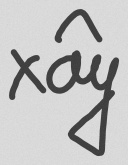


--- Sample 2 ---
Ground Truth: 'cấp'
Prediction:   'cấp'
CER: 0.0000 ✅


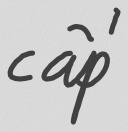


--- Sample 3 ---
Ground Truth: 'Thực'
Prediction:   'Thực'
CER: 0.0000 ✅


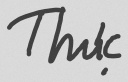


--- Sample 4 ---
Ground Truth: 'thành'
Prediction:   'thành'
CER: 0.0000 ✅


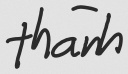


--- Sample 5 ---
Ground Truth: 'lãng'
Prediction:   'lãng'
CER: 0.0000 ✅


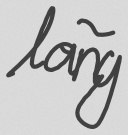


--- Sample 6 ---
Ground Truth: 'trình'
Prediction:   'trình'
CER: 0.0000 ✅


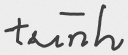


--- Sample 7 ---
Ground Truth: 'nhóm'
Prediction:   'nhấn'
CER: 0.5000 ❌


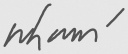


--- Sample 8 ---
Ground Truth: 'nhìn'
Prediction:   'diện'
CER: 0.7500 ❌


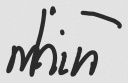


--- Sample 9 ---
Ground Truth: 'tháo'
Prediction:   'tháo'
CER: 0.0000 ✅


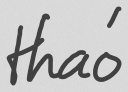


--- Sample 10 ---
Ground Truth: 'quan'
Prediction:   'quan'
CER: 0.0000 ✅


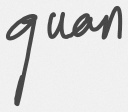

In [10]:
import random
from IPython.display import display

# Show random samples
num_samples = 10
sample_indices = random.sample(range(len(predictions)), min(num_samples, len(predictions)))

print("\n🔍 Sample Predictions:\n")
for i, idx in enumerate(sample_indices, 1):
    print(f"\n--- Sample {i} ---")
    print(f"Ground Truth: '{ground_truths[idx]}'")
    print(f"Prediction:   '{predictions[idx]}'")
    
    # Calculate CER for this sample
    sample_cer = calculate_cer([predictions[idx]], [ground_truths[idx]])
    match = "✅" if predictions[idx] == ground_truths[idx] else "❌"
    print(f"CER: {sample_cer:.4f} {match}")
    
    # Display image
    img_path = test_dataset[idx]['image_path']
    img = Image.open(img_path)
    display(img)

## 10. Detailed Error Analysis

In [11]:
# Calculate per-sample CER
sample_cers = []
exact_matches = 0

for pred, ref in zip(predictions, ground_truths):
    sample_cer = calculate_cer([pred], [ref])
    sample_cers.append(sample_cer)
    if pred == ref:
        exact_matches += 1

# Statistics
import numpy as np

print("\n📊 DETAILED ANALYSIS")
print("="*50)
print(f"\n✓ Exact matches: {exact_matches}/{len(predictions)} ({exact_matches/len(predictions)*100:.2f}%)")
print(f"\n📈 CER Statistics:")
print(f"  - Mean CER: {np.mean(sample_cers):.4f}")
print(f"  - Median CER: {np.median(sample_cers):.4f}")
print(f"  - Min CER: {np.min(sample_cers):.4f}")
print(f"  - Max CER: {np.max(sample_cers):.4f}")
print(f"  - Std Dev: {np.std(sample_cers):.4f}")

# CER distribution
print(f"\n📊 CER Distribution:")
perfect = sum(1 for c in sample_cers if c == 0.0)
low = sum(1 for c in sample_cers if 0.0 < c <= 0.1)
medium = sum(1 for c in sample_cers if 0.1 < c <= 0.3)
high = sum(1 for c in sample_cers if c > 0.3)

print(f"  - Perfect (CER = 0.0): {perfect} ({perfect/len(sample_cers)*100:.2f}%)")
print(f"  - Low (0.0 < CER ≤ 0.1): {low} ({low/len(sample_cers)*100:.2f}%)")
print(f"  - Medium (0.1 < CER ≤ 0.3): {medium} ({medium/len(sample_cers)*100:.2f}%)")
print(f"  - High (CER > 0.3): {high} ({high/len(sample_cers)*100:.2f}%)")


📊 DETAILED ANALYSIS

✓ Exact matches: 2296/2881 (79.69%)

📈 CER Statistics:
  - Mean CER: 0.1162
  - Median CER: 0.0000
  - Min CER: 0.0000
  - Max CER: 2.0000
  - Std Dev: 0.2695

📊 CER Distribution:
  - Perfect (CER = 0.0): 2296 (79.69%)
  - Low (0.0 < CER ≤ 0.1): 0 (0.00%)
  - Medium (0.1 < CER ≤ 0.3): 97 (3.37%)
  - High (CER > 0.3): 488 (16.94%)


## 11. Show Worst Predictions

Identify and display samples with highest CER for error analysis.


❌ Top 5 Worst Predictions:


--- Worst #1 (CER: 2.0000) ---
Ground Truth: 'Á'
Prediction:   'A1'


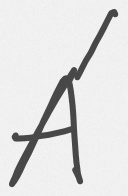


--- Worst #2 (CER: 2.0000) ---
Ground Truth: 'đ'
Prediction:   'có'


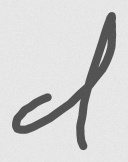


--- Worst #3 (CER: 2.0000) ---
Ground Truth: 'ấy'
Prediction:   'cũng'


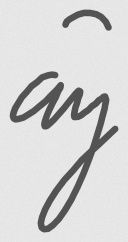


--- Worst #4 (CER: 2.0000) ---
Ground Truth: 'ở'
Prediction:   'ỏi'


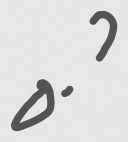


--- Worst #5 (CER: 1.5000) ---
Ground Truth: 'tự'
Prediction:   'lại'


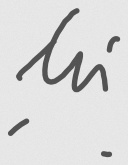

In [12]:
# Find worst predictions
sorted_indices = np.argsort(sample_cers)[::-1]
worst_n = 5

print(f"\n❌ Top {worst_n} Worst Predictions:\n")
for i, idx in enumerate(sorted_indices[:worst_n], 1):
    print(f"\n--- Worst #{i} (CER: {sample_cers[idx]:.4f}) ---")
    print(f"Ground Truth: '{ground_truths[idx]}'")
    print(f"Prediction:   '{predictions[idx]}'")
    
    # Display image
    img_path = test_dataset[idx]['image_path']
    img = Image.open(img_path)
    display(img)

## 12. Save Results

Save evaluation results for later analysis.

In [13]:
import pandas as pd

# Create results dataframe
results_df = pd.DataFrame({
    'image_path': [test_dataset[i]['image_path'] for i in range(len(predictions))],
    'ground_truth': ground_truths,
    'prediction': predictions,
    'cer': sample_cers
})

# Setup save path based on environment
if not IS_KAGGLE:
    RESULTS_PATH = f"/content/drive/MyDrive/evaluation_results_{MODEL_TYPE}.csv"
    print(f"💾 Colab: Saving results to Google Drive...")
else:
    RESULTS_PATH = f"/kaggle/working/evaluation_results_{MODEL_TYPE}.csv"
    print(f"💾 Kaggle: Saving results to working directory...")

# Save results
results_df.to_csv(RESULTS_PATH, index=False, encoding='utf-8')
print(f"✅ Results saved to: {RESULTS_PATH}")

# Display summary
print("\n📋 Results Summary:")
print(results_df.head(10))

# Save summary statistics
summary = {
    'model_type': MODEL_TYPE,
    'overall_cer': overall_cer,
    'total_samples': len(predictions),
    'exact_matches': exact_matches,
    'accuracy': 1 - overall_cer,
    'mean_cer': np.mean(sample_cers),
    'median_cer': np.median(sample_cers),
    'std_cer': np.std(sample_cers)
}

summary_path = RESULTS_PATH.replace('.csv', '_summary.json')
with open(summary_path, 'w', encoding='utf-8') as f:
    json.dump(summary, f, indent=2, ensure_ascii=False)

print(f"✅ Summary saved to: {summary_path}")

💾 Kaggle: Saving results to working directory...
✅ Results saved to: /kaggle/working/evaluation_results_finetuned.csv

📋 Results Summary:
                                          image_path ground_truth prediction  \
0  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...          Thứ        Thứ   
1  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...       trưởng     trưởng   
2  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...           Bộ         Bộ   
3  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...          Tài        tài   
4  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...       nguyên     nguyên   
5  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...          môi        môi   
6  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...       trường     trường   
7  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...         Đặng       Đặng   
8  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...         Hùng       Hùng   
9  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...          

---

## Done! 🎉

You've successfully evaluated the model on Vietnamese handwriting test data.

**Summary:**
- ✅ Selected model type (baseline or finetuned)
- ✅ Loaded model and ran inference
- ✅ Calculated Character Error Rate (CER)
- ✅ Performed error analysis
- ✅ Saved detailed results

**Next steps:**
- Change `MODEL_TYPE` to evaluate the other model
- Compare baseline vs finetuned performance
- Try different inference parameters (base_size, crop_mode)
- Evaluate on full test set